In [1]:
# Standard and general libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import optuna

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing and statistical analysis libraries/modules
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.interpolate import griddata
import prince  # You might need to install it using pip install prince

# Machine learning and modeling libraries/modules
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from prince import MCA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


pd.set_option('display.max_columns', None)

/home/gabriel/mca_env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Loading

In this section, we will load the automobile dataset for our analysis.

**Data Source:** [Automobile Dataset on Kaggle](https://www.kaggle.com/datasets/toramky/automobile-dataset/data)

Let's begin by reading the data and examining the initial rows as well as the column names.


In [32]:
file = 'data/Automobile_data.csv'
df = pd.read_csv(file)
display(df.head(20))
print(df.columns)

symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   
5           2                 ?         audi       gas        std   
6           1               158         audi       gas        std   
7           1                 ?         audi       gas        std   
8           1               158         audi       gas      turbo   
9           0                 ?         audi       gas      turbo   
10          2               192          bmw       gas        std   
11          0               192          bmw       gas        std   
12          0               188          bmw       gas        std   
13          0               188          bmw       gas        std   
14          1                 ?          bmw       gas        std   
15          0                 ?          bmw       gas        std   
16          0                 ?          bmw       gas        std   
17          0                 ?          bmw       gas        std   
18          2               121    chevrolet       gas        std   
19          1                98    chevrolet       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0           two  convertible          rwd           front        88.6   168.8   
1           two  convertible          rwd           front        88.6   168.8   
2           two    hatchback          rwd           front        94.5   171.2   
3          four        sedan          fwd           front        99.8   176.6   
4          four        sedan          4wd           front        99.4   176.6   
5           two        sedan          fwd           front        99.8   177.3   
6          four        sedan          fwd           front       105.8   192.7   
7          four        wagon          fwd           front       105.8   192.7   
8          four        sedan          fwd           front       105.8   192.7   
9           two    hatchback          4wd           front        99.5   178.2   
10          two        sedan          rwd           front       101.2   176.8   
11         four        sedan          rwd           front       101.2   176.8   
12          two        sedan          rwd           front       101.2   176.8   
13         four        sedan          rwd           front       101.2   176.8   
14         four        sedan          rwd           front       103.5   189.0   
15         four        sedan          rwd           front       103.5   189.0   
16          two        sedan          rwd           front       103.5   193.8   
17         four        sedan          rwd           front       110.0   197.0   
18          two    hatchback          fwd           front        88.4   141.1   
19          two    hatchback          fwd           front        94.5   155.9   

    width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0    64.1    48.8         2548        dohc             four          130   
1    64.1    48.8         2548        dohc             four          130   
2    65.5    52.4         2823        ohcv              six          152   
3    66.2    54.3         2337         ohc             four          109   
4    66.4    54.3         2824         ohc             five          136   
5    66.3    53.1         2507         ohc             five          136   
6    71.4    55.7         2844         ohc             five          136   
7    71.4    55.7         2954         ohc             five          136   
8    71.4    55.9         3086         ohc             five          131   
9    67.9    52.0         3053         ohc             five          131   
10   64.8    54.

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


## Data Cleaning and Exploration

In this section, we will handle missing values and investigate data types for each column. Specifically, we will convert certain columns from string to numeric data types, replacing any non-numeric values with `NaN`.

Let's start the cleaning process and inspect the dataset.


In [3]:
# Convert specified columns to float, replacing '?' with NaN
columns_with_nans = ['normalized-losses','price','bore','stroke','horsepower','peak-rpm']
for col in columns_with_nans:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check data types for each column
print("Data Types:")
print(df.dtypes)
print("\n")

# Check for missing values in each column
print("Missing Values:")
print(df.isnull().sum())
print("\n")

# Display the dataframe
display(df)


Data Types:
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


Missing Values:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-loc

symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
0            130        mpfi  3.47    2.68                9.0       111.0   
1            130        mpfi  3.47    2.68                9.0       111.0   
2            152        mpfi  2.68    3.47                9.0       154.0   
3            109        mpfi  3.19    3.40               10.0       102.0   
4            136        mpfi  3.19    3.40                8.0       115.0   
..           ...         ...   ...     ...                ...         ...   
200          141        mpfi  3.78    3.15                9.5       114.0   
201          141        mpfi  3.78    3.15                8.7       160.0   
202          173        mpfi  3.58    2.87                8.8       134.0   
203          145         idi  3.01    3.40               23.0       106.0   
204          141        mpfi  3.78    3.15                9.5       114.0   

     peak-rpm  city-mpg  highway-mpg    price  
0      5000.0        21           27  13495.0  
1      5000.0        21           27  16500.0  
2      5000.0        19           26  16500.0  
3      5500.0        24           30  13950.0  
4      5500.0        18           22  17450.0  
..        ...       ...          ...      ...  
200    5400.0        23           28  16845.0  
201    5300.0        19           25  19045.0  
202    5500.0        18           23  214

## Descriptive Statistics for 'Price' Column

In this section, we will calculate and present various descriptive statistics for the 'price' column to understand its distribution and central tendencies. We'll be looking at:

- **Central Tendencies**: Mean and Median
- **Spread Measures**: Standard Deviation and Interquartile Range (IQR)
- **Measures of Shape**: Skewness and Kurtosis

Let's compute and display these statistics.


In [4]:
# Calculate descriptive statistics
mean_price = df['price'].mean()
median_price = df['price'].median()
std_dev_price = df['price'].std()
iqr_price = stats.iqr(df['price'].dropna(), interpolation = 'midpoint')

# Calculate measures of shape
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

# Print statistics
print(f"Mean of Price: {mean_price:.2f}")
print(f"Median of Price: {median_price:.2f}")
print(f"Standard Deviation of Price: {std_dev_price:.2f}")
print(f"Interquartile Range of Price: {iqr_price:.2f}")
print(f"Skewness of Price: {skewness_price:.2f}")
print(f"Kurtosis of Price: {kurtosis_price:.2f}")


Mean of Price: 13207.13
Median of Price: 10295.00
Standard Deviation of Price: 7947.07
Interquartile Range of Price: 8725.00
Skewness of Price: 1.81
Kurtosis of Price: 3.23


## Visualizing the Distribution of the Target Variable: Price

To get a better understanding of the distribution of our target variable, 'Price', we'll plot a histogram along with its kernel density estimation (KDE). 

Additionally, to provide context within the distribution, we'll annotate the plot with the:
- **Mean** (Red Dashed Line)
- **Median** (Green Solid Line)

This visualization will help us gauge the central tendency and spread of 'Price' in our dataset.


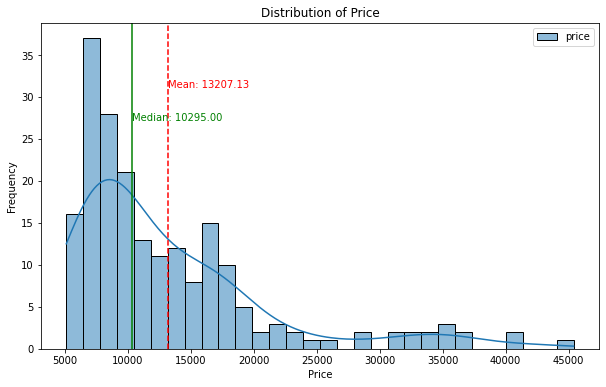

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df[['price']], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Annotate mean
plt.axvline(mean_price, color='r', linestyle='--')
plt.text(mean_price, plt.ylim()[1] * 0.8, f'Mean: {mean_price:.2f}', color='r')

# Annotate median
plt.axvline(median_price, color='g', linestyle='-')
plt.text(median_price, plt.ylim()[1] * 0.7, f'Median: {median_price:.2f}', color='g')


plt.show()


## Visualization of Numeric Columns

In this section of our exploratory data analysis (EDA), we'll visualize the distribution of all numeric columns in the dataset. This will provide insights into the distribution, central tendencies, and spread of each numeric feature.


<Figure size 720x432 with 0 Axes>

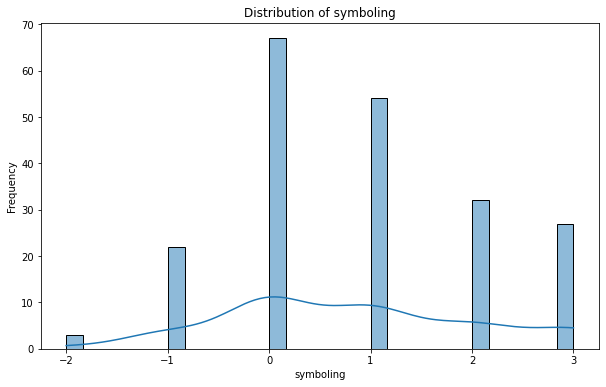

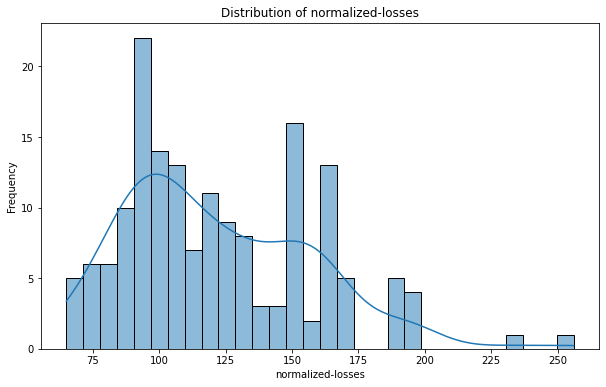

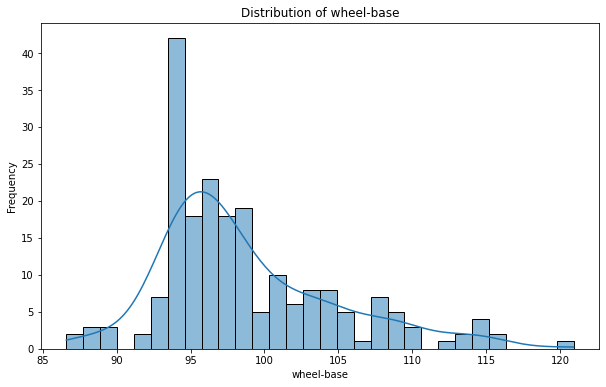

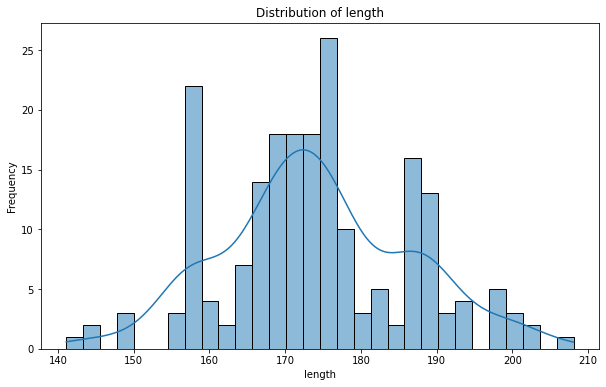

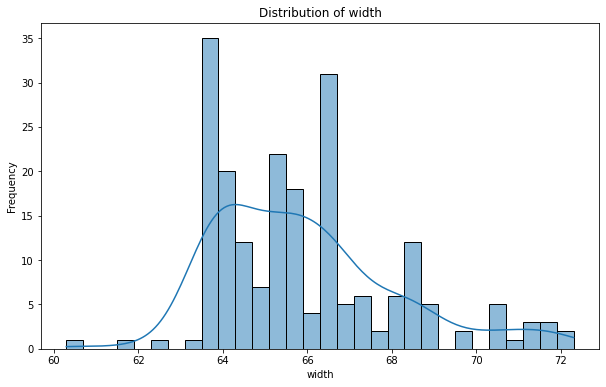

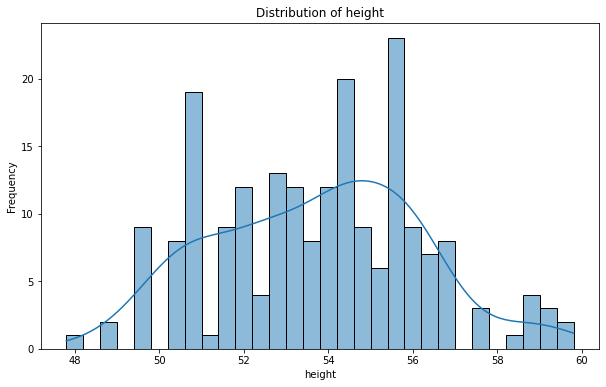

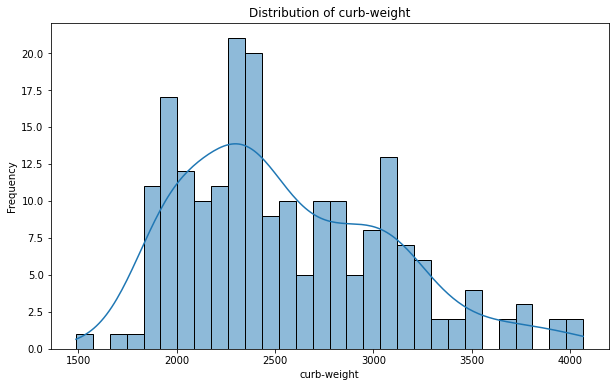

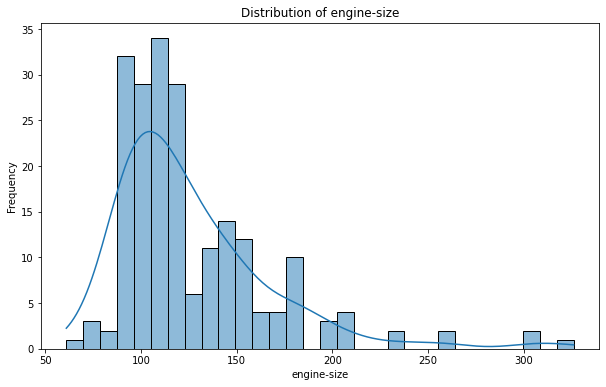

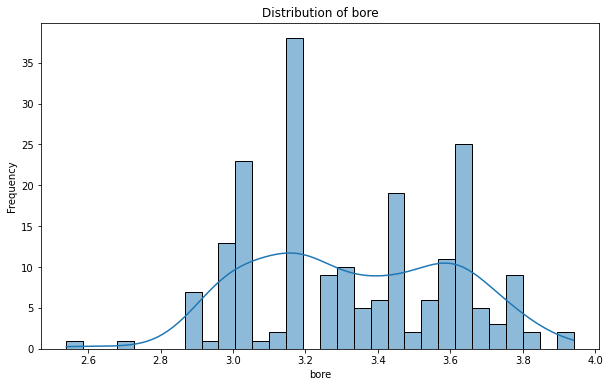

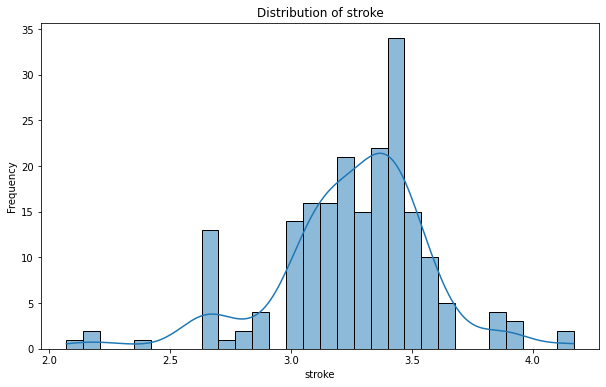

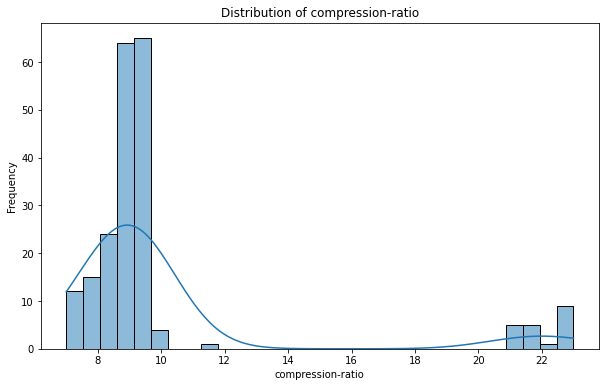

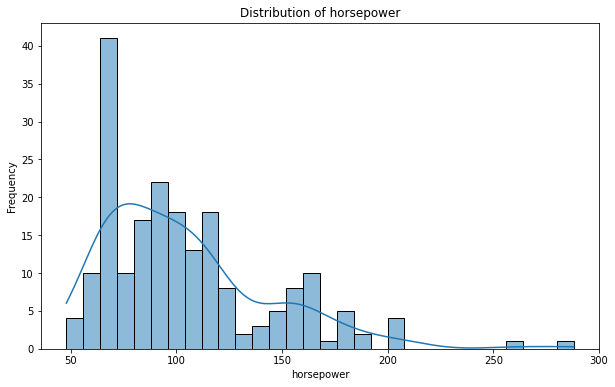

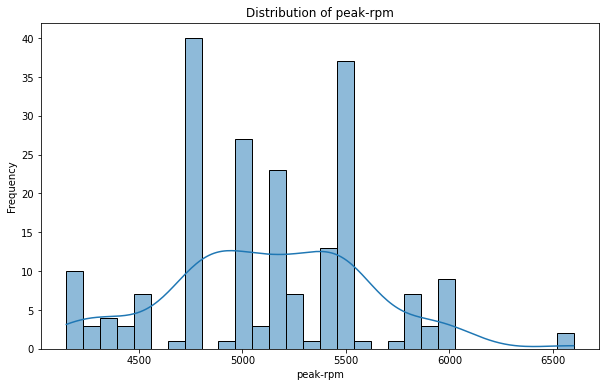

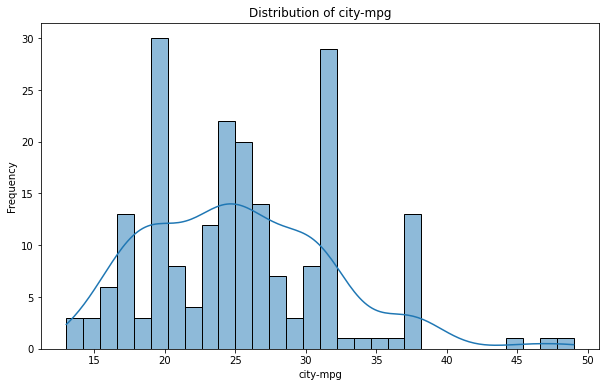

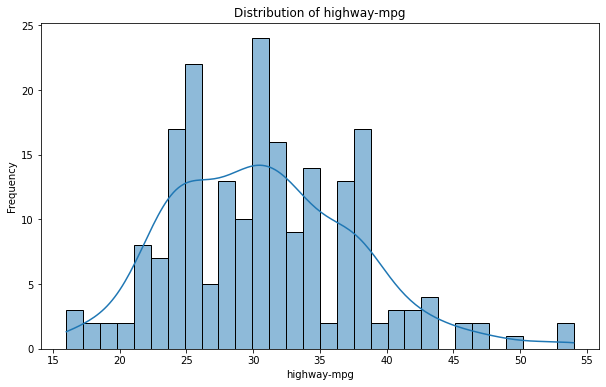

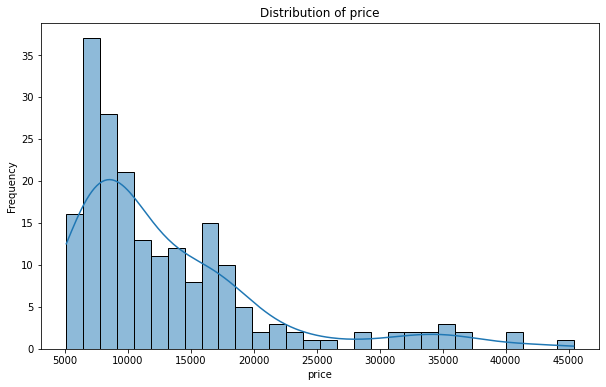

In [6]:
# List of numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the plot area size for each plot
plt.figure(figsize=(10,6))

# Iterate over numeric columns and plot each one
for col in numeric_cols:
    plt.figure(figsize=(10,6))  # This creates a new figure for each plot
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show();


## Relationship of Numeric Features with Price

In this part of our exploratory data analysis (EDA), we're visualizing the relationship between each numeric feature and the target variable, 'Price'. These scatter plots will help identify potential linear relationships or patterns between the numeric predictors and the target.


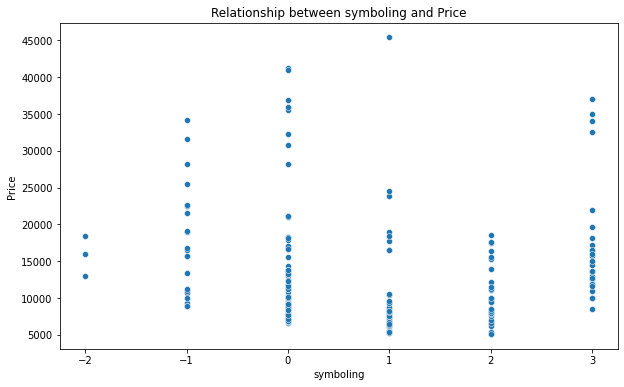

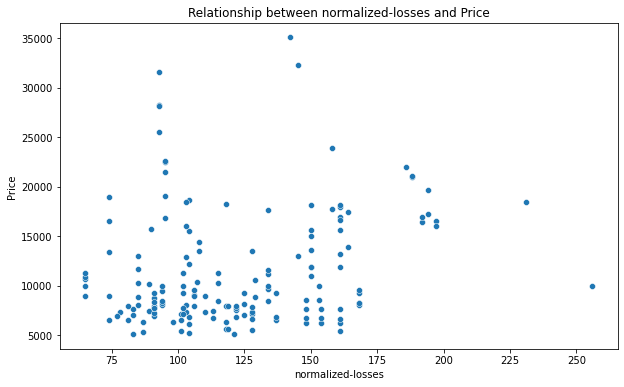

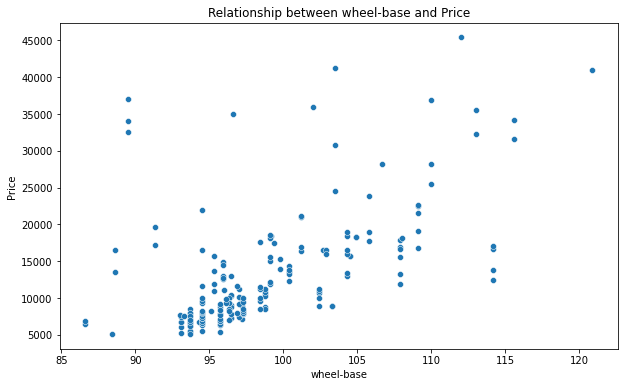

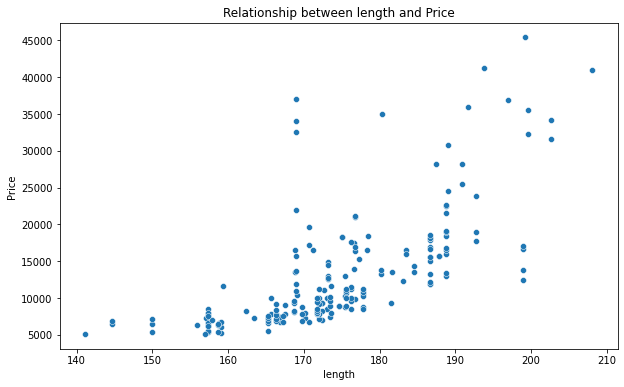

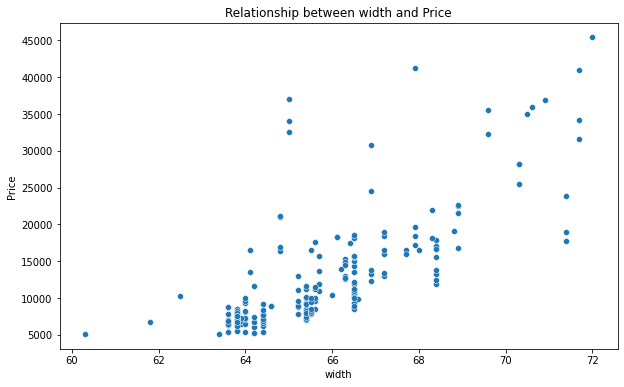

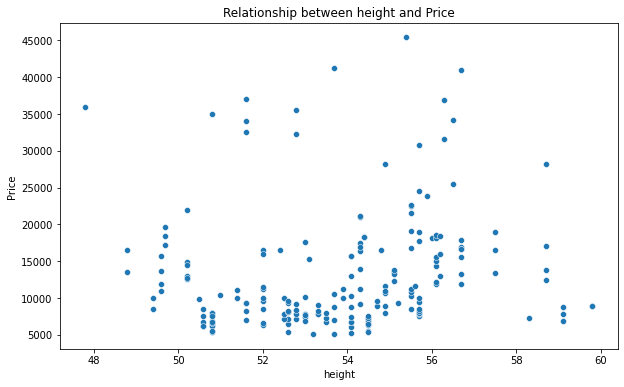

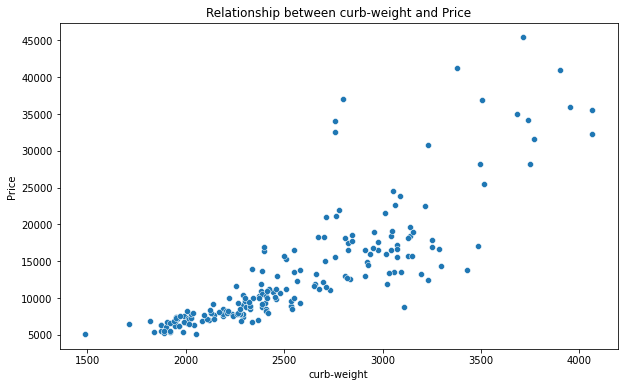

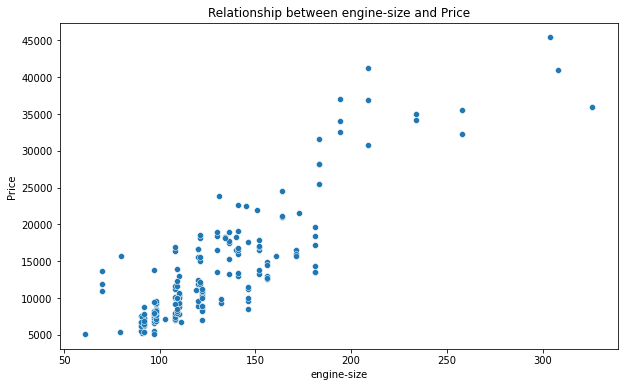

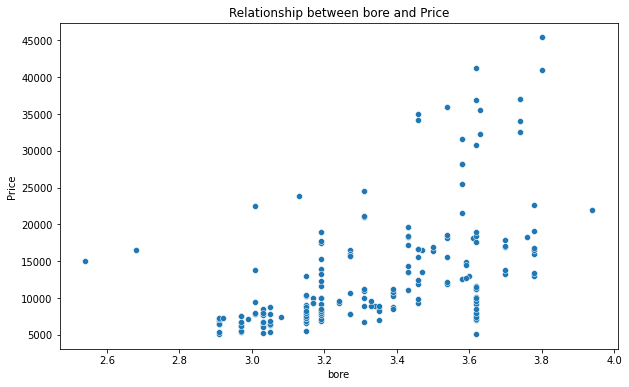

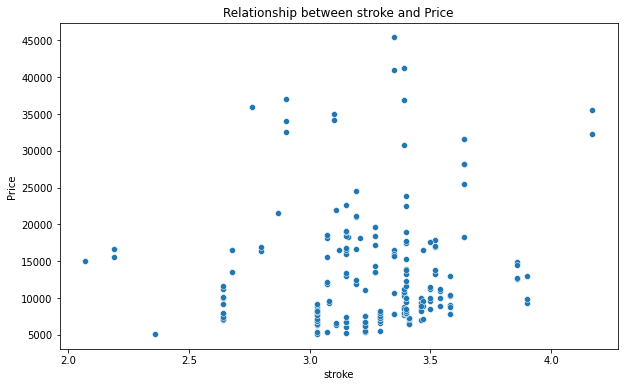

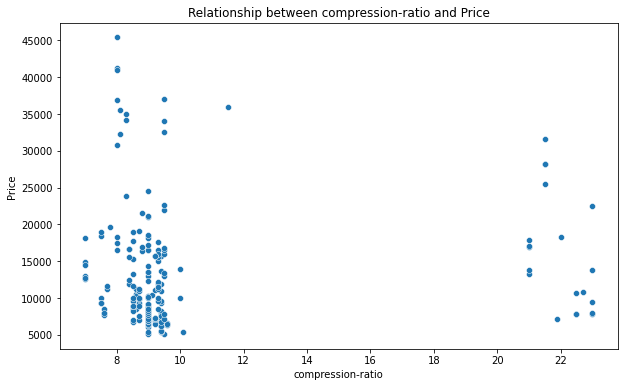

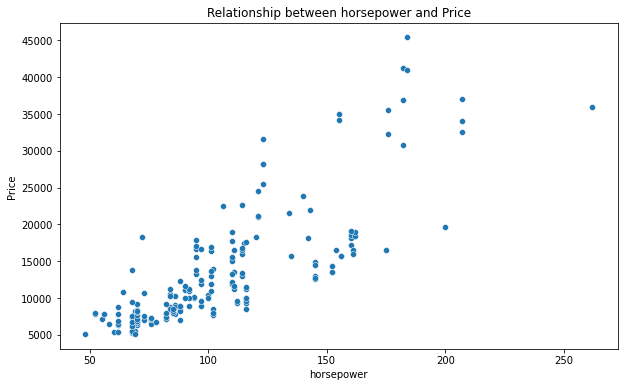

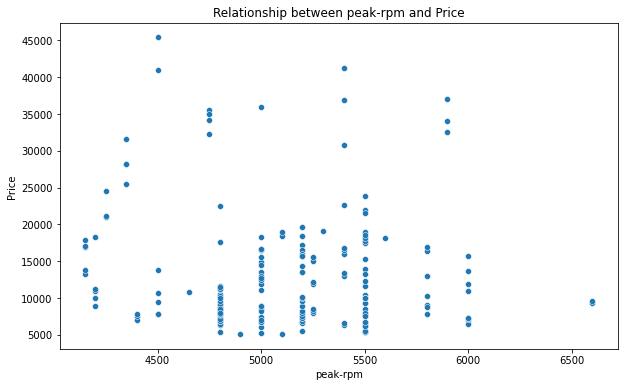

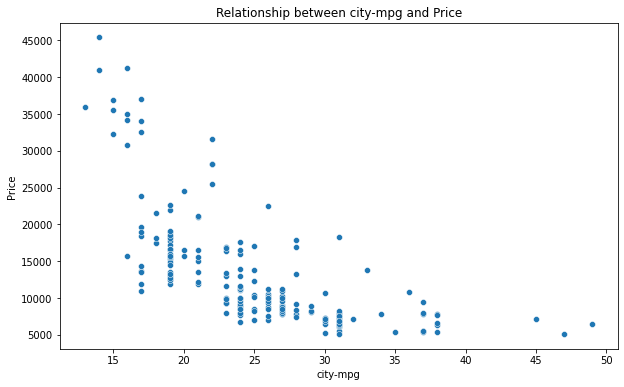

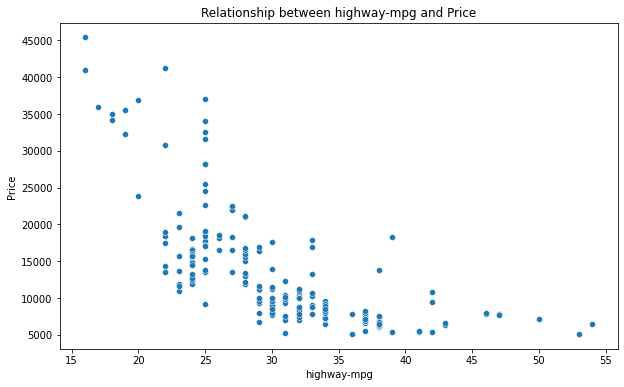

In [7]:
# We exclude 'price' as it's our target variable
numeric_cols = numeric_cols.drop('price')

for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'Relationship between {col} and Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()



## Correlation of Numeric Features with Price

In this section of our exploratory data analysis (EDA), we explore the correlation between the target variable 'Price' and other numeric attributes in the dataset. A heatmap is utilized to offer a visual representation of these correlations, helping in identifying potential features that might have a strong linear relationship with the price.


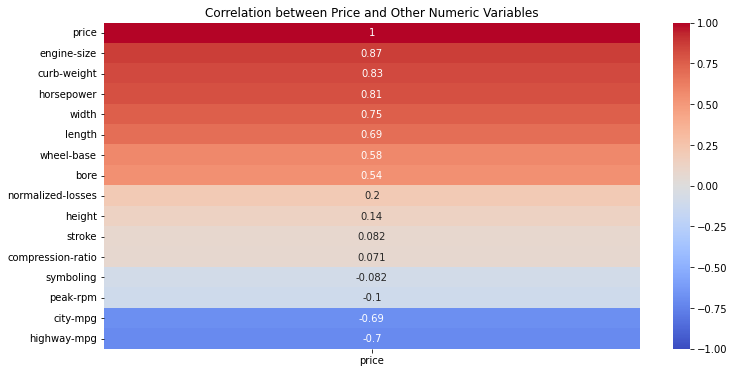

In [8]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Visualize the correlation between 'price' and other numeric variables
plt.figure(figsize=(12, 6))
sns.heatmap(data=correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation between Price and Other Numeric Variables')
plt.show()


## Ordered Correlation Heatmap

In this segment of our exploratory data analysis (EDA), we delve into the relationships between numeric features by examining their pairwise correlations. To gain a clearer perspective on the importance of each feature relative to the 'Price', variables are ordered based on their correlation magnitude with 'Price'. A heatmap vividly represents these correlations, aiding in the identification of key predictors that may be of interest for further analysis or model development.


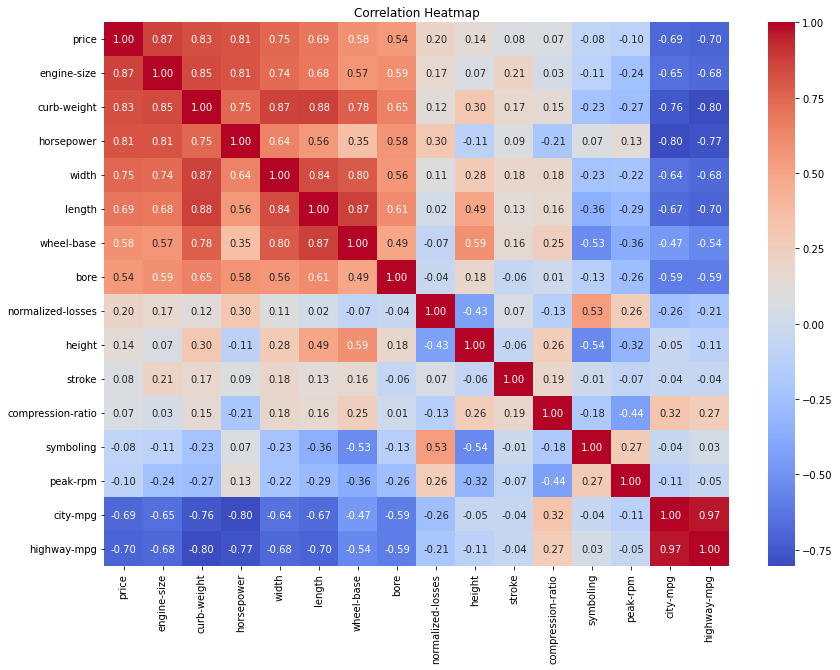

In [9]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Sort the variables based on correlation with 'price'
sorted_columns = corr_matrix['price'].sort_values(ascending=False).index

# Create a sorted correlation matrix
sorted_corr_matrix = corr_matrix.loc[sorted_columns, sorted_columns]

# Visualize the sorted correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



## Pairwise Visualizations of Key Variables

To gain a comprehensive understanding of how some primary features relate with each other, and especially with our target variable 'Price', pairwise visualizations are conducted. The selected features - 'Horsepower', 'Engine Size', 'Curb Weight', and 'Highway MPG' - are chosen based on their potential significance to the 'Price'. Scatter plots illustrate the pairwise relationships, while KDE plots on the diagonal provide a distribution overview of each variable.


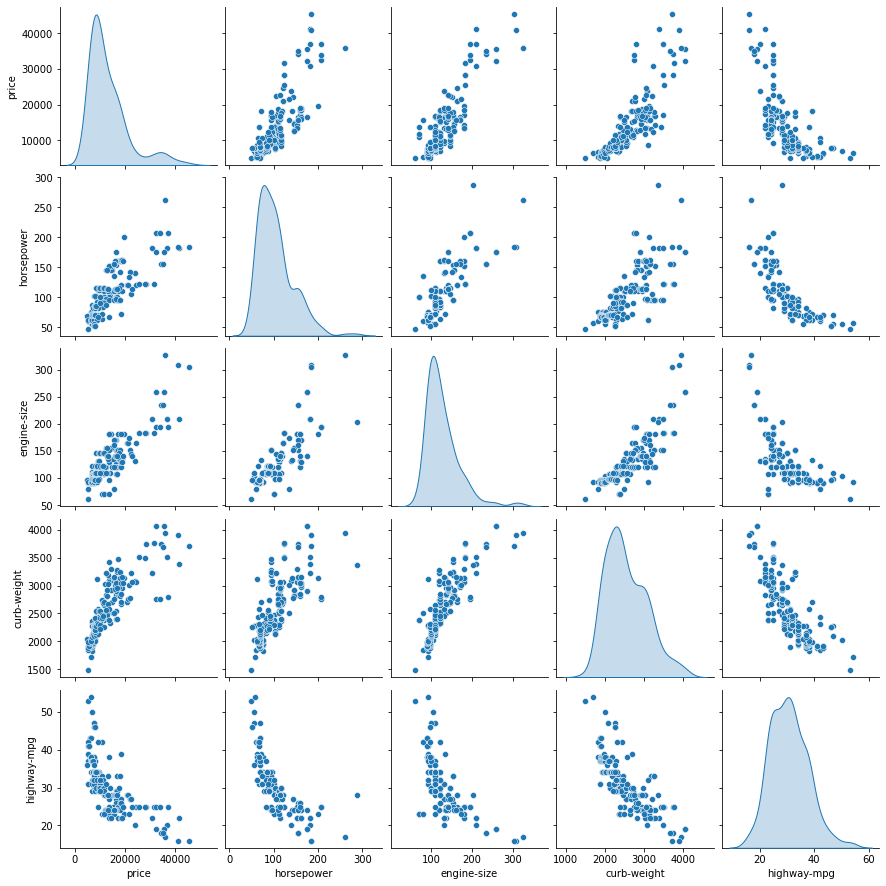

In [10]:
# Select a few important variables for visualization
selected_vars = ['price', 'horsepower', 'engine-size', 'curb-weight', 'highway-mpg']  # Add or remove variables as needed
sns.pairplot(df[selected_vars], kind='scatter', diag_kind='kde')
plt.show()



## Relationship between Numeric Variables and Price

In the following segment, we investigate the relationships between each numeric variable and the target variable 'price'. We first determine the correlations of each numeric variable with 'price'. Then, based on the strength of the absolute correlation, we visualize each relationship using scatter plots. 

Each plot also includes a linear regression line, highlighted in red. The shaded area around the red regression line represents the confidence interval for that regression estimate, giving a range in which we expect the true regression line to fall with a certain level of confidence.


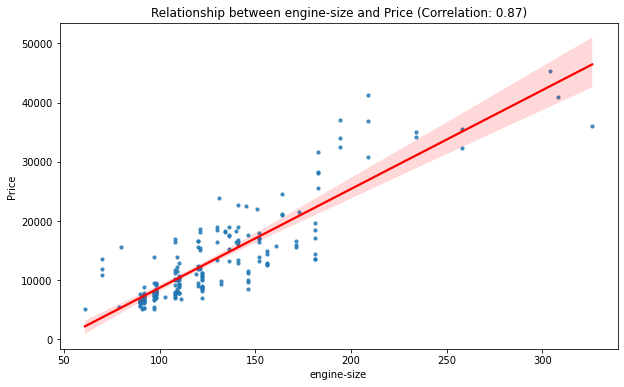

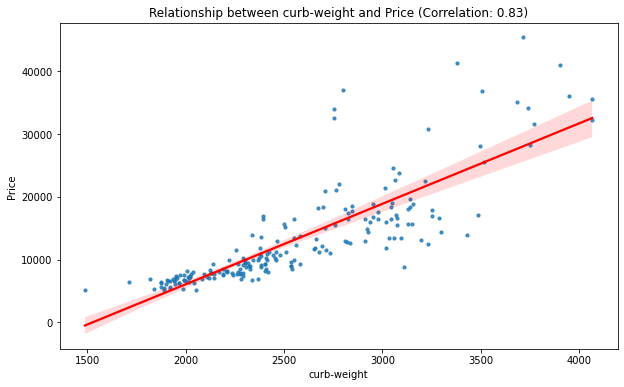

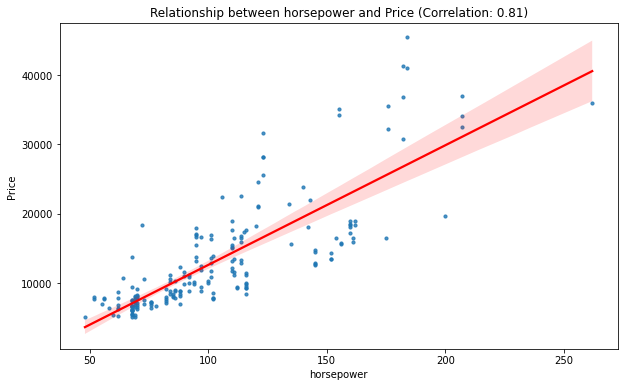

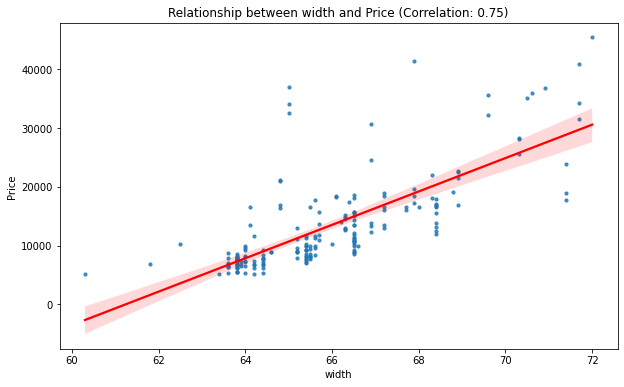

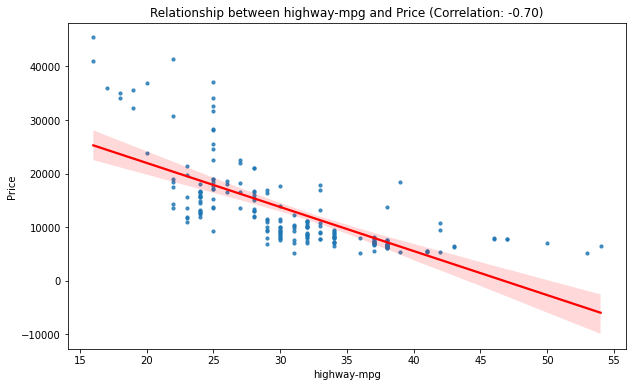

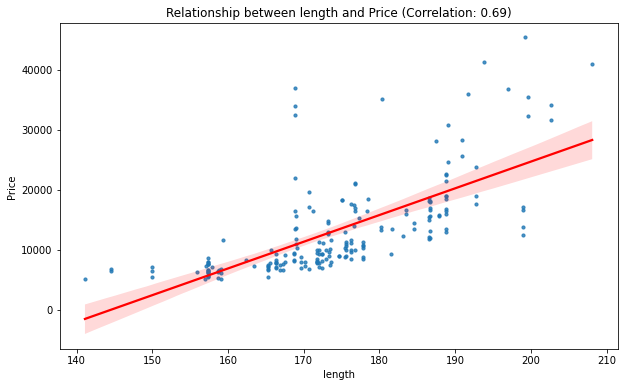

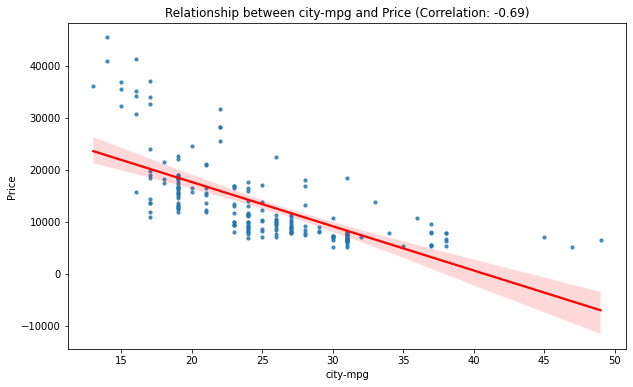

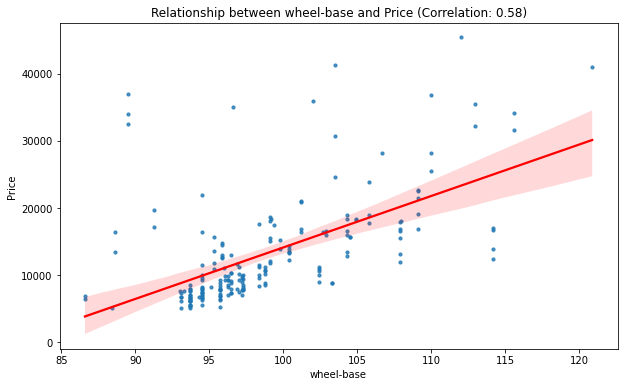

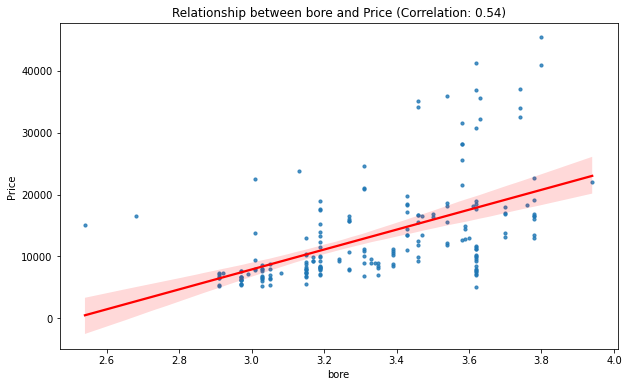

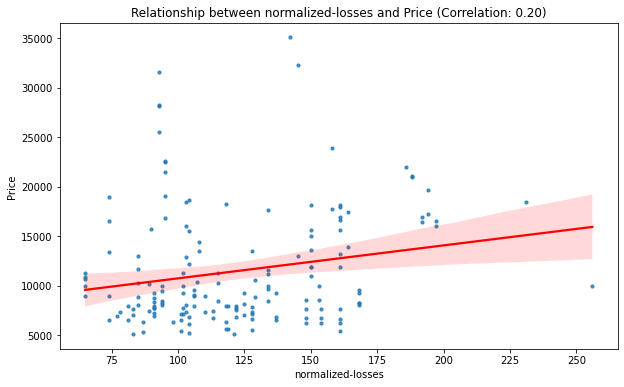

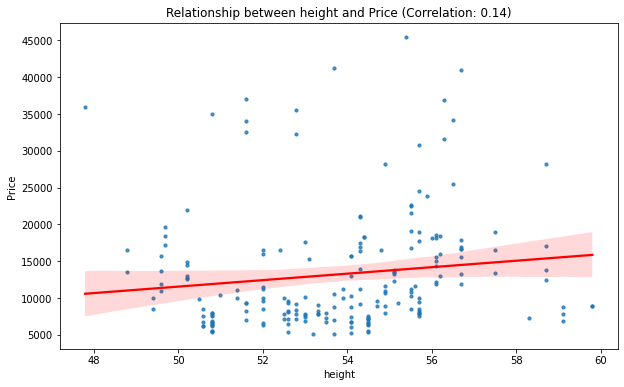

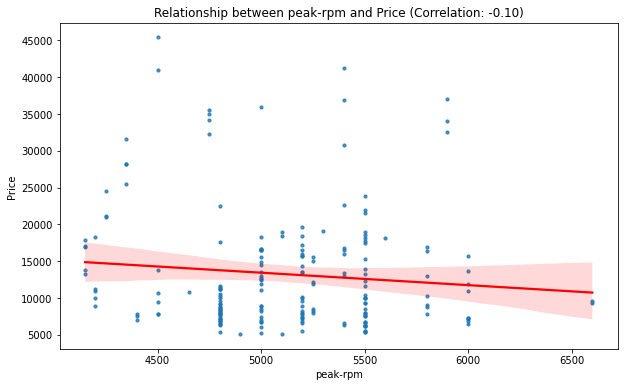

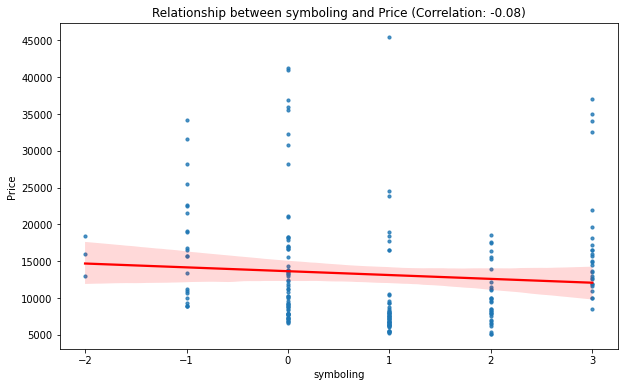

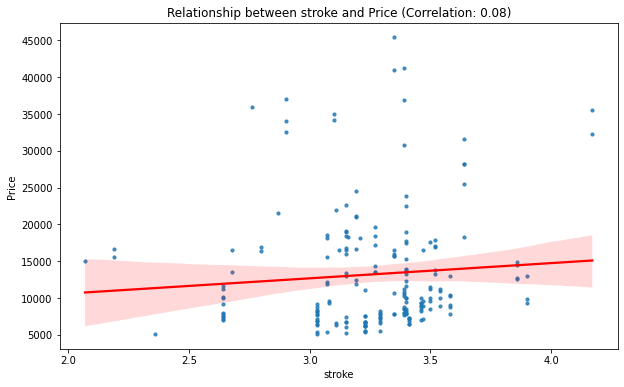

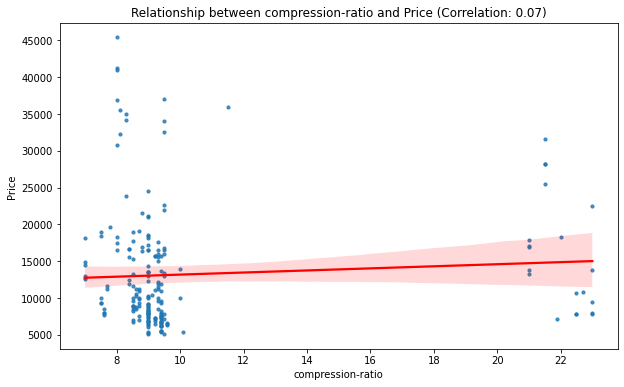

In [11]:
# Select the numeric columns and compute correlations with 'price'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('price')
correlations = df[numeric_cols].apply(lambda x: x.corr(df['price']))

# Sort the columns by the absolute value of the correlation
sorted_columns = correlations.abs().sort_values(ascending=False).index

# Iterate over the sorted columns and create a scatterplot for each
for col in sorted_columns:
    plt.figure(figsize=(10,6))
    sns.regplot(data=df, x=col, y='price', scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f'Relationship between {col} and Price (Correlation: {correlations[col]:.2f})')

    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()



## Visualization of Principal Components

After scaling the data, we applied Principal Component Analysis (PCA) to reduce its dimensionality. Below is a visualization of the first two principal components derived from the dataset. These components capture the maximum variance from the original features.



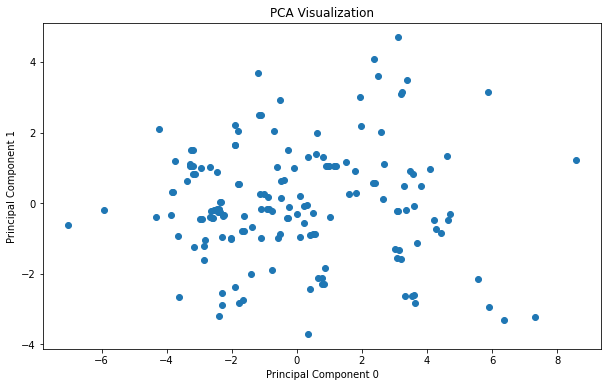

In [12]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.dropna().select_dtypes(include=['float64', 'int64']))

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(scaled_data)

# Visualize the principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.title('PCA Visualization')
plt.show()


## Visualization of Explained Variance and Feature Weights in Principal Components

In the following section, we apply Principal Component Analysis (PCA) to the dataset after ensuring that only numeric variables are used. We first scale these variables using `StandardScaler`. Afterward, we determine and visualize the variance explained by each principal component, both individually and cumulatively. Furthermore, we examine and visualize the weights of each variable on the principal components.


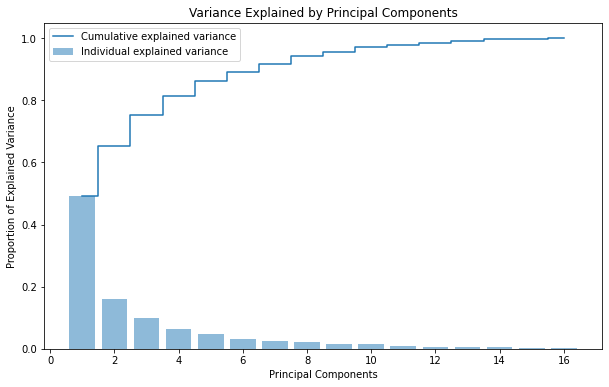

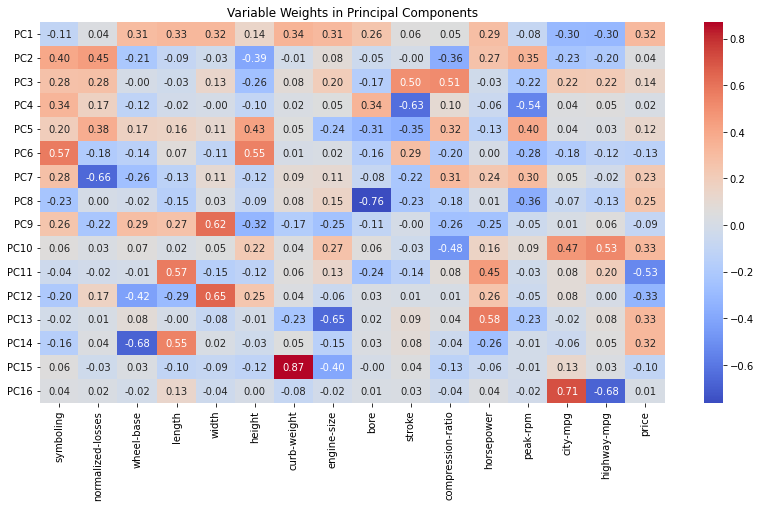

In [13]:
# Ensure that only numeric variables are being used
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols.dropna())

# Apply PCA
pca = PCA()
principal_components = pca.fit(scaled_data)

# Obtain the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Explained Variance')
plt.legend(loc='best')
plt.title('Variance Explained by Principal Components')
plt.show()

# Visualize the weights of each variable in the principal components
pca_components = pd.DataFrame(pca.components_, columns=numeric_cols.columns, index=[f'PC{i+1}' for i in range(len(explained_variance))])
plt.figure(figsize=(14, 7))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Weights in Principal Components')
plt.show()


## Visualization of Categorical Features

In this segment of our exploratory data analysis (EDA), we will visualize the distributions of all categorical features in our dataset. These visualizations will provide an understanding of the frequency of each category within the respective attributes.


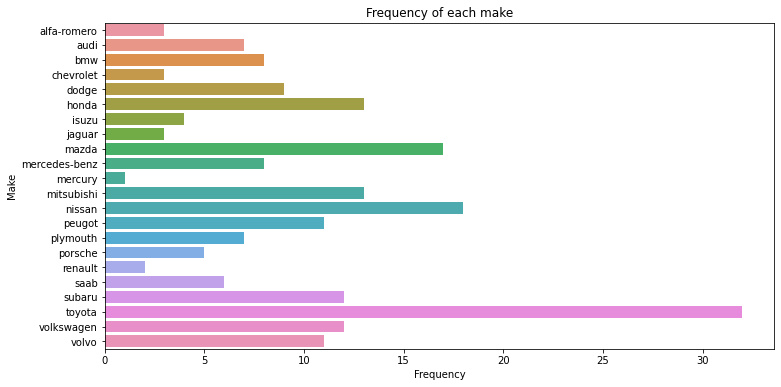

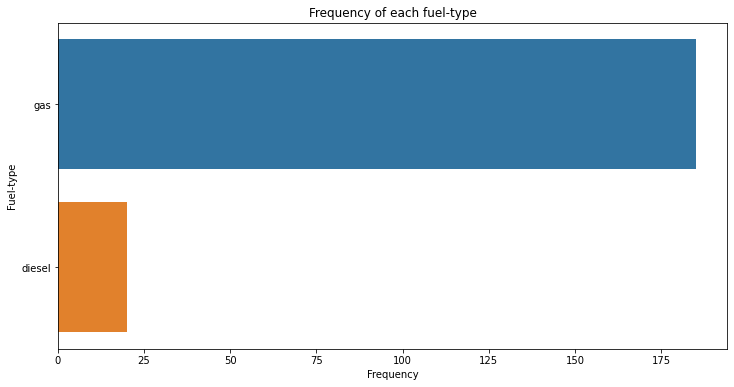

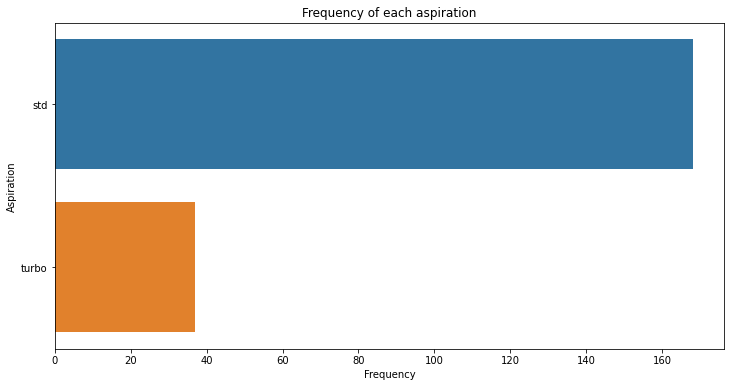

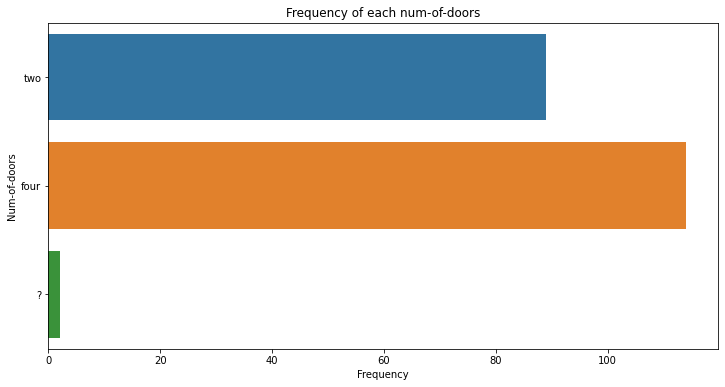

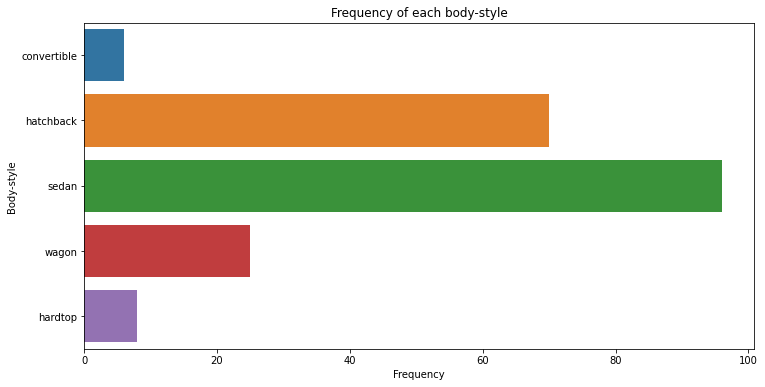

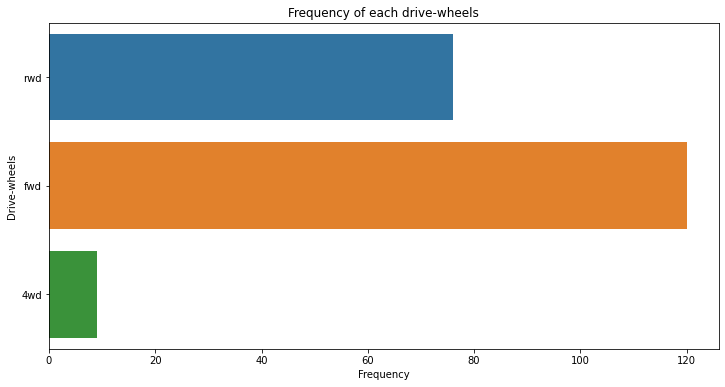

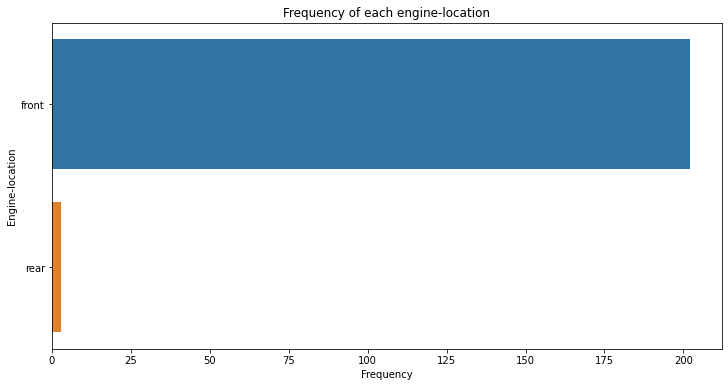

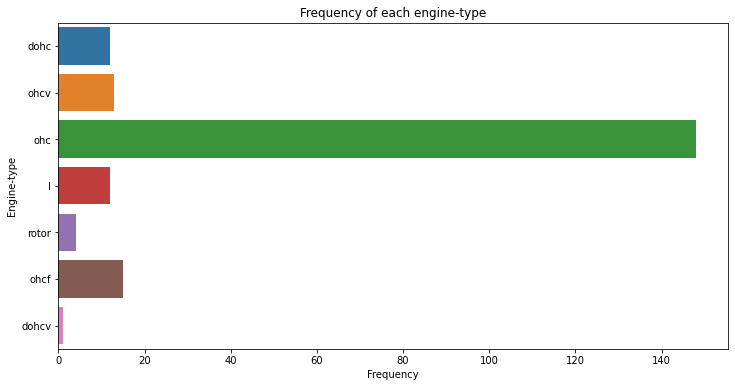

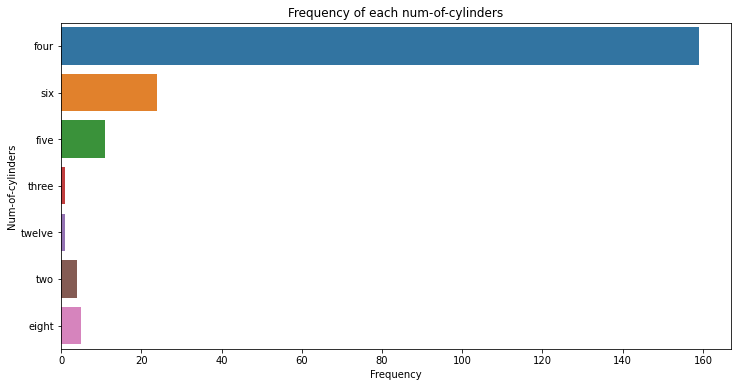

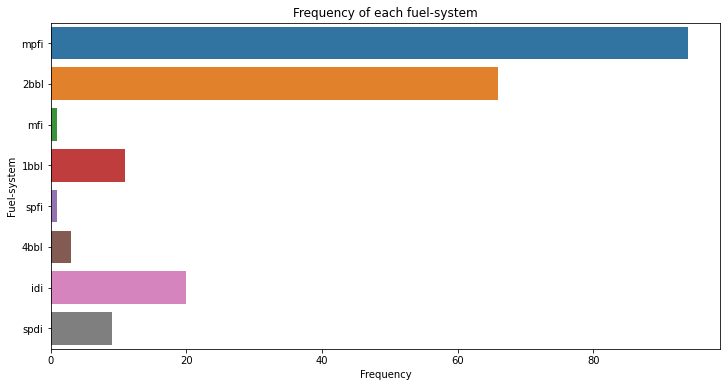

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns


# Iterate over categorical columns and plot each one
for col in categorical_cols:
    plt.figure(figsize=(12,6))  # This creates a new figure for each plot
    sns.countplot(data=df, y=col)
    plt.title(f'Frequency of each {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col.capitalize())
    plt.show()


## Analyzing Price Distribution by Categorical Variables Based on Median Gaps

In this analysis, we aim to understand how the price distribution changes across different categories within our categorical variables.

Here's the methodology we've employed:
1. For each categorical variable, we order its categories based on the median 'price'.
2. We then calculate the consecutive absolute differences in these ordered median prices.
3. An average of these differences (or gaps) is computed for each categorical variable.
4. Subsequently, we rank the categorical variables based on these average gaps. 
5. Finally, we visualize the 'price' distribution for each categorical variable using boxplots, ensuring that the categories are ordered based on median 'price'.

This approach provides insights not just into how price varies across categories, but also indicates which categorical variables exhibit more pronounced variations in price across their categories. The rotated x-axis labels ensure clarity in the display of category names.



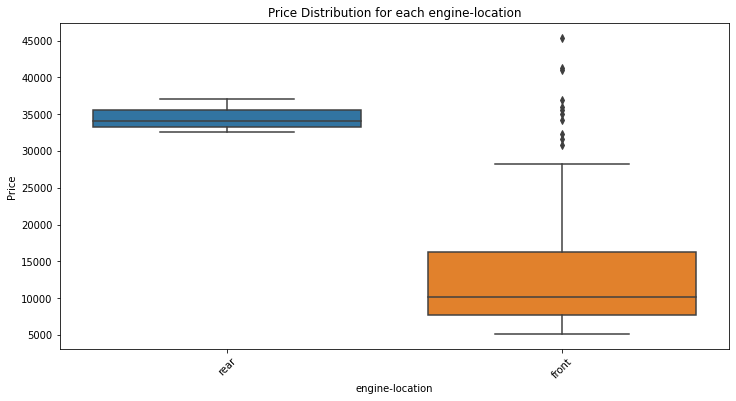

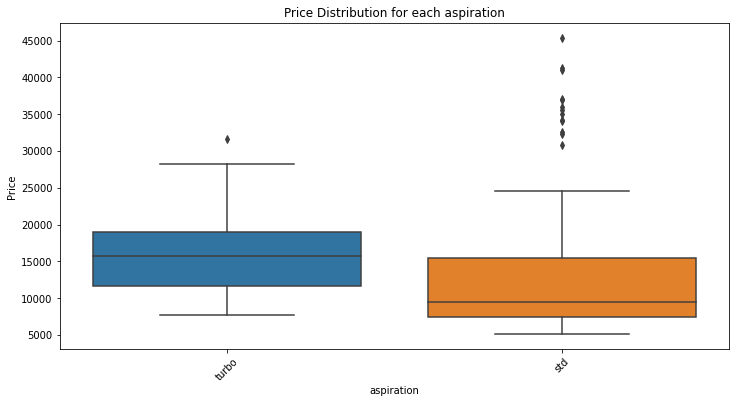

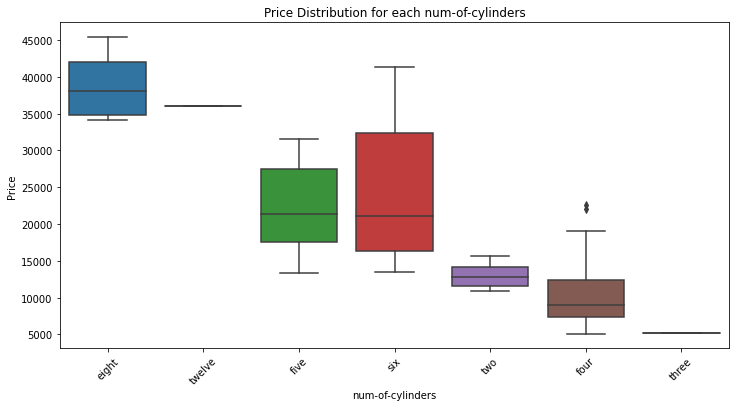

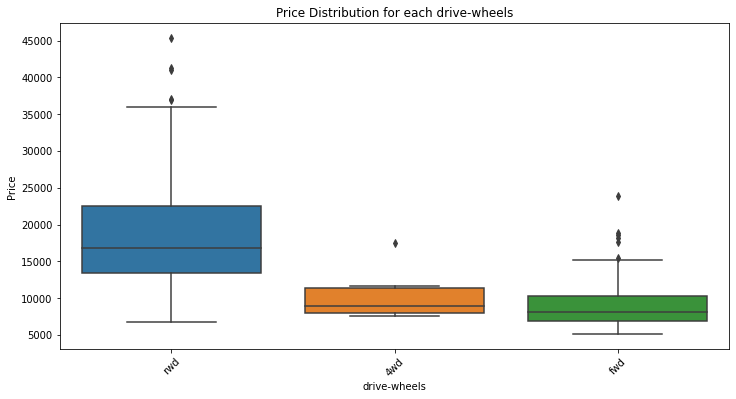

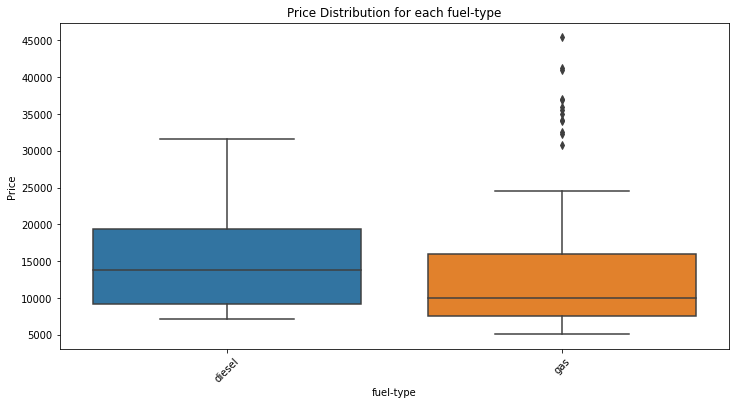

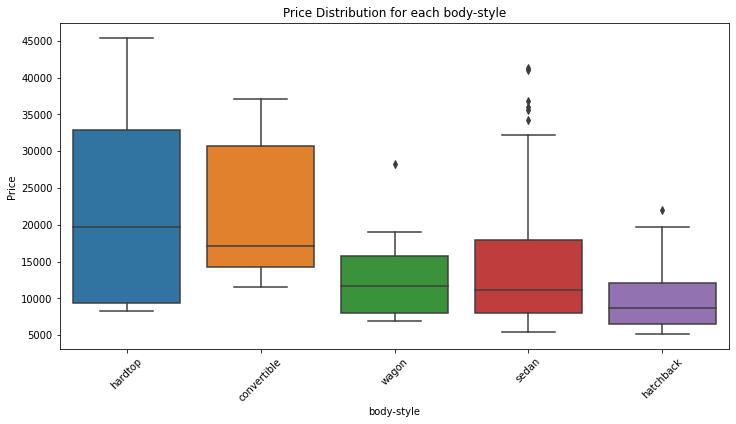

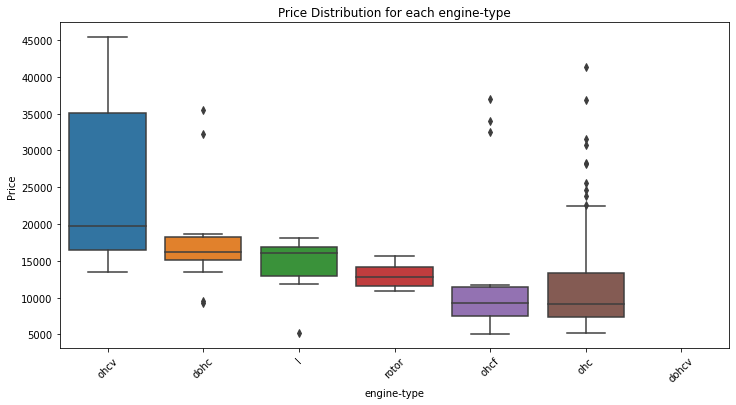

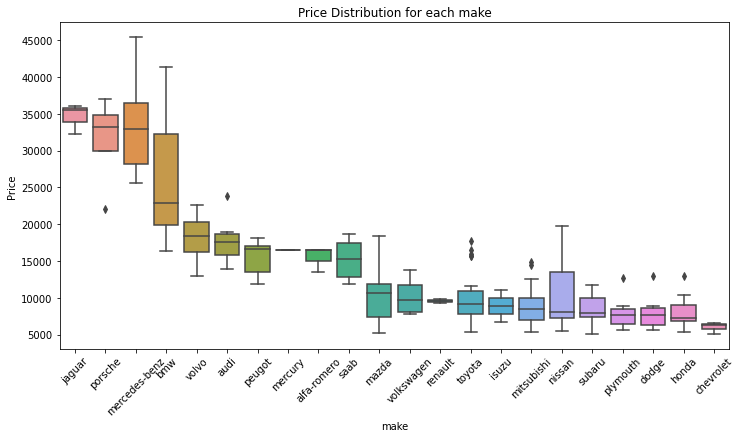

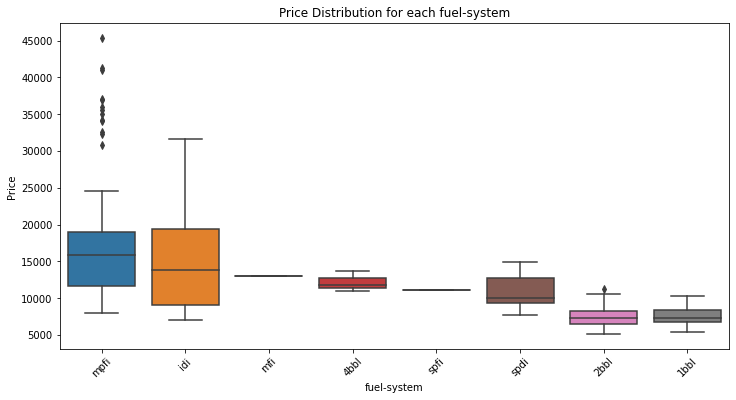

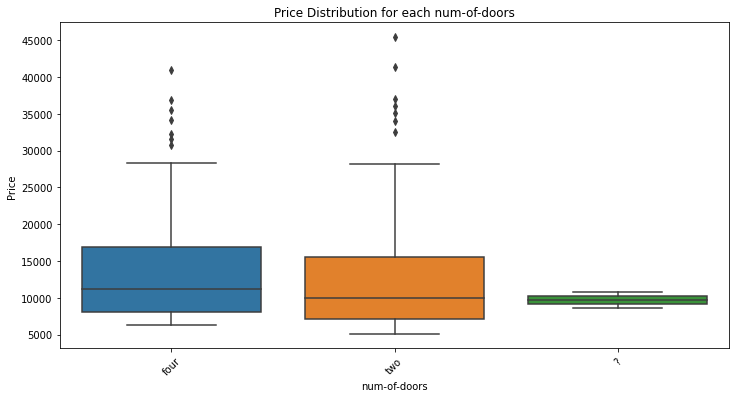

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a dictionary to store the average difference for each categorical column
average_gaps = {}

for col in categorical_cols:
    # Order the categories by the median of 'price' in each category
    ordered_categories = df.groupby(col)['price'].median().sort_values(ascending=False).index
    
    # Calculate consecutive absolute differences
    ordered_medians = df.groupby(col)['price'].median().loc[ordered_categories]
    consecutive_gaps = ordered_medians.diff().abs().dropna()
    
    # Calculate and store the average difference
    average_gap = consecutive_gaps.mean()
    average_gaps[col] = average_gap

# Order the categorical columns by average difference
sorted_cols = sorted(average_gaps, key=average_gaps.get, reverse=True)

# Plot each ordered column
for col in sorted_cols:
    plt.figure(figsize=(12,6))
    
    # Order the categories by the median of 'price' in each category
    ordered_categories = df.groupby(col)['price'].median().sort_values(ascending=False).index
    
    # Create a boxplot with the ordered categories
    sns.boxplot(data=df, x=col, y='price', order=ordered_categories)
    
    plt.title(f'Price Distribution for each {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # This will rotate the x-axis labels for better readability
    plt.show()



## Exploration of Interactions in Numerical and Categorical Data

After analyzing the distribution of individual numerical and categorical attributes, it's essential to understand how these attributes interact with one another and their collective impact on the target variable, `price`.

### Interaction of Horsepower and Price by Fuel Type

The first scatter plot visualizes the relationship between `horsepower` and `price`, differentiated by `fuel-type`. This gives insight into how different fuel types might affect the pricing structure, especially at varying horsepower levels.

### Interaction of Engine Size and Price by Engine Location

The second scatter plot displays the interaction between `engine size` and `price`, colored by `engine location`. The different colors and size variations allow us to understand any pricing disparities based on where the engine is located in the vehicle.

These visualizations provide a more nuanced understanding of how combined attributes can influence the target variable, enriching our overall analysis.


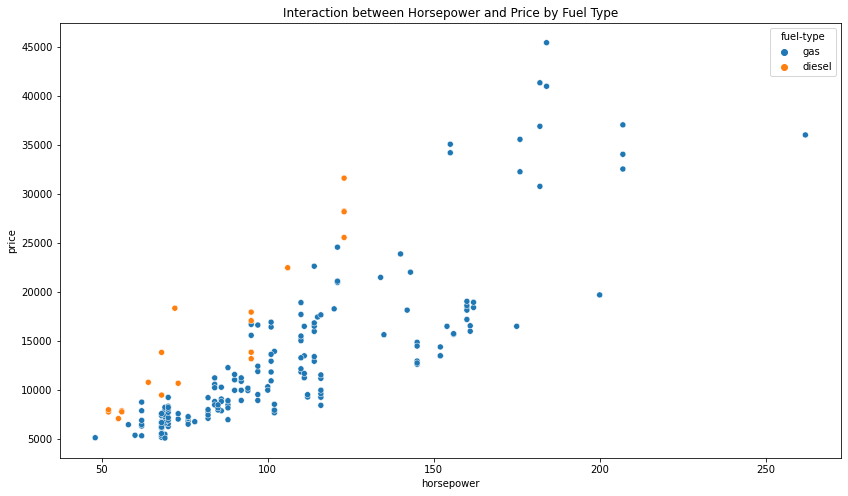

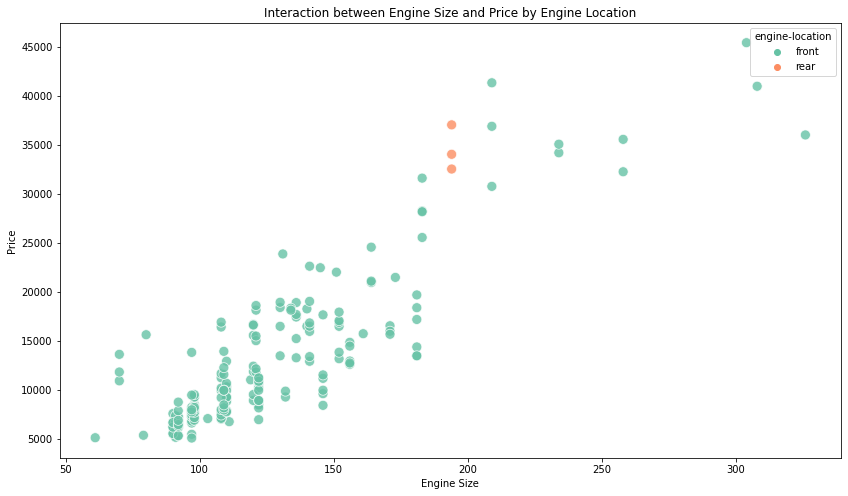

In [16]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='horsepower', y='price', hue='fuel-type')
plt.title('Interaction between Horsepower and Price by Fuel Type')
plt.show()

plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='engine-size', y='price', hue='engine-location', palette='Set2', s=100, alpha=0.8)
plt.title('Interaction between Engine Size and Price by Engine Location')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


## Analysis of Categorical Variables with Multiple Correspondence Analysis (MCA)

After pre-processing the dataset by removing missing values in the `price` column, we focused our attention on categorical variables to understand their multi-dimensional relationships using Multiple Correspondence Analysis (MCA).

### Inertia Explained by Each Component
First, the explained inertia of each component was visualized. This provides insights into the amount of variance each component captures from the dataset.

### Visualizing MCA Coordinates
Then, the MCA coordinates were plotted, showing the relationships between different categorical levels. This plot provides a multi-dimensional perspective of the data, allowing us to identify potential patterns or clusters among the categorical variables.


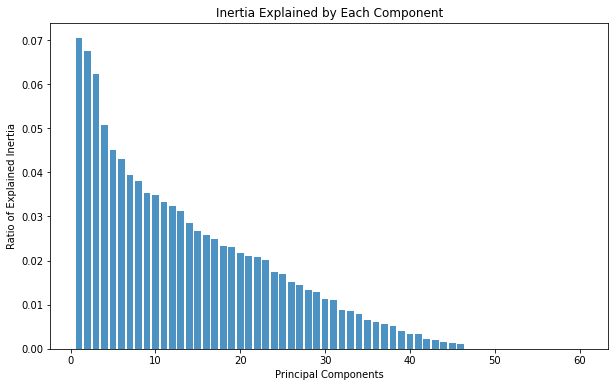

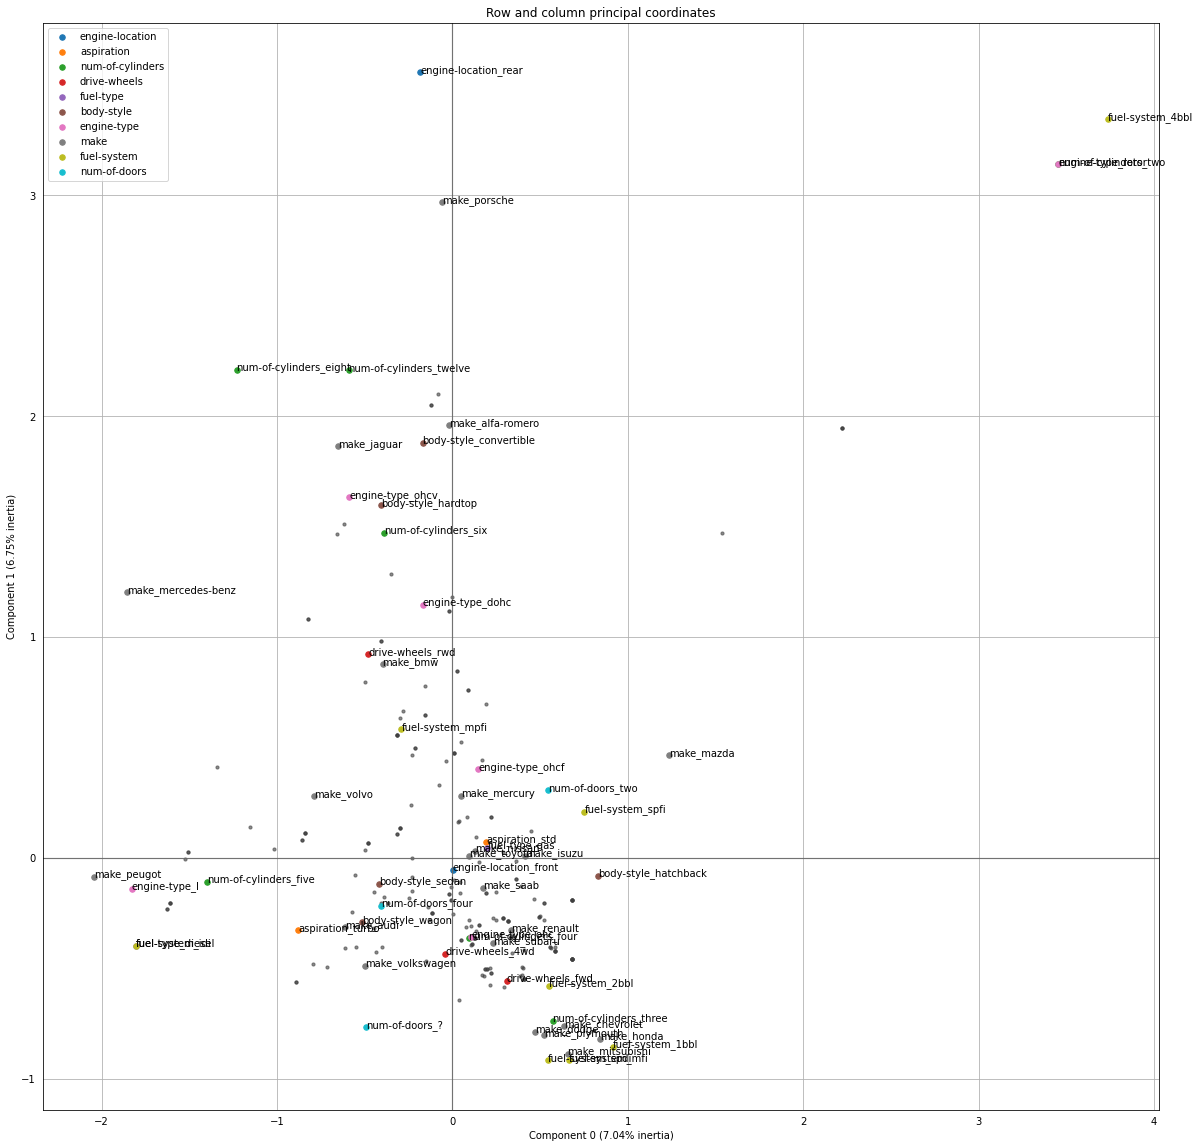

In [17]:
# Filter the dataframe by removing rows with missing 'price'
filtered_df = df.dropna(subset=['price'])

# Select only categorical variables from the sorted columns
cat_data = filtered_df[sorted_cols]

# Initialize and fit the MCA model
mca = prince.MCA(n_components=80)
mca = mca.fit(cat_data)

# Get the row and column coordinates from the MCA model
row_coordinates = mca.row_coordinates(cat_data)
col_coordinates = mca.column_coordinates(cat_data)
row_coords = row_coordinates
col_coords = col_coordinates

# Obtain the explained inertia
explained_inertia = mca.explained_inertia_

# Number of components
n_components = len(explained_inertia)

# Visualization of explained inertia
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_inertia, alpha=0.8, align='center', label='Individual Explained Inertia')
plt.title('Inertia Explained by Each Component')
plt.xlabel('Principal Components')
plt.ylabel('Ratio of Explained Inertia')
plt.show()

# Plot the MCA coordinates
ax = mca.plot_coordinates(X=cat_data, ax=None, figsize=(20, 20), show_row_labels=False, show_column_labels=True)


## Visualization and Analysis of Categorical Variables with Multiple Correspondence Analysis (MCA)

We embarked on an analysis journey to better understand the relationships between categorical variables and the `price` attribute using Multiple Correspondence Analysis (MCA).

### MCA with Price Annotation
In our initial visual, we employed a scatter plot, where each point corresponds to an observation in our MCA transformed space. Here, the coloring represents the `price` values.

### Linear Heatmap Visualization
Next, we transitioned into a heatmap representation using linear interpolation. This visual offers a continuous color representation based on the underlying `price` values, providing a more unified view.

### Nearest Neighbor Heatmap Visualization
Continuing our exploration, we applied the nearest neighbor method for interpolation in our heatmap. This method can provide sharper transitions between different price regions.

### Kernel Density Estimation (KDE) Heatmap
Lastly, we employed Kernel Density Estimation (KDE) to produce a heatmap. KDE is a non-parametric method to estimate the probability density function of a random variable. The heatmap produced provides a smoothed representation of data concentration areas and their corresponding `price` values.

All these visuals combined offer a comprehensive overview of our data in the MCA space, highlighting the interactions and relations between categorical variables and `price`.


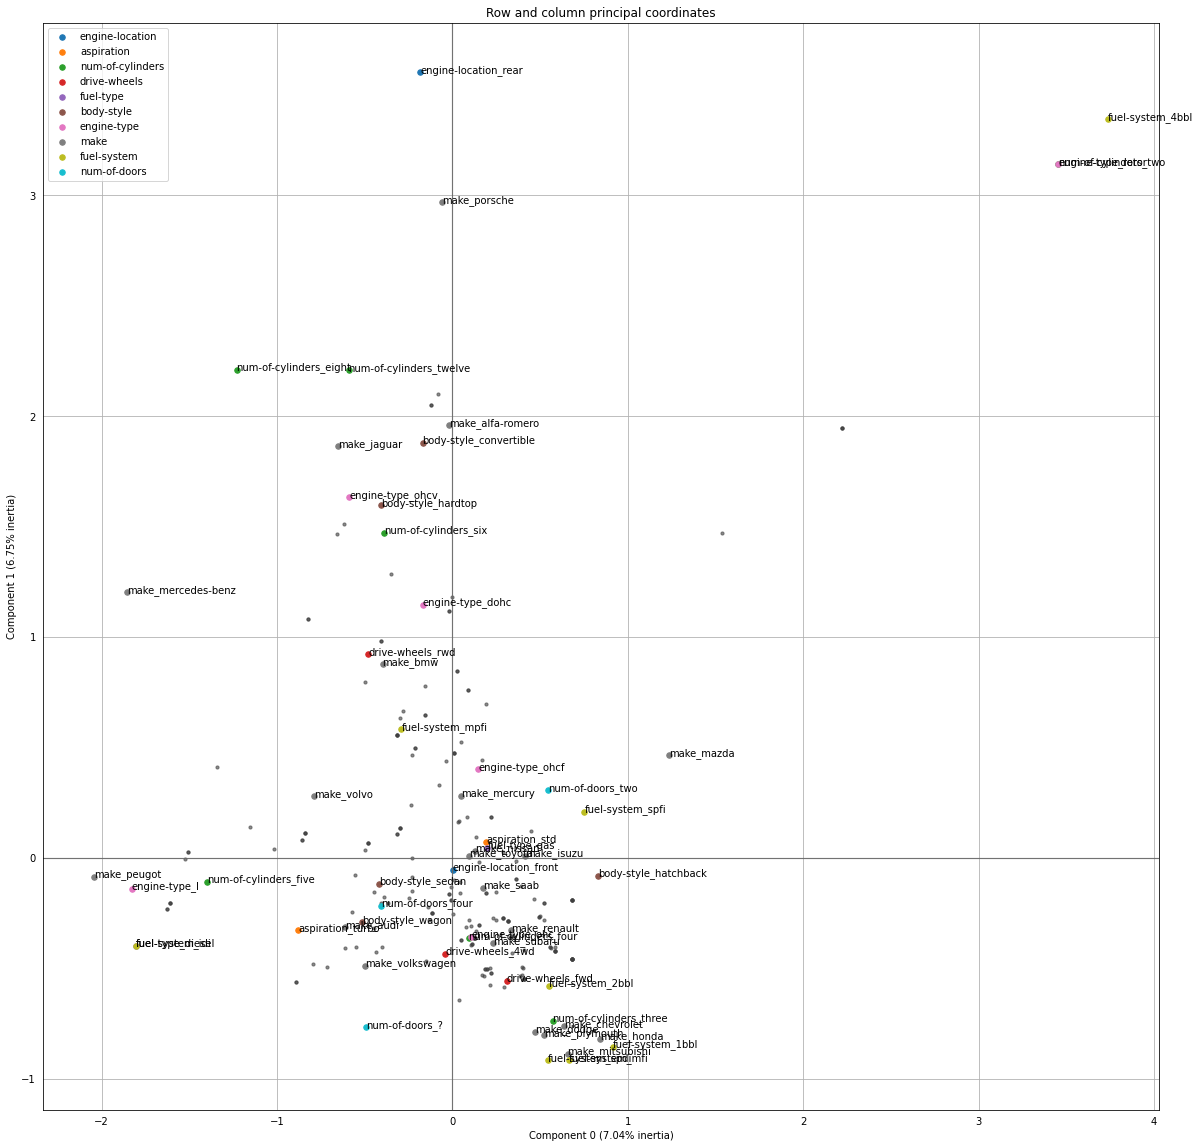

In [18]:
prices = filtered_df.loc[cat_data.index, 'price']

# Visualización
# plt.figure(figsize=(12, 12))
ax = mca.plot_coordinates(X=cat_data, ax=None, figsize=(20, 20), show_row_labels=False, show_column_labels=True)
# Scatter plot
plt.show()

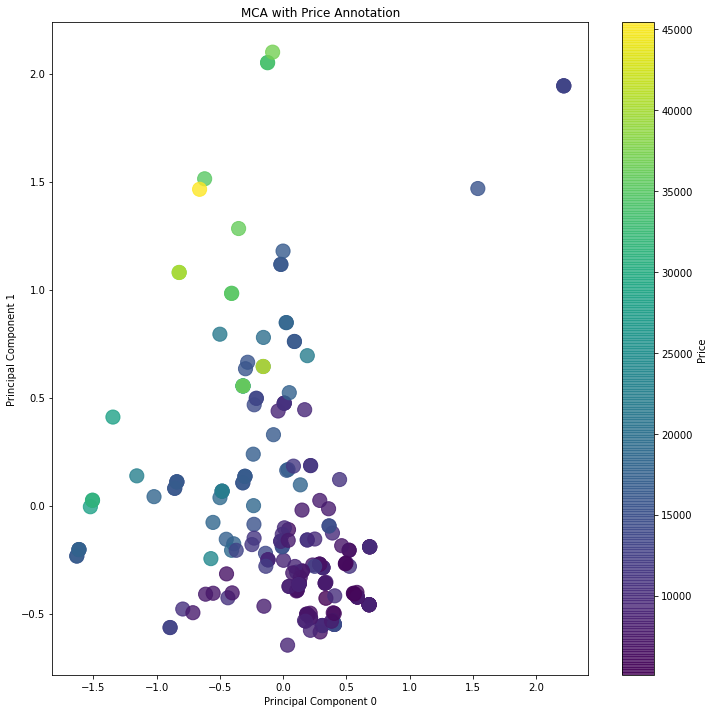

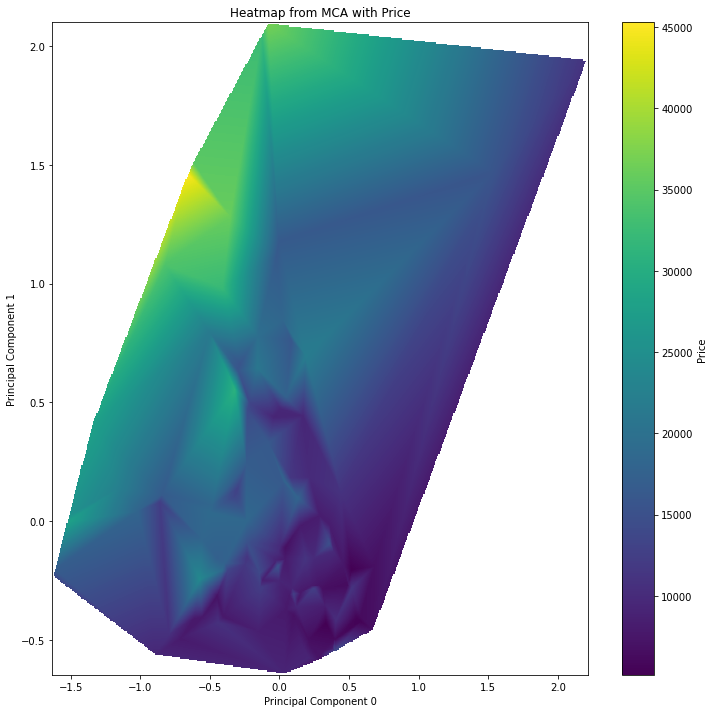

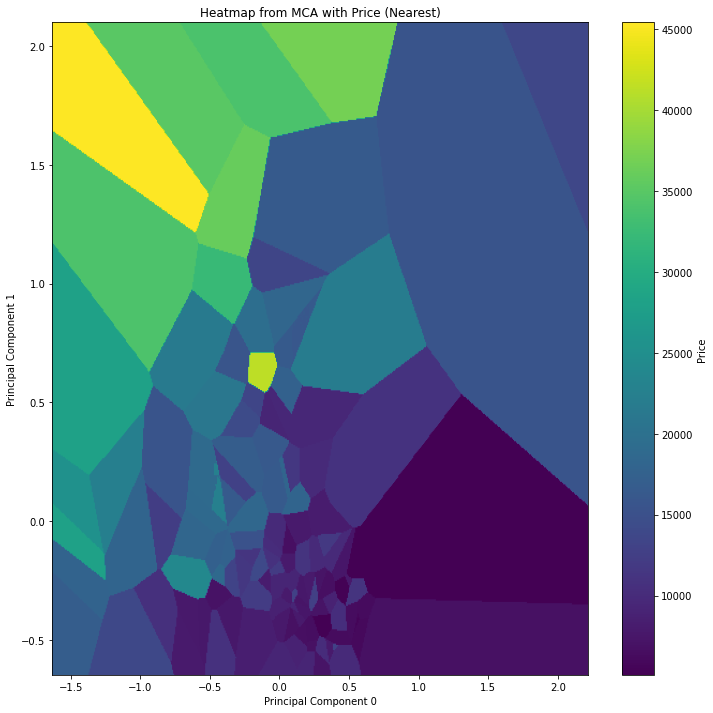

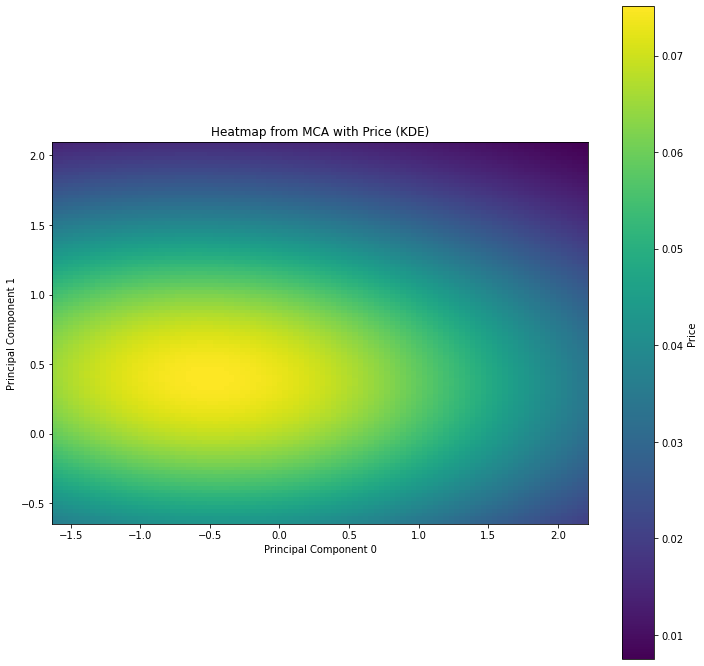

In [19]:
plt.figure(figsize=(12, 12))  # Increase the size of the figure

# Increase the marker size with the `s` argument
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c=prices, cmap='viridis', alpha=0.8, s=200)

plt.title('MCA with Price Annotation')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.colorbar(label='Price')
plt.show()

# Assuming row_coords and prices are your data
x = row_coords.iloc[:, 0].values
y = row_coords.iloc[:, 1].values
z = prices

# Generate a regular grid
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
xi, yi = np.meshgrid(xi, yi)

# Interpolation using griddata
zi = griddata((x, y), z, (xi, yi), method='linear', fill_value=np.nan)

plt.figure(figsize=(12, 12))
plt.imshow(zi, origin='lower', aspect='auto', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
plt.colorbar(label='Price')
plt.title('Heatmap from MCA with Price')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.show()

# Interpolation using griddata with 'nearest' method
zi_nearest = griddata((x, y), z, (xi, yi), method='nearest')

plt.figure(figsize=(12, 12))
plt.imshow(zi_nearest, origin='lower', aspect='auto', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
plt.colorbar(label='Price')
plt.title('Heatmap from MCA with Price (Nearest)')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.show()

# Create a grid
xx, yy = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

# Get the data values at the grid positions
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values,weights=z, bw_method=2)
f = np.reshape(kernel(positions).T, xx.shape)

plt.figure(figsize=(12, 12))
plt.imshow(np.flipud(f), cmap='viridis', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar(label='Price')
plt.title('Heatmap from MCA with Price (KDE)')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.show()


## Visualizing Multiple Correspondence Analysis (MCA) for Categorical Variables

Multiple Correspondence Analysis (MCA) is a powerful tool for exploring relationships within categorical datasets. This visualization aims to shed light on these relationships by presenting them in a two-dimensional plane.

### Plot Components:
- **Categories (Red Squares):** Each red square represents a category within the column being analyzed. Its position on the plot signifies its correlation and relationship with other categories.
  
- **Cars (Colored Dots):** The car data points are colored according to their `price` value. Their positioning offers insights into how each car (based on its categorical attributes) relates to the categories.

### Key Insights:
- By observing how closely categories cluster together, we can discern potential relationships or similarities between them.
- The distribution and coloring of the car data points provide an additional layer of insight, indicating how the price variable plays out across these categorical landscapes.
- The inertia percentages for each component (as shown in the x and y-axis labels) give an indication of how much variance is captured by the plot. The higher the inertia, the more information is represented.

By juxtaposing categories and cars on the same plot, we gain a more holistic understanding of the interplay between different categorical variables and the `price` attribute.


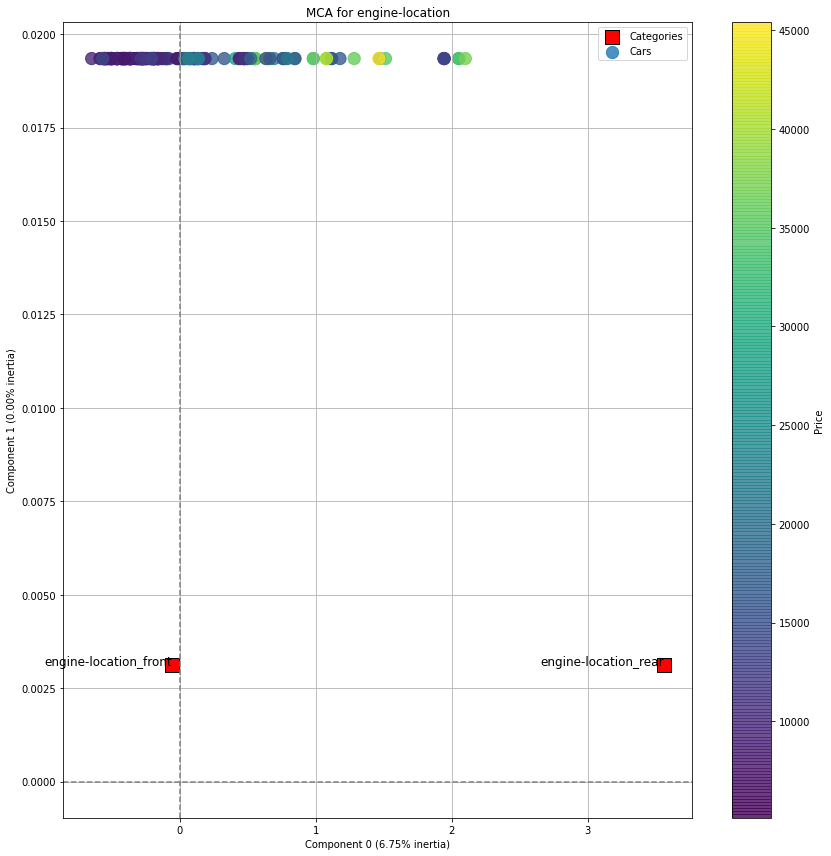

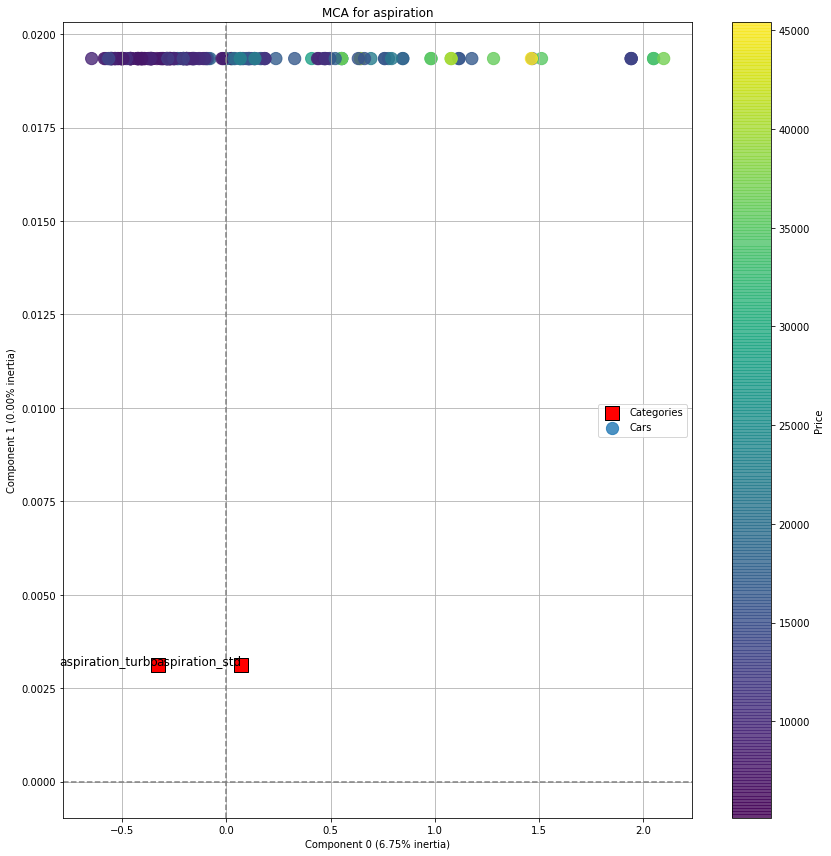

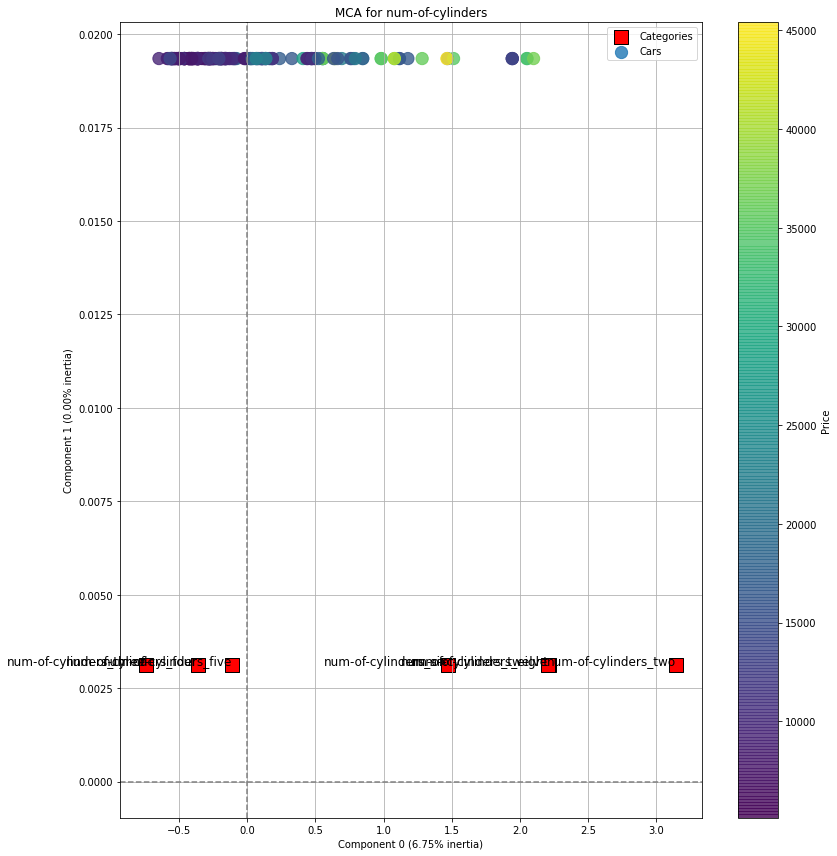

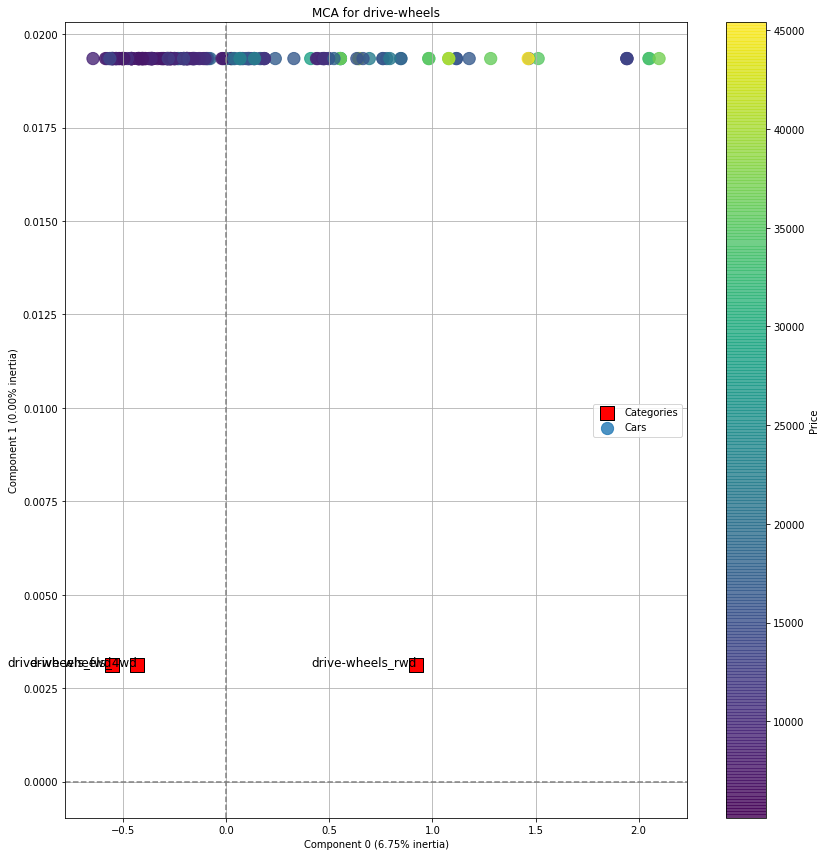

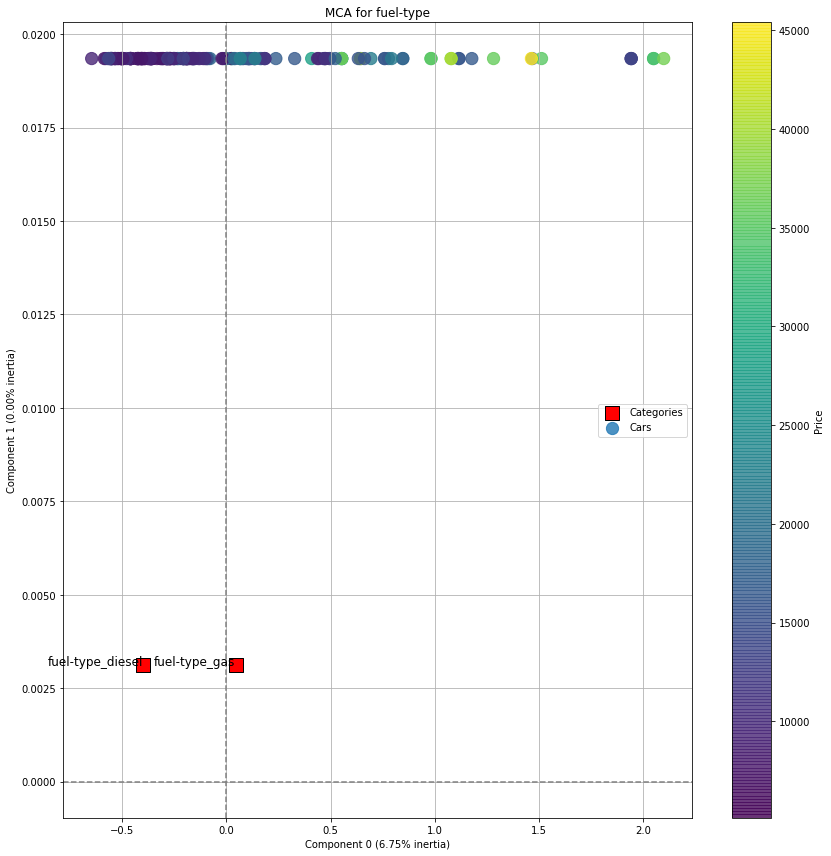

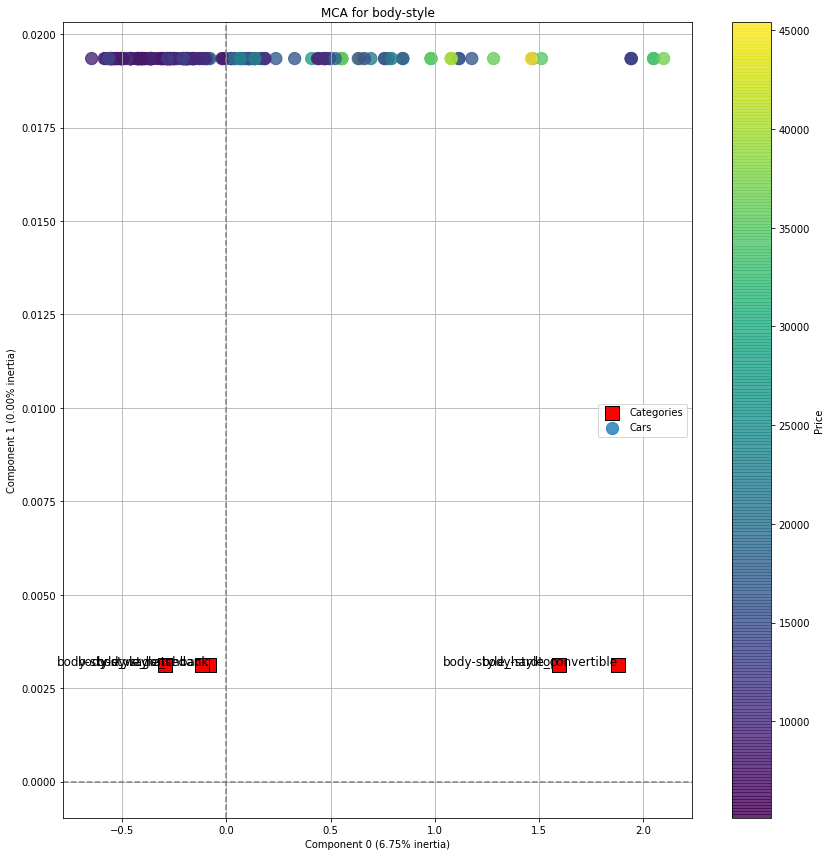

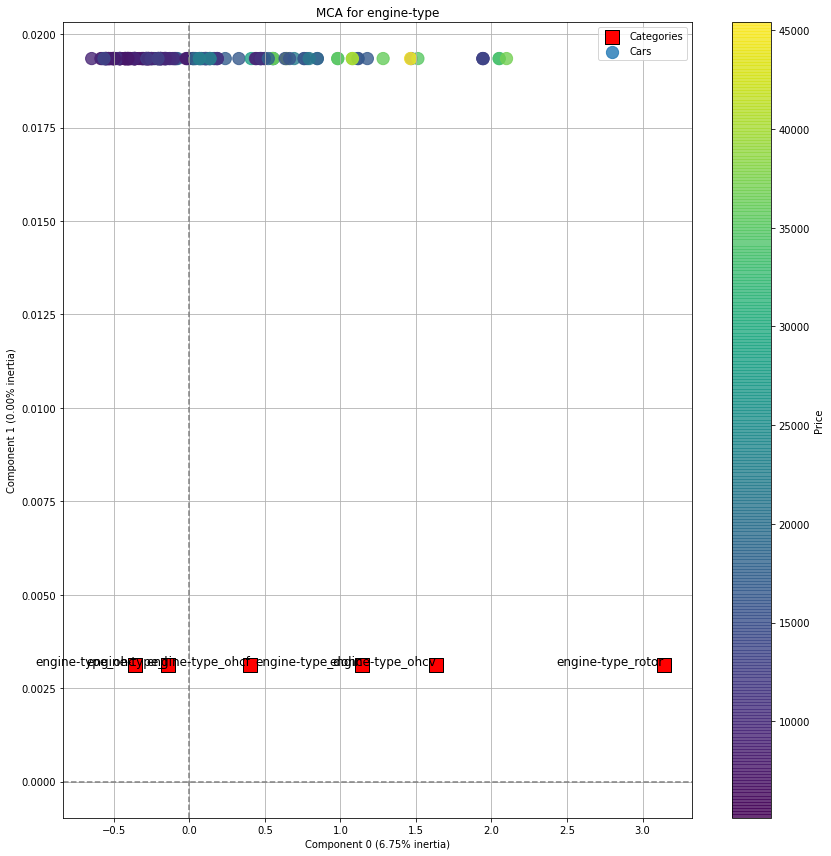

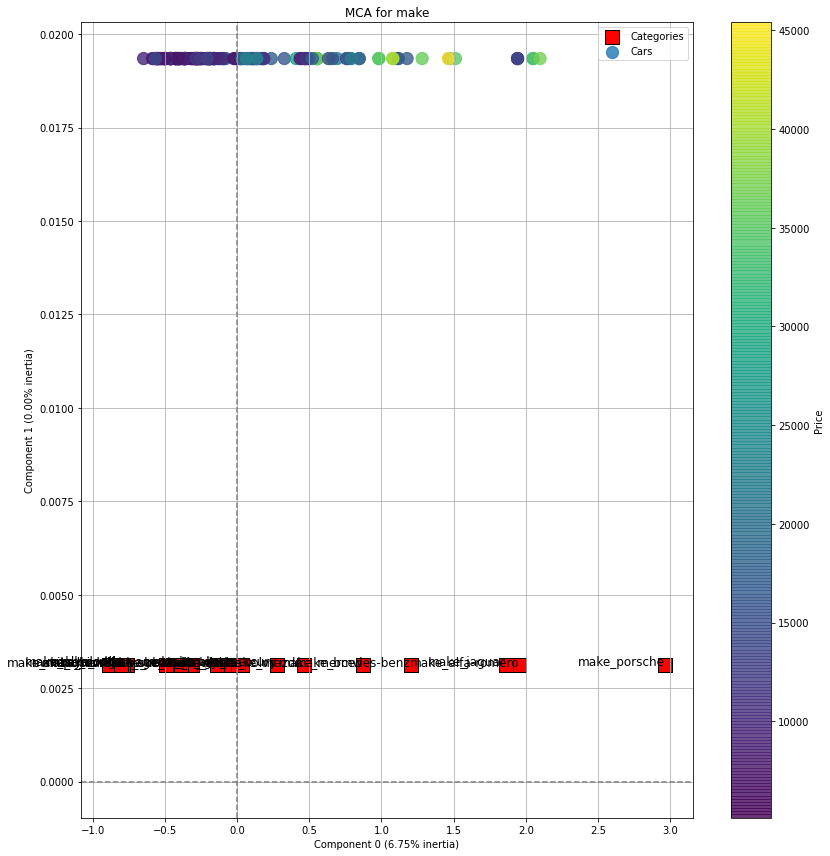

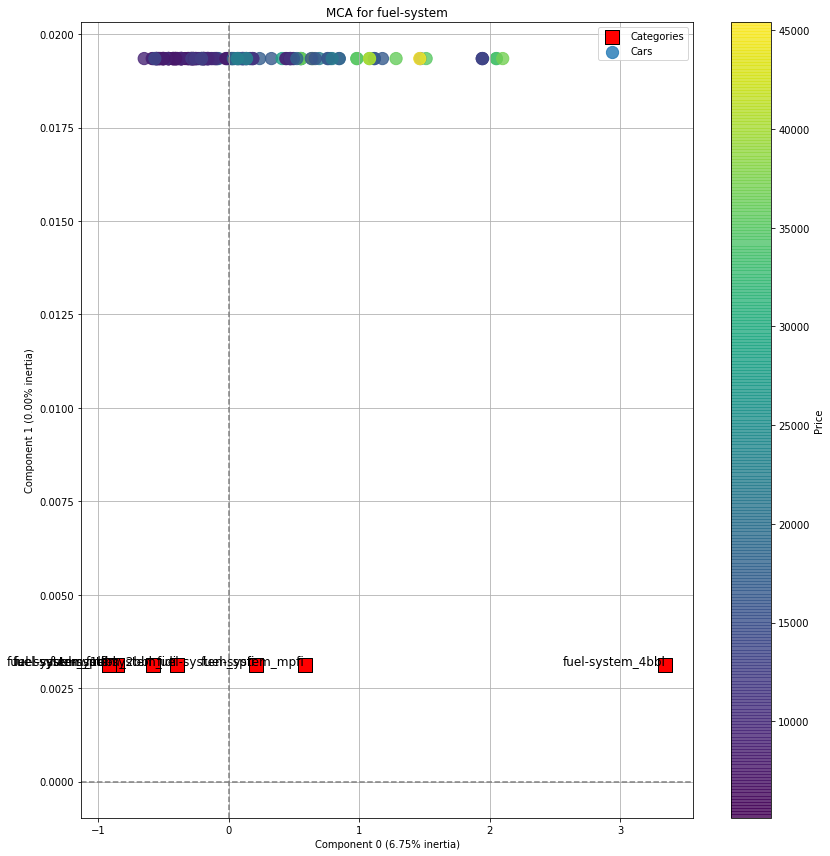

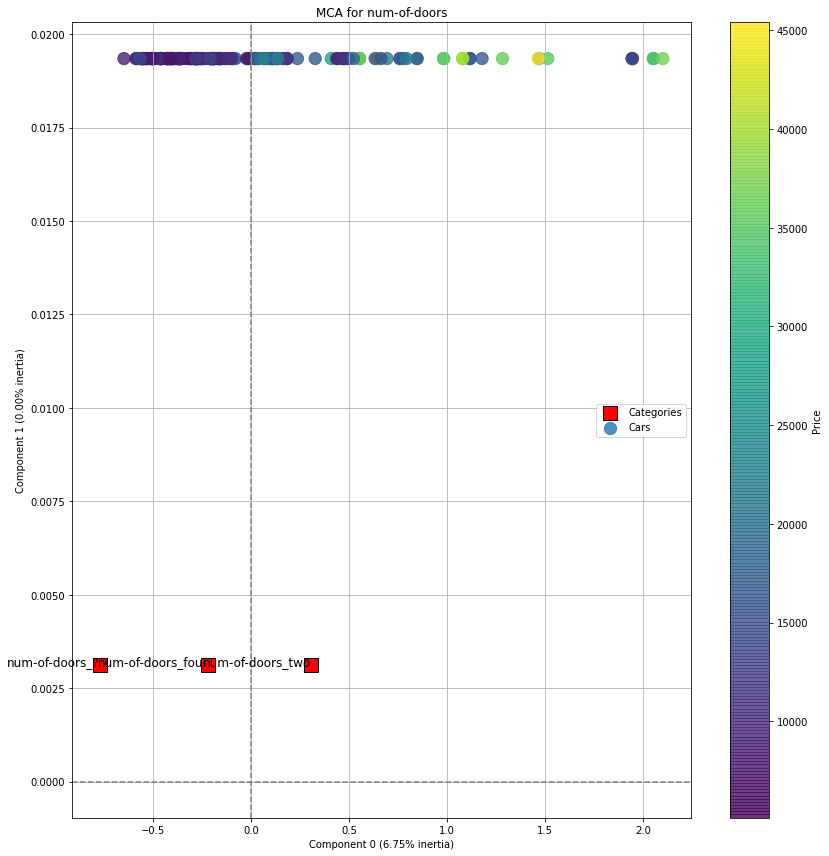

In [20]:
# For each categorical column in the data

c_a = 1
c_b = 54
total_inertia = sum(mca.eigenvalues_)
for col in cat_data.columns:
    # Extract coordinates related only to the categories of the current column
    current_col_coords = col_coords.filter(like=col, axis=0)
    
    # Initiate a new plot figure
    plt.figure(figsize=(12, 12))
    
    # Plot the categories with larger square markers
    plt.scatter(current_col_coords.iloc[:, c_a], current_col_coords.iloc[:, c_b], 
                s=200, c='red', edgecolors='black', marker='s', label='Categories')
    
    # Annotate the categories on the plot
    for index, row in current_col_coords.iterrows():
        plt.annotate(index, (row[c_a], row[c_b]), fontsize=12, ha='right')
    
    # Overlay the car data points, colored by their respective prices
    sc = plt.scatter(row_coords.iloc[:, c_a], row_coords.iloc[:, c_b], 
                     c=prices, cmap='viridis', alpha=0.8, s=150, label='Cars')
    
    # Display the colorbar indicating price ranges
    plt.colorbar(sc, label='Price')
    
    # Set plot titles and labels
    plt.title(f"MCA for {col}")
    plt.xlabel(f"Component 0 ({(mca.eigenvalues_[c_a] / total_inertia):.2%} inertia)")
    plt.ylabel(f"Component 1 ({(mca.eigenvalues_[c_b] / total_inertia):.2%} inertia)")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()


## Analysis of Correlation between MCA Components and Price

In the exploration of the data, the relationship between the MCA components and the `price` variable becomes a focal point. Multiple Correspondence Analysis (MCA) allows us to capture the variance within categorical data, and by correlating this with our continuous target variable (`price`), we can decipher which components play a significant role in explaining the variance in price.

### Plot Components:
- **Bar Height:** Represents the correlation value. A higher bar (positive or negative) indicates a stronger relationship between the MCA component and the price.
  
### Key Insights:
- **Positive Correlation:** The component and price tend to increase together.
  
- **Negative Correlation:** As one value increases, the other tends to decrease.
  
- By identifying the components with the strongest correlations (both positive and negative), we can prioritize them for further investigation or modeling purposes.

From the displayed results, it becomes evident which components are most strongly correlated with `price`. This knowledge is crucial for data-driven decision-making processes and predictive model optimizations.


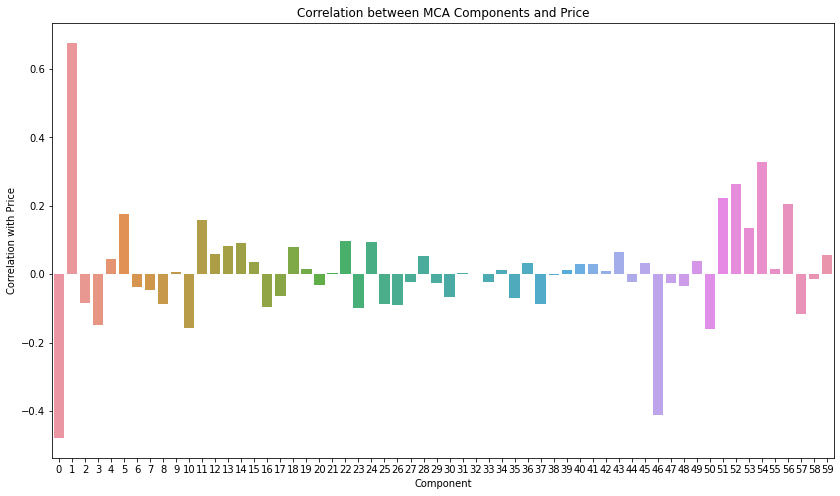

Component 1: 0.67626
Component 0: -0.47895
Component 46: -0.41096
Component 54: 0.32865
Component 52: 0.26196
Component 51: 0.22257
Component 56: 0.20553
Component 5: 0.17666
Component 50: -0.16008
Component 10: -0.15794
Component 11: 0.15745
Component 3: -0.14819
Component 53: 0.13557
Component 57: -0.11708
Component 22: 0.09782
Component 23: -0.09770
Component 16: -0.09693
Component 24: 0.09402
Component 26: -0.09042
Component 14: 0.09012
Component 37: -0.08843
Component 8: -0.08744
Component 25: -0.08595
Component 2: -0.08303
Component 13: 0.08221
Component 18: 0.07839
Component 35: -0.06948
Component 30: -0.06629
Component 17: -0.06467
Component 43: 0.06363
Component 12: 0.05956
Component 59: 0.05712
Component 28: 0.05430
Component 7: -0.04779
Component 4: 0.04347
Component 49: 0.03773
Component 6: -0.03665
Component 48: -0.03574
Component 15: 0.03448
Component 20: -0.03289
Component 36: 0.03237
Component 45: 0.03201
Component 41: 0.02927
Component 40: 0.02844
Component 29: -0.0266

In [21]:
correlations = []
# Calculate the correlation between each MCA component and the prices
for i in range(60):
    corr = row_coordinates.iloc[:, i].corr(prices)
    correlations.append(corr)

# Convert the list of correlations to a pandas Series for visualization
correlation_series = pd.Series(correlations, name="Correlation")

# Plot the correlations
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_series.index, y=correlation_series.values)
plt.title("Correlation between MCA Components and Price")
plt.xlabel("Component")
plt.ylabel("Correlation with Price")
plt.show()

# Sort the components based on the absolute value of their correlations in descending order
sorted_data = sorted(enumerate(correlations), key=lambda x: abs(x[1]), reverse=True)

# Display the top components with the highest absolute correlation with price
for component_index, corr in sorted_data:
    print(f"Component {component_index}: {corr:.5f}")



## Data Preparation

Before diving into predictive modeling, it's crucial to ensure that our data is well-organized and devoid of missing values, especially in our target variable, which in this case is `price`. 

1. **Filtering the Data:** We start by removing any rows with missing values in the `price` column. 
2. **Feature Selection:** After this, only a subset of columns is chosen based on domain knowledge or previous exploratory analysis. 
3. **Train-Test Split:** Finally, to ensure our model is robust and can generalize to new, unseen data, we split our dataset into a training set and a testing set. Here, we're using 10% of the data as our test set.

## Predictive Modeling

With the data now prepared, we can transition into the predictive modeling phase. The aim here is to leverage the features (independent variables) to predict the `price` of cars. Different algorithms might be experimented with, and evaluation metrics will be used to gauge the performance of our models on the test set.


In [22]:
# Remove rows with missing 'price' values
filtered_df = df.dropna(subset=['price'])

# Select specific columns from the dataframe
filtered_df = filtered_df[['make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']]

# Separate the independent variables and the target variable
X = filtered_df.drop(columns=['price'])
y = filtered_df['price']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # Using 10% for testing


## Data Preprocessing: MCATransformer and Column Transformer

The following code outlines a multi-step approach to data preprocessing using a custom transformer and a column transformer.

### MCATransformer Class

This class serves as a custom transformer that incorporates both One-Hot Encoding (OHE) and Multiple Correspondence Analysis (MCA) for categorical data transformation.

- `__init__`: Initializes the class with a specified number of components (default is 10,000). Both MCA and OHE instances are created here.
- `fit`: Fits the transformer. First, it one-hot encodes the categorical data. Then, it fits the MCA model to the encoded data. Afterward, the number of components is set to the number of columns in the encoded data.
- `transform`: Transforms the input data. It one-hot encodes the data and then applies MCA transformation.

### Column Identification

- `all_columns`: Stores all the column names from the data.
- `categorical_features`: Contains the names of the categorical columns, as defined by the variable `sorted_cols`.
- `numerical_features`: Contains the names of the numerical columns, derived by subtracting the set of categorical columns from all columns.

### Imputation Strategies

Data often has missing values. The chosen strategies for handling them are:
- `cat_imputer`: Fills missing values in categorical columns with the string 'empty'.
- `num_imputer`: Fills missing values in numerical columns with the median of that column.

### ColumnTransformer: Preprocessor

The `preprocessor` is a column transformer that applies specific transformations to different types of columns.

- Categorical Columns (`cat`):
  1. Missing values are imputed using the `cat_imputer`.
  2. The data is then transformed using the `MCATransformer`, which applies OHE followed by MCA.
  
- Numerical Columns (`num`):
  1. Missing values are imputed using the `num_imputer`.
  2. No other transformation is applied; data is passed through as-is (denoted by `'passthrough'`).

The column transformer ensures that these transformations are applied consistently across different datasets, such as training and testing sets.



In [23]:
class MCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=10000):
        self.n_components = n_components
        self.mca = MCA(n_components=self.n_components)
        self.ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        
    def fit(self, X, y=None):
        X_encoded = self.ohe.fit_transform(X)
        self.mca.fit(X_encoded)
        self.n_components = X_encoded.shape[1]
        return self
    
    def transform(self, X, y=None):
        X_encoded = self.ohe.transform(X)
        return self.mca.transform(X_encoded)

# We have a list of categorical and numerical column names
all_columns = set(X.columns)
categorical_features = sorted_cols
numerical_features = list(all_columns - set(categorical_features))

# Define imputers for categorical and numerical features
cat_imputer = SimpleImputer(strategy='constant', fill_value='empty')
num_imputer = SimpleImputer(strategy='median')

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', cat_imputer),
            ('mca', MCATransformer())
        ]), categorical_features),
        ('num', Pipeline([
            ('imputer', num_imputer),
            ('passthrough', 'passthrough')
        ]), numerical_features)
    ]
)




## Objective Function for Hyperparameter Tuning

This objective function is designed for hyperparameter tuning of a machine learning model using a pipeline. The primary aim is to identify the optimal hyperparameters that maximize the performance of the SVR algorithm.

### SVR Hyperparameters:

- `C`: The regularization parameter. The strength of the regularization is inversely proportional to `C`. It's suggested on a logarithmic scale.
- `kernel`: Specifies the kernel type for the algorithm. Options include linear, rbf, poly, and sigmoid.
- `degree`: Degree of the polynomial kernel function (`poly`). It's ignored by all other kernels.
- `gamma`: Kernel coefficient for the model. Options are `scale` and `auto`.
- `coef0`: An independent term in the kernel function.

### Feature Selection Hyperparameters:

- `k`: Number of top features to select. The best `k` features are selected using `SelectKBest`.

### Pipeline Construction:

Upon receiving hyperparameter suggestions from the `trial`, the pipeline is set up as follows:
1. Data undergoes preprocessing via a predefined `preprocessor`.
2. Features are standardized using the `StandardScaler`.
3. The top `k` features are selected using `SelectKBest`.
4. The SVR model is trained using the suggested hyperparameters.

### Model Evaluation:

The performance of the constructed model, given the hyperparameters, is assessed using k-fold cross-validation on the training set. The function then returns the average accuracy from all the folds. This average accuracy serves as the metric that the optimization library (like Optuna) uses to propose the next set of hyperparameters.

In a nutshell, this function streamlines the often tedious task of hyperparameter tuning, guiding us toward a more refined machine learning model.


In [24]:
def objective(trial):
    # Hyperparameters for SVR
    C = trial.suggest_float("C", 1e-10, 9e6, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
    if kernel == "poly":
        degree = trial.suggest_int("degree", 1, 5)
    else:
        degree = 3
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    coef0 = trial.suggest_float("coef0", -1.0, 1.0)
    
    # Hyperparameters for SelectKBest
    k = trial.suggest_int("k", 1, X.shape[1])  # You can adjust these limits as per your preferences
    
    print(f"Trial {trial.number} - Parameters: {trial.params}")
    
    # Build the pipeline with the suggested hyperparameters
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('f_selector', SelectKBest(k=k)),
        ('classifier', SVR(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0))
    ])
    
    # Evaluate the pipeline using k-fold cross-validation and return the average accuracy
    return cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=5).mean()



## Hyperparameter Optimization with Optuna

In the quest to achieve the best performance for machine learning models, hyperparameter tuning is a vital step. Optuna is a Python library specifically designed to facilitate this. The provided code showcases an example of how to utilize Optuna for the same.

### Setting up the Pruner

The `MedianPruner` is initialized which is a strategy to prune unpromising trials:
- `n_startup_trials`: Number of trials to conduct before starting the actual pruning.
- `n_warmup_steps`: Number of warm-up steps.
- `interval_steps`: Interval in number of trials between the pruning checks.

This pruner monitors intermediate results and halts unpromising trials early, saving computational time.

### Creating the Study Object

The `create_study` function is used to initiate an optimization study. 
- `direction="maximize"` indicates that the objective is to maximize some metric, specifically the R^2 score for regression problems.
- `pruner`: The pruner defined previously is passed to prune trials.

### Running the Optimization

The optimization is run in bursts, governed by the `TIME_LIMIT`:
- `TIME_LIMIT`: Each burst of optimization will run for this many seconds. Here, it's set to 60 seconds as a demonstration.
- In the loop, the `study.optimize` function initiates the hyperparameter tuning using the objective function defined earlier. This is done multiple times (5 times in this case) to iteratively refine the search.

This iterative approach allows for breaks or external interruptions, making it more flexible in real-world scenarios where optimization might run for prolonged periods.

To summarize, this code offers a robust framework for hyperparameter tuning, balancing thorough search with computational efficiency.


In [25]:
pruner = optuna.pruners.MedianPruner(
    n_startup_trials=20, 
    n_warmup_steps=0, 
    interval_steps=1
)

study = optuna.create_study(direction="maximize", pruner=pruner)  


TIME_LIMIT = 60  # 1 minute for demonstration purposes

for _ in range(5):  # NUM_ITERATIONS is the number of times you wish to restart the optimization
    study.optimize(objective, n_trials=None, timeout=TIME_LIMIT)


[I 2023-12-19 14:23:34,225] A new study created in memory with name: no-name-538b8de3-dd4f-49d8-914d-79c274cfd39e


Trial 0 - Parameters: {'C': 4.862604846278323e-06, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale', 'coef0': -0.3961264657915411, 'k': 9}


[I 2023-12-19 14:23:37,052] Trial 0 finished with value: -7.300157329996065e+68 and parameters: {'C': 4.862604846278323e-06, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale', 'coef0': -0.3961264657915411, 'k': 9}. Best is trial 0 with value: -7.300157329996065e+68.


Trial 1 - Parameters: {'C': 2.712303585450728e-08, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.9221389165896621, 'k': 23}


[I 2023-12-19 14:23:37,415] Trial 1 finished with value: -0.11240031821417587 and parameters: {'C': 2.712303585450728e-08, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.9221389165896621, 'k': 23}. Best is trial 1 with value: -0.11240031821417587.


Trial 2 - Parameters: {'C': 22.209305749116083, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.5637346306690556, 'k': 12}


[I 2023-12-19 14:23:37,752] Trial 2 finished with value: 0.04177102596265381 and parameters: {'C': 22.209305749116083, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.5637346306690556, 'k': 12}. Best is trial 2 with value: 0.04177102596265381.


Trial 3 - Parameters: {'C': 2.200260397027491e-09, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.7200042317450481, 'k': 8}


[I 2023-12-19 14:23:38,205] Trial 3 finished with value: -1776.2755733871247 and parameters: {'C': 2.200260397027491e-09, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.7200042317450481, 'k': 8}. Best is trial 2 with value: 0.04177102596265381.


Trial 4 - Parameters: {'C': 0.003022379206415069, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.982349813728844, 'k': 1}


[I 2023-12-19 14:23:38,503] Trial 4 finished with value: -0.11238961081276289 and parameters: {'C': 0.003022379206415069, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.982349813728844, 'k': 1}. Best is trial 2 with value: 0.04177102596265381.


Trial 5 - Parameters: {'C': 255301.72570614456, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.9330479502259061, 'k': 20}


[I 2023-12-19 14:23:38,870] Trial 5 finished with value: -15325.503795226472 and parameters: {'C': 255301.72570614456, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.9330479502259061, 'k': 20}. Best is trial 2 with value: 0.04177102596265381.


Trial 6 - Parameters: {'C': 104647.1963054618, 'kernel': 'poly', 'degree': 4, 'gamma': 'scale', 'coef0': 0.029074087047046948, 'k': 7}


[I 2023-12-19 14:23:39,416] Trial 6 finished with value: -5.184591400843436e+121 and parameters: {'C': 104647.1963054618, 'kernel': 'poly', 'degree': 4, 'gamma': 'scale', 'coef0': 0.029074087047046948, 'k': 7}. Best is trial 2 with value: 0.04177102596265381.


Trial 7 - Parameters: {'C': 0.0003969123209940099, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': -0.36906780257072613, 'k': 23}


[I 2023-12-19 14:23:39,853] Trial 7 finished with value: -2.9770215146008738e+138 and parameters: {'C': 0.0003969123209940099, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': -0.36906780257072613, 'k': 23}. Best is trial 2 with value: 0.04177102596265381.


Trial 8 - Parameters: {'C': 0.00019157980994509425, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'coef0': 0.6174286429581624, 'k': 4}


[I 2023-12-19 14:23:40,175] Trial 8 finished with value: -5.466881378664271e+36 and parameters: {'C': 0.00019157980994509425, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'coef0': 0.6174286429581624, 'k': 4}. Best is trial 2 with value: 0.04177102596265381.


Trial 9 - Parameters: {'C': 4.27295654269885e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5893089969005534, 'k': 13}


[I 2023-12-19 14:23:40,589] Trial 9 finished with value: -0.11240031816678804 and parameters: {'C': 4.27295654269885e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5893089969005534, 'k': 13}. Best is trial 2 with value: 0.04177102596265381.


Trial 10 - Parameters: {'C': 29.19834421572291, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.0030201790796836603, 'k': 15}


[I 2023-12-19 14:23:40,965] Trial 10 finished with value: -0.017822225997746077 and parameters: {'C': 29.19834421572291, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.0030201790796836603, 'k': 15}. Best is trial 2 with value: 0.04177102596265381.


Trial 11 - Parameters: {'C': 111.61560151236634, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.049111020776208186, 'k': 15}


[I 2023-12-19 14:23:41,300] Trial 11 finished with value: 0.15950775975393644 and parameters: {'C': 111.61560151236634, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.049111020776208186, 'k': 15}. Best is trial 11 with value: 0.15950775975393644.


Trial 12 - Parameters: {'C': 8.8815652630689, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.031296625911870116, 'k': 17}


[I 2023-12-19 14:23:41,698] Trial 12 finished with value: -0.08514226205911672 and parameters: {'C': 8.8815652630689, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.031296625911870116, 'k': 17}. Best is trial 11 with value: 0.15950775975393644.


Trial 13 - Parameters: {'C': 13.925494313335985, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.39847190717191455, 'k': 11}


[I 2023-12-19 14:23:42,053] Trial 13 finished with value: 0.6128255788742196 and parameters: {'C': 13.925494313335985, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.39847190717191455, 'k': 11}. Best is trial 13 with value: 0.6128255788742196.


Trial 14 - Parameters: {'C': 2841.861441650921, 'kernel': 'linear', 'gamma': 'scale', 'coef0': 0.3411166461566413, 'k': 17}


[I 2023-12-19 14:23:42,488] Trial 14 finished with value: -7.888811803925783e+26 and parameters: {'C': 2841.861441650921, 'kernel': 'linear', 'gamma': 'scale', 'coef0': 0.3411166461566413, 'k': 17}. Best is trial 13 with value: 0.6128255788742196.


Trial 15 - Parameters: {'C': 0.7905665810815152, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.21416780348537565, 'k': 11}


[I 2023-12-19 14:23:42,960] Trial 15 finished with value: -1.0581641725869365e+24 and parameters: {'C': 0.7905665810815152, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.21416780348537565, 'k': 11}. Best is trial 13 with value: 0.6128255788742196.


Trial 16 - Parameters: {'C': 976.8598464054239, 'kernel': 'linear', 'gamma': 'scale', 'coef0': 0.24141196725868974, 'k': 15}


[I 2023-12-19 14:23:43,331] Trial 16 finished with value: -1.2478280866976544e+25 and parameters: {'C': 976.8598464054239, 'kernel': 'linear', 'gamma': 'scale', 'coef0': 0.24141196725868974, 'k': 15}. Best is trial 13 with value: 0.6128255788742196.


Trial 17 - Parameters: {'C': 0.12620536348376596, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.2688890330615704, 'k': 5}


[I 2023-12-19 14:23:43,650] Trial 17 finished with value: -0.11181888091604475 and parameters: {'C': 0.12620536348376596, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.2688890330615704, 'k': 5}. Best is trial 13 with value: 0.6128255788742196.


Trial 18 - Parameters: {'C': 3000639.5694752974, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.6560695140714553, 'k': 10}


[I 2023-12-19 14:23:44,189] Trial 18 finished with value: 0.7054862737947722 and parameters: {'C': 3000639.5694752974, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.6560695140714553, 'k': 10}. Best is trial 18 with value: 0.7054862737947722.


Trial 19 - Parameters: {'C': 3259627.655530804, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.6499182265817076, 'k': 10}


[I 2023-12-19 14:23:52,476] Trial 19 finished with value: -1.0814106465647708e+27 and parameters: {'C': 3259627.655530804, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.6499182265817076, 'k': 10}. Best is trial 18 with value: 0.7054862737947722.


Trial 20 - Parameters: {'C': 3445538.5617720475, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7707232489870608, 'k': 6}


[I 2023-12-19 14:23:54,020] Trial 20 finished with value: 0.6487551563248711 and parameters: {'C': 3445538.5617720475, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7707232489870608, 'k': 6}. Best is trial 18 with value: 0.7054862737947722.


Trial 21 - Parameters: {'C': 6677348.305484399, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7932032114712836, 'k': 6}


[I 2023-12-19 14:23:57,075] Trial 21 finished with value: 0.6493637228190828 and parameters: {'C': 6677348.305484399, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7932032114712836, 'k': 6}. Best is trial 18 with value: 0.7054862737947722.


Trial 22 - Parameters: {'C': 6428039.132995823, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8174912629609657, 'k': 5}


[I 2023-12-19 14:24:00,319] Trial 22 finished with value: -0.019504872096685187 and parameters: {'C': 6428039.132995823, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8174912629609657, 'k': 5}. Best is trial 18 with value: 0.7054862737947722.


Trial 23 - Parameters: {'C': 58021.54210643415, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.5953748522454294, 'k': 1}


[I 2023-12-19 14:24:01,255] Trial 23 finished with value: 0.013258740688169101 and parameters: {'C': 58021.54210643415, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.5953748522454294, 'k': 1}. Best is trial 18 with value: 0.7054862737947722.


Trial 24 - Parameters: {'C': 3851.4941579340925, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8261736248793853, 'k': 7}


[I 2023-12-19 14:24:01,960] Trial 24 finished with value: 0.5663197201671956 and parameters: {'C': 3851.4941579340925, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8261736248793853, 'k': 7}. Best is trial 18 with value: 0.7054862737947722.


Trial 25 - Parameters: {'C': 8552980.610640435, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.511598428169476, 'k': 3}


[I 2023-12-19 14:24:05,138] Trial 25 finished with value: 0.23695001481654643 and parameters: {'C': 8552980.610640435, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.511598428169476, 'k': 3}. Best is trial 18 with value: 0.7054862737947722.


Trial 26 - Parameters: {'C': 206356.7880157907, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7701816698646824, 'k': 6}


[I 2023-12-19 14:24:06,028] Trial 26 finished with value: 0.7313995515719723 and parameters: {'C': 206356.7880157907, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7701816698646824, 'k': 6}. Best is trial 26 with value: 0.7313995515719723.


Trial 27 - Parameters: {'C': 32493.95008516615, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8557453198910874, 'k': 3}


[I 2023-12-19 14:24:06,729] Trial 27 finished with value: 0.7124634055279269 and parameters: {'C': 32493.95008516615, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8557453198910874, 'k': 3}. Best is trial 26 with value: 0.7313995515719723.


Trial 28 - Parameters: {'C': 23122.625845058425, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9913319339382642, 'k': 3}


[I 2023-12-19 14:24:07,499] Trial 28 finished with value: 0.7852018346182909 and parameters: {'C': 23122.625845058425, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9913319339382642, 'k': 3}. Best is trial 28 with value: 0.7852018346182909.


Trial 29 - Parameters: {'C': 14130.96298592091, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9699326862576203, 'k': 3}


[I 2023-12-19 14:24:08,420] Trial 29 finished with value: 0.7708017777268588 and parameters: {'C': 14130.96298592091, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9699326862576203, 'k': 3}. Best is trial 28 with value: 0.7852018346182909.


Trial 30 - Parameters: {'C': 685.8733888088609, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9658499866748773, 'k': 2}


[I 2023-12-19 14:24:09,180] Trial 30 finished with value: 0.36098035982012316 and parameters: {'C': 685.8733888088609, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9658499866748773, 'k': 2}. Best is trial 28 with value: 0.7852018346182909.


Trial 31 - Parameters: {'C': 80714.34488784651, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9222534576721597, 'k': 3}


[I 2023-12-19 14:24:09,977] Trial 31 finished with value: 0.800229993077683 and parameters: {'C': 80714.34488784651, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9222534576721597, 'k': 3}. Best is trial 31 with value: 0.800229993077683.


Trial 32 - Parameters: {'C': 7664.214675059147, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9827239690416484, 'k': 3}


[I 2023-12-19 14:24:10,830] Trial 32 finished with value: 0.5510064944096416 and parameters: {'C': 7664.214675059147, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9827239690416484, 'k': 3}. Best is trial 31 with value: 0.800229993077683.


Trial 33 - Parameters: {'C': 209741.4624729644, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8984556018381195, 'k': 4}


[I 2023-12-19 14:24:11,755] Trial 33 finished with value: 0.7935069285099312 and parameters: {'C': 209741.4624729644, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8984556018381195, 'k': 4}. Best is trial 31 with value: 0.800229993077683.


Trial 34 - Parameters: {'C': 255.13909902097873, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.4971118956815512, 'k': 1}


[I 2023-12-19 14:24:12,501] Trial 34 finished with value: 0.0630187555649814 and parameters: {'C': 255.13909902097873, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.4971118956815512, 'k': 1}. Best is trial 31 with value: 0.800229993077683.


Trial 35 - Parameters: {'C': 17827.868526327446, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9065151405765988, 'k': 4}


[I 2023-12-19 14:24:13,076] Trial 35 finished with value: 0.7795236473635504 and parameters: {'C': 17827.868526327446, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9065151405765988, 'k': 4}. Best is trial 31 with value: 0.800229993077683.


Trial 36 - Parameters: {'C': 420714.0228870386, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.6982001596504486, 'k': 8}


[I 2023-12-19 14:24:14,046] Trial 36 finished with value: -3.705810313096627e+25 and parameters: {'C': 420714.0228870386, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.6982001596504486, 'k': 8}. Best is trial 31 with value: 0.800229993077683.


Trial 37 - Parameters: {'C': 0.9453748158286349, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.8860968247059828, 'k': 4}


[I 2023-12-19 14:24:14,641] Trial 37 finished with value: -0.1059666394596396 and parameters: {'C': 0.9453748158286349, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.8860968247059828, 'k': 4}. Best is trial 31 with value: 0.800229993077683.


Trial 38 - Parameters: {'C': 34018.29976163526, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.882165063922391, 'k': 2}


[I 2023-12-19 14:24:15,263] Trial 38 finished with value: 0.6106067506306986 and parameters: {'C': 34018.29976163526, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.882165063922391, 'k': 2}. Best is trial 31 with value: 0.800229993077683.


Trial 39 - Parameters: {'C': 2.1068168177021444e-10, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': -0.4522390564775819, 'k': 8}


[I 2023-12-19 14:24:15,717] Trial 39 finished with value: -0.11240031807895554 and parameters: {'C': 2.1068168177021444e-10, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': -0.4522390564775819, 'k': 8}. Best is trial 31 with value: 0.800229993077683.


Trial 40 - Parameters: {'C': 299489.3941610229, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.6038960421866391, 'k': 5}


[I 2023-12-19 14:24:16,303] Trial 40 finished with value: -22405.567211002493 and parameters: {'C': 299489.3941610229, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.6038960421866391, 'k': 5}. Best is trial 31 with value: 0.800229993077683.


Trial 41 - Parameters: {'C': 11736.507937158782, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9762496133688057, 'k': 4}


[I 2023-12-19 14:24:17,067] Trial 41 finished with value: 0.7384183421001825 and parameters: {'C': 11736.507937158782, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9762496133688057, 'k': 4}. Best is trial 31 with value: 0.800229993077683.


Trial 42 - Parameters: {'C': 493916.4567884704, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9018110853514361, 'k': 2}


[I 2023-12-19 14:24:17,796] Trial 42 finished with value: 0.27041914988615384 and parameters: {'C': 493916.4567884704, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9018110853514361, 'k': 2}. Best is trial 31 with value: 0.800229993077683.


Trial 43 - Parameters: {'C': 7.047396390571173e-07, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9976529325583218, 'k': 4}


[I 2023-12-19 14:24:18,512] Trial 43 finished with value: -0.11240031520905229 and parameters: {'C': 7.047396390571173e-07, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9976529325583218, 'k': 4}. Best is trial 31 with value: 0.800229993077683.


Trial 44 - Parameters: {'C': 100.92546576469266, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7126555909598419, 'k': 2}


[I 2023-12-19 14:24:19,204] Trial 44 finished with value: 0.13130120276627427 and parameters: {'C': 100.92546576469266, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7126555909598419, 'k': 2}. Best is trial 31 with value: 0.800229993077683.


Trial 45 - Parameters: {'C': 3091.7852343345407, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8571151728058092, 'k': 7}


[I 2023-12-19 14:24:20,037] Trial 45 finished with value: 0.5129164564832722 and parameters: {'C': 3091.7852343345407, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8571151728058092, 'k': 7}. Best is trial 31 with value: 0.800229993077683.


Trial 46 - Parameters: {'C': 18078.29204750601, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8958161558416868, 'k': 1}


[I 2023-12-19 14:24:20,761] Trial 46 finished with value: 0.044947253697724766 and parameters: {'C': 18078.29204750601, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8958161558416868, 'k': 1}. Best is trial 31 with value: 0.800229993077683.


Trial 47 - Parameters: {'C': 0.01553010453879549, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.7378682496380389, 'k': 3}


[I 2023-12-19 14:24:21,560] Trial 47 finished with value: -0.11215510188931113 and parameters: {'C': 0.01553010453879549, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.7378682496380389, 'k': 3}. Best is trial 31 with value: 0.800229993077683.


Trial 48 - Parameters: {'C': 2.8673868738051165, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.32442859687353776, 'k': 5}


[I 2023-12-19 14:24:22,276] Trial 48 finished with value: -0.09949483934020606 and parameters: {'C': 2.8673868738051165, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.32442859687353776, 'k': 5}. Best is trial 31 with value: 0.800229993077683.


Trial 49 - Parameters: {'C': 827274.6459915721, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9111235784092472, 'k': 9}


[I 2023-12-19 14:24:23,147] Trial 49 finished with value: 0.7542305254306719 and parameters: {'C': 827274.6459915721, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9111235784092472, 'k': 9}. Best is trial 31 with value: 0.800229993077683.


Trial 50 - Parameters: {'C': 54.13290960963331, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.5790804886363569, 'k': 21}


[I 2023-12-19 14:24:23,702] Trial 50 finished with value: 0.1347202084012003 and parameters: {'C': 54.13290960963331, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.5790804886363569, 'k': 21}. Best is trial 31 with value: 0.800229993077683.


Trial 51 - Parameters: {'C': 1042728.6440486986, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9144959808798783, 'k': 13}


[I 2023-12-19 14:24:24,623] Trial 51 finished with value: 0.6969618530508217 and parameters: {'C': 1042728.6440486986, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9144959808798783, 'k': 13}. Best is trial 31 with value: 0.800229993077683.


Trial 52 - Parameters: {'C': 93349.5139924404, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.14591478174782646, 'k': 8}


[I 2023-12-19 14:24:25,217] Trial 52 finished with value: 0.6656679909387775 and parameters: {'C': 93349.5139924404, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.14591478174782646, 'k': 8}. Best is trial 31 with value: 0.800229993077683.


Trial 53 - Parameters: {'C': 1153.1088409520562, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8594634702612415, 'k': 9}


[I 2023-12-19 14:24:25,891] Trial 53 finished with value: 0.4284630467466771 and parameters: {'C': 1153.1088409520562, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8594634702612415, 'k': 9}. Best is trial 31 with value: 0.800229993077683.


Trial 54 - Parameters: {'C': 942843.9553747775, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.6748622459576314, 'k': 4}


[I 2023-12-19 14:24:26,775] Trial 54 finished with value: 0.7265350134485331 and parameters: {'C': 942843.9553747775, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.6748622459576314, 'k': 4}. Best is trial 31 with value: 0.800229993077683.


Trial 55 - Parameters: {'C': 1.7123907996319394e-05, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7770942750999367, 'k': 6}


[I 2023-12-19 14:24:27,501] Trial 55 finished with value: -0.1124002419752395 and parameters: {'C': 1.7123907996319394e-05, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7770942750999367, 'k': 6}. Best is trial 31 with value: 0.800229993077683.


Trial 56 - Parameters: {'C': 360.57021456903806, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.16838345904277852, 'k': 3}


[I 2023-12-19 14:24:28,087] Trial 56 finished with value: -2.541538413107932e+24 and parameters: {'C': 360.57021456903806, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.16838345904277852, 'k': 3}. Best is trial 31 with value: 0.800229993077683.


Trial 57 - Parameters: {'C': 72513.10696548685, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9984553218009798, 'k': 5}


[I 2023-12-19 14:24:28,744] Trial 57 finished with value: 0.8141976597772658 and parameters: {'C': 72513.10696548685, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9984553218009798, 'k': 5}. Best is trial 57 with value: 0.8141976597772658.


Trial 58 - Parameters: {'C': 80349.42067429335, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9921224197491748, 'k': 5}


[I 2023-12-19 14:24:29,340] Trial 58 finished with value: 0.7552702171577474 and parameters: {'C': 80349.42067429335, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9921224197491748, 'k': 5}. Best is trial 57 with value: 0.8141976597772658.


Trial 59 - Parameters: {'C': 2563.416469186599, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8010169652932303, 'k': 1}


[I 2023-12-19 14:24:30,081] Trial 59 finished with value: 0.055066041762858786 and parameters: {'C': 2563.416469186599, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8010169652932303, 'k': 1}. Best is trial 57 with value: 0.8141976597772658.


Trial 60 - Parameters: {'C': 26910.33108690713, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.49531904459384385, 'k': 2}


[I 2023-12-19 14:24:30,727] Trial 60 finished with value: -7.957925605366336e+86 and parameters: {'C': 26910.33108690713, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.49531904459384385, 'k': 2}. Best is trial 57 with value: 0.8141976597772658.


Trial 61 - Parameters: {'C': 105695.35806573299, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9855498248737231, 'k': 5}


[I 2023-12-19 14:24:31,513] Trial 61 finished with value: 0.789129260213101 and parameters: {'C': 105695.35806573299, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9855498248737231, 'k': 5}. Best is trial 57 with value: 0.8141976597772658.


Trial 62 - Parameters: {'C': 149416.0307825637, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9355938225624966, 'k': 6}


[I 2023-12-19 14:24:32,194] Trial 62 finished with value: 0.7760143202927262 and parameters: {'C': 149416.0307825637, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9355938225624966, 'k': 6}. Best is trial 57 with value: 0.8141976597772658.


Trial 63 - Parameters: {'C': 180099.27828313698, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.834177317284765, 'k': 6}


[I 2023-12-19 14:24:32,952] Trial 63 finished with value: 0.7708348764207091 and parameters: {'C': 180099.27828313698, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.834177317284765, 'k': 6}. Best is trial 57 with value: 0.8141976597772658.


Trial 64 - Parameters: {'C': 1220713.0811709696, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9270990016840064, 'k': 7}


[I 2023-12-19 14:24:33,849] Trial 64 finished with value: 0.771041397424035 and parameters: {'C': 1220713.0811709696, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9270990016840064, 'k': 7}. Best is trial 57 with value: 0.8141976597772658.


Trial 65 - Parameters: {'C': 6799.970348473601, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.7559696068020336, 'k': 5}


[I 2023-12-19 14:24:34,674] Trial 65 finished with value: 0.6899514885757949 and parameters: {'C': 6799.970348473601, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.7559696068020336, 'k': 5}. Best is trial 57 with value: 0.8141976597772658.


Trial 66 - Parameters: {'C': 94336.02308456297, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.6547207832453059, 'k': 4}


[I 2023-12-19 14:24:35,337] Trial 66 finished with value: 0.7282656767606716 and parameters: {'C': 94336.02308456297, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.6547207832453059, 'k': 4}. Best is trial 57 with value: 0.8141976597772658.


Trial 67 - Parameters: {'C': 3083699.9075834746, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8339193291976367, 'k': 6}


[I 2023-12-19 14:24:36,737] Trial 67 finished with value: 0.6624116158143665 and parameters: {'C': 3083699.9075834746, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8339193291976367, 'k': 6}. Best is trial 57 with value: 0.8141976597772658.


Trial 68 - Parameters: {'C': 2072.927947344121, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9342803441034236, 'k': 4}


[I 2023-12-19 14:24:37,380] Trial 68 finished with value: 0.4611744879547574 and parameters: {'C': 2072.927947344121, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9342803441034236, 'k': 4}. Best is trial 57 with value: 0.8141976597772658.


Trial 69 - Parameters: {'C': 51519.641638837595, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9985823876925569, 'k': 7}


[I 2023-12-19 14:24:38,186] Trial 69 finished with value: 0.7565486491243967 and parameters: {'C': 51519.641638837595, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9985823876925569, 'k': 7}. Best is trial 57 with value: 0.8141976597772658.


Trial 70 - Parameters: {'C': 327.71923678322884, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7131612791703565, 'k': 5}


[I 2023-12-19 14:24:39,132] Trial 70 finished with value: 0.310544530014936 and parameters: {'C': 327.71923678322884, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7131612791703565, 'k': 5}. Best is trial 57 with value: 0.8141976597772658.


Trial 71 - Parameters: {'C': 1791527.3354776076, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9189057590890756, 'k': 7}


[I 2023-12-19 14:24:40,489] Trial 71 finished with value: 0.6940445186498961 and parameters: {'C': 1791527.3354776076, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9189057590890756, 'k': 7}. Best is trial 57 with value: 0.8141976597772658.


Trial 72 - Parameters: {'C': 228821.43211832686, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.846274193677236, 'k': 3}


[I 2023-12-19 14:24:41,067] Trial 72 finished with value: 0.7350112441202961 and parameters: {'C': 228821.43211832686, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.846274193677236, 'k': 3}. Best is trial 57 with value: 0.8141976597772658.


Trial 73 - Parameters: {'C': 442982.4448536314, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9245834460921377, 'k': 4}


[I 2023-12-19 14:24:41,541] Trial 73 finished with value: 0.7555791885828926 and parameters: {'C': 442982.4448536314, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9245834460921377, 'k': 4}. Best is trial 57 with value: 0.8141976597772658.


Trial 74 - Parameters: {'C': 12973.373261012162, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.802219729086747, 'k': 7}


[I 2023-12-19 14:24:41,894] Trial 74 finished with value: 0.6758536117038793 and parameters: {'C': 12973.373261012162, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.802219729086747, 'k': 7}. Best is trial 57 with value: 0.8141976597772658.


Trial 75 - Parameters: {'C': 1502621.9493181347, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.933088152397975, 'k': 6}


[I 2023-12-19 14:24:42,275] Trial 75 finished with value: -312600.08239765756 and parameters: {'C': 1502621.9493181347, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.933088152397975, 'k': 6}. Best is trial 57 with value: 0.8141976597772658.


Trial 76 - Parameters: {'C': 8038650.630019524, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8574594788392939, 'k': 2}


[I 2023-12-19 14:24:43,811] Trial 76 finished with value: -0.4338475801240348 and parameters: {'C': 8038650.630019524, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8574594788392939, 'k': 2}. Best is trial 57 with value: 0.8141976597772658.


Trial 77 - Parameters: {'C': 119240.17979948138, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7551251970614027, 'k': 5}


[I 2023-12-19 14:24:44,296] Trial 77 finished with value: 0.7598381888270757 and parameters: {'C': 119240.17979948138, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7551251970614027, 'k': 5}. Best is trial 57 with value: 0.8141976597772658.


Trial 78 - Parameters: {'C': 5276.491769740048, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.6258091428528612, 'k': 3}


[I 2023-12-19 14:24:44,869] Trial 78 finished with value: -1.5606474755253885e+27 and parameters: {'C': 5276.491769740048, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.6258091428528612, 'k': 3}. Best is trial 57 with value: 0.8141976597772658.


Trial 79 - Parameters: {'C': 34802.721629540756, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9980043830149558, 'k': 6}


[I 2023-12-19 14:24:45,459] Trial 79 finished with value: 0.8129502121172006 and parameters: {'C': 34802.721629540756, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9980043830149558, 'k': 6}. Best is trial 57 with value: 0.8141976597772658.


Trial 80 - Parameters: {'C': 29664.18899669791, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'coef0': -0.9633271556297743, 'k': 8}


[I 2023-12-19 14:24:45,973] Trial 80 finished with value: -1.2490599675484617e+63 and parameters: {'C': 29664.18899669791, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'coef0': -0.9633271556297743, 'k': 8}. Best is trial 57 with value: 0.8141976597772658.


Trial 81 - Parameters: {'C': 283333.15192009066, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9362695019417218, 'k': 4}


[I 2023-12-19 14:24:46,520] Trial 81 finished with value: 0.78244238129739 and parameters: {'C': 283333.15192009066, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9362695019417218, 'k': 4}. Best is trial 57 with value: 0.8141976597772658.


Trial 82 - Parameters: {'C': 225594.55550835383, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8743011640677265, 'k': 4}


[I 2023-12-19 14:24:47,136] Trial 82 finished with value: 0.7164822161630242 and parameters: {'C': 225594.55550835383, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8743011640677265, 'k': 4}. Best is trial 57 with value: 0.8141976597772658.


Trial 83 - Parameters: {'C': 839.0252490761944, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9514316472196656, 'k': 5}


[I 2023-12-19 14:24:47,634] Trial 83 finished with value: 0.38999307170098285 and parameters: {'C': 839.0252490761944, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9514316472196656, 'k': 5}. Best is trial 57 with value: 0.8141976597772658.


Trial 84 - Parameters: {'C': 11042.317831082637, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9995625315314103, 'k': 3}


[I 2023-12-19 14:24:48,009] Trial 84 finished with value: 0.729033556250337 and parameters: {'C': 11042.317831082637, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9995625315314103, 'k': 3}. Best is trial 57 with value: 0.8141976597772658.


Trial 85 - Parameters: {'C': 56133.9935049367, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8093075882692314, 'k': 2}


[I 2023-12-19 14:24:48,358] Trial 85 finished with value: 0.5593736739071804 and parameters: {'C': 56133.9935049367, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8093075882692314, 'k': 2}. Best is trial 57 with value: 0.8141976597772658.


Trial 86 - Parameters: {'C': 483629.6111666565, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.5409223467103101, 'k': 6}


[I 2023-12-19 14:24:48,836] Trial 86 finished with value: 0.749254241616814 and parameters: {'C': 483629.6111666565, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.5409223467103101, 'k': 6}. Best is trial 57 with value: 0.8141976597772658.


Trial 87 - Parameters: {'C': 27275.246116439976, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8730188024349872, 'k': 4}


[I 2023-12-19 14:24:49,375] Trial 87 finished with value: 0.8281597589970413 and parameters: {'C': 27275.246116439976, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8730188024349872, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 88 - Parameters: {'C': 0.0027348613344999905, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8658483992651804, 'k': 4}


[I 2023-12-19 14:24:50,041] Trial 88 finished with value: -0.11238790178616313 and parameters: {'C': 0.0027348613344999905, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8658483992651804, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 89 - Parameters: {'C': 21834.8636385732, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.7349247354288861, 'k': 3}


[I 2023-12-19 14:24:50,609] Trial 89 finished with value: -170.82975867381296 and parameters: {'C': 21834.8636385732, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.7349247354288861, 'k': 3}. Best is trial 87 with value: 0.8281597589970413.


Trial 90 - Parameters: {'C': 4952.591647243995, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8846028342219374, 'k': 16}


[I 2023-12-19 14:24:51,226] Trial 90 finished with value: 0.5524132368934327 and parameters: {'C': 4952.591647243995, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8846028342219374, 'k': 16}. Best is trial 87 with value: 0.8281597589970413.


Trial 91 - Parameters: {'C': 54548.58267886554, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9506914497380412, 'k': 4}


[I 2023-12-19 14:24:51,770] Trial 91 finished with value: 0.8158613563197112 and parameters: {'C': 54548.58267886554, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9506914497380412, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 92 - Parameters: {'C': 1687.208203557653, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9628764881374887, 'k': 4}


[I 2023-12-19 14:24:52,134] Trial 92 finished with value: 0.4715682891036147 and parameters: {'C': 1687.208203557653, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9628764881374887, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 93 - Parameters: {'C': 36695.59379137246, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7860212775797744, 'k': 1}


[I 2023-12-19 14:24:52,539] Trial 93 finished with value: 0.03209792921547616 and parameters: {'C': 36695.59379137246, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7860212775797744, 'k': 1}. Best is trial 87 with value: 0.8281597589970413.


Trial 94 - Parameters: {'C': 592566.2285949591, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8900585801675929, 'k': 5}


[I 2023-12-19 14:24:52,959] Trial 94 finished with value: 0.6993382699683275 and parameters: {'C': 592566.2285949591, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8900585801675929, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 95 - Parameters: {'C': 8462.308557760296, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7901316667924196, 'k': 3}


[I 2023-12-19 14:24:53,321] Trial 95 finished with value: 0.6887651482878052 and parameters: {'C': 8462.308557760296, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7901316667924196, 'k': 3}. Best is trial 87 with value: 0.8281597589970413.


Trial 96 - Parameters: {'C': 135.33234998231032, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9971774149392373, 'k': 2}


[I 2023-12-19 14:24:53,750] Trial 96 finished with value: 0.1762480792511549 and parameters: {'C': 135.33234998231032, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9971774149392373, 'k': 2}. Best is trial 87 with value: 0.8281597589970413.


Trial 97 - Parameters: {'C': 73788.33427241746, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8326309790273153, 'k': 4}


[I 2023-12-19 14:24:54,138] Trial 97 finished with value: 0.8131120745302182 and parameters: {'C': 73788.33427241746, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8326309790273153, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 98 - Parameters: {'C': 2.1113176923830098e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8267706716972464, 'k': 5}


[I 2023-12-19 14:24:54,484] Trial 98 finished with value: -0.11240031823043695 and parameters: {'C': 2.1113176923830098e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8267706716972464, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 99 - Parameters: {'C': 67481.04103190286, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'coef0': -0.6829970705679842, 'k': 13}


[I 2023-12-19 14:24:54,922] Trial 99 finished with value: -3.413286824215674e+116 and parameters: {'C': 67481.04103190286, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'coef0': -0.6829970705679842, 'k': 13}. Best is trial 87 with value: 0.8281597589970413.


Trial 100 - Parameters: {'C': 2769793.680343885, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.8609369164496924, 'k': 2}


[I 2023-12-19 14:24:55,380] Trial 100 finished with value: -4.3610406962390224e+27 and parameters: {'C': 2769793.680343885, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.8609369164496924, 'k': 2}. Best is trial 87 with value: 0.8281597589970413.


Trial 101 - Parameters: {'C': 218814.40643014535, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9499399012692697, 'k': 4}


[I 2023-12-19 14:24:55,786] Trial 101 finished with value: 0.7939834952276279 and parameters: {'C': 218814.40643014535, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9499399012692697, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 102 - Parameters: {'C': 188160.1008822518, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9598530895246167, 'k': 4}


[I 2023-12-19 14:24:56,236] Trial 102 finished with value: 0.7916442864556108 and parameters: {'C': 188160.1008822518, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9598530895246167, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 103 - Parameters: {'C': 151216.9999422305, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9587740424249396, 'k': 3}


[I 2023-12-19 14:24:56,596] Trial 103 finished with value: 0.7773307976212653 and parameters: {'C': 151216.9999422305, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9587740424249396, 'k': 3}. Best is trial 87 with value: 0.8281597589970413.


Trial 104 - Parameters: {'C': 39733.891943700226, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8891126361564159, 'k': 5}


[I 2023-12-19 14:24:56,930] Trial 104 finished with value: 0.825159204709341 and parameters: {'C': 39733.891943700226, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8891126361564159, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 105 - Parameters: {'C': 835479.18708081, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.12317671890107784, 'k': 5}


[I 2023-12-19 14:24:57,474] Trial 105 finished with value: 0.6603169925950734 and parameters: {'C': 835479.18708081, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.12317671890107784, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 106 - Parameters: {'C': 48258.29323740839, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7979676387649159, 'k': 5}


[I 2023-12-19 14:24:57,833] Trial 106 finished with value: 0.812292506041391 and parameters: {'C': 48258.29323740839, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7979676387649159, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 107 - Parameters: {'C': 3926.794402318209, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7787956692787233, 'k': 12}


[I 2023-12-19 14:24:58,190] Trial 107 finished with value: 0.5830888419975252 and parameters: {'C': 3926.794402318209, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7787956692787233, 'k': 12}. Best is trial 87 with value: 0.8281597589970413.


Trial 108 - Parameters: {'C': 36353.82596173661, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8238411262941295, 'k': 4}


[I 2023-12-19 14:24:58,607] Trial 108 finished with value: 0.8255209717360563 and parameters: {'C': 36353.82596173661, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8238411262941295, 'k': 4}. Best is trial 87 with value: 0.8281597589970413.


Trial 109 - Parameters: {'C': 53887.82805877951, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7293017204556334, 'k': 6}


[I 2023-12-19 14:24:58,972] Trial 109 finished with value: 0.8062929356432369 and parameters: {'C': 53887.82805877951, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7293017204556334, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 110 - Parameters: {'C': 12580.491710096327, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7071742464993424, 'k': 6}


[I 2023-12-19 14:24:59,333] Trial 110 finished with value: 0.7070629315875204 and parameters: {'C': 12580.491710096327, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7071742464993424, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 111 - Parameters: {'C': 53146.32578835614, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8284601820605195, 'k': 6}


[I 2023-12-19 14:24:59,796] Trial 111 finished with value: 0.8017909814349444 and parameters: {'C': 53146.32578835614, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8284601820605195, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 112 - Parameters: {'C': 38125.27104161568, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8273121639263068, 'k': 19}


[I 2023-12-19 14:25:00,178] Trial 112 finished with value: 0.7084210656071336 and parameters: {'C': 38125.27104161568, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8273121639263068, 'k': 19}. Best is trial 87 with value: 0.8281597589970413.


Trial 113 - Parameters: {'C': 47928.78453108503, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7450665121400314, 'k': 7}


[I 2023-12-19 14:25:00,533] Trial 113 finished with value: 0.6885521508920143 and parameters: {'C': 47928.78453108503, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7450665121400314, 'k': 7}. Best is trial 87 with value: 0.8281597589970413.


Trial 114 - Parameters: {'C': 24214.348129307975, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7983489431298458, 'k': 6}


[I 2023-12-19 14:25:00,963] Trial 114 finished with value: 0.8113890246994121 and parameters: {'C': 24214.348129307975, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7983489431298458, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 115 - Parameters: {'C': 579.4272172650758, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7984203011409294, 'k': 6}


[I 2023-12-19 14:25:01,345] Trial 115 finished with value: 0.36391593942860967 and parameters: {'C': 579.4272172650758, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7984203011409294, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 116 - Parameters: {'C': 1778.1816325546213, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7209470703211988, 'k': 7}


[I 2023-12-19 14:25:01,884] Trial 116 finished with value: 0.47634178886168044 and parameters: {'C': 1778.1816325546213, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7209470703211988, 'k': 7}. Best is trial 87 with value: 0.8281597589970413.


Trial 117 - Parameters: {'C': 17298.883301306745, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.6526204769454584, 'k': 6}


[I 2023-12-19 14:25:02,509] Trial 117 finished with value: 0.7983384405447274 and parameters: {'C': 17298.883301306745, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.6526204769454584, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 118 - Parameters: {'C': 6665.214601590091, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.6102344497595205, 'k': 8}


[I 2023-12-19 14:25:02,977] Trial 118 finished with value: -5.032823928790519 and parameters: {'C': 6665.214601590091, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.6102344497595205, 'k': 8}. Best is trial 87 with value: 0.8281597589970413.


Trial 119 - Parameters: {'C': 68743.25698339961, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8921387280280164, 'k': 5}


[I 2023-12-19 14:25:03,690] Trial 119 finished with value: 0.8145788623191056 and parameters: {'C': 68743.25698339961, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8921387280280164, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 120 - Parameters: {'C': 59898.48753880698, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.07676356668687034, 'k': 6}


[I 2023-12-19 14:25:04,422] Trial 120 finished with value: 0.8031881848040097 and parameters: {'C': 59898.48753880698, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.07676356668687034, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 121 - Parameters: {'C': 64610.89557957723, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.054970041378797685, 'k': 5}


[I 2023-12-19 14:25:05,442] Trial 121 finished with value: 0.8039184112251029 and parameters: {'C': 64610.89557957723, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.054970041378797685, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 122 - Parameters: {'C': 17038.153206581897, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.07962093924497306, 'k': 5}


[I 2023-12-19 14:25:06,276] Trial 122 finished with value: 0.7830947349390772 and parameters: {'C': 17038.153206581897, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.07962093924497306, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 123 - Parameters: {'C': 3646.6266819409793, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.1177705844458823, 'k': 5}


[I 2023-12-19 14:25:07,166] Trial 123 finished with value: 0.5791161480282371 and parameters: {'C': 3646.6266819409793, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.1177705844458823, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 124 - Parameters: {'C': 95529.96341821931, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.22832612747607123, 'k': 5}


[I 2023-12-19 14:25:07,968] Trial 124 finished with value: 0.8024017214931163 and parameters: {'C': 95529.96341821931, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.22832612747607123, 'k': 5}. Best is trial 87 with value: 0.8281597589970413.


Trial 125 - Parameters: {'C': 359644.4827838592, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.019070156355878137, 'k': 6}


[I 2023-12-19 14:25:08,956] Trial 125 finished with value: 0.7591421710531261 and parameters: {'C': 359644.4827838592, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.019070156355878137, 'k': 6}. Best is trial 87 with value: 0.8281597589970413.


Trial 126 - Parameters: {'C': 27375.22866112101, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.10710094015304955, 'k': 4}


[I 2023-12-19 14:25:09,707] Trial 126 finished with value: 0.8282113818153007 and parameters: {'C': 27375.22866112101, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.10710094015304955, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 127 - Parameters: {'C': 30324.315466820437, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.400547948174976, 'k': 4}


[I 2023-12-19 14:25:10,582] Trial 127 finished with value: 0.7472892441525206 and parameters: {'C': 30324.315466820437, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.400547948174976, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 128 - Parameters: {'C': 8804.493000575701, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.06981411467635627, 'k': 5}


[I 2023-12-19 14:25:11,342] Trial 128 finished with value: -1.802495498317083e+25 and parameters: {'C': 8804.493000575701, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.06981411467635627, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 129 - Parameters: {'C': 0.3363564806550931, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'coef0': -0.2413890581504079, 'k': 4}


[I 2023-12-19 14:25:12,296] Trial 129 finished with value: -1.0999689938240464e+52 and parameters: {'C': 0.3363564806550931, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'coef0': -0.2413890581504079, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 130 - Parameters: {'C': 1215.1008185856933, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8896076308889004, 'k': 5}


[I 2023-12-19 14:25:13,095] Trial 130 finished with value: 0.4224518465576085 and parameters: {'C': 1215.1008185856933, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8896076308889004, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 131 - Parameters: {'C': 84718.19733870051, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.03642700195547313, 'k': 7}


[I 2023-12-19 14:25:14,072] Trial 131 finished with value: 0.6812108725352701 and parameters: {'C': 84718.19733870051, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.03642700195547313, 'k': 7}. Best is trial 126 with value: 0.8282113818153007.


Trial 132 - Parameters: {'C': 23412.035292464854, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.17101011017192824, 'k': 6}


[I 2023-12-19 14:25:14,873] Trial 132 finished with value: 0.7618648929009512 and parameters: {'C': 23412.035292464854, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.17101011017192824, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 133 - Parameters: {'C': 651715.9816167598, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.07485977933102526, 'k': 6}


[I 2023-12-19 14:25:16,153] Trial 133 finished with value: 0.7647177238309356 and parameters: {'C': 651715.9816167598, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.07485977933102526, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 134 - Parameters: {'C': 91224.00629055357, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.13326208760758795, 'k': 4}


[I 2023-12-19 14:25:16,904] Trial 134 finished with value: 0.8014900816819728 and parameters: {'C': 91224.00629055357, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.13326208760758795, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 135 - Parameters: {'C': 7600.05343932177, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.4274213840610255, 'k': 5}


[I 2023-12-19 14:25:17,686] Trial 135 finished with value: 0.6826445740776598 and parameters: {'C': 7600.05343932177, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.4274213840610255, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 136 - Parameters: {'C': 39384.91049223605, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.7021653540544923, 'k': 10}


[I 2023-12-19 14:25:18,571] Trial 136 finished with value: 0.7258763208717751 and parameters: {'C': 39384.91049223605, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.7021653540544923, 'k': 10}. Best is trial 126 with value: 0.8282113818153007.


Trial 137 - Parameters: {'C': 413111.1871563632, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.240584284349725, 'k': 5}


[I 2023-12-19 14:25:19,553] Trial 137 finished with value: 0.7474038259525195 and parameters: {'C': 413111.1871563632, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.240584284349725, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 138 - Parameters: {'C': 3371.0691804004723, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.30632304133075383, 'k': 3}


[I 2023-12-19 14:25:20,478] Trial 138 finished with value: 0.5687930859336253 and parameters: {'C': 3371.0691804004723, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.30632304133075383, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 139 - Parameters: {'C': 1420669.375880119, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7624865745408077, 'k': 7}


[I 2023-12-19 14:25:21,635] Trial 139 finished with value: 0.7679585559451757 and parameters: {'C': 1420669.375880119, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7624865745408077, 'k': 7}. Best is trial 126 with value: 0.8282113818153007.


Trial 140 - Parameters: {'C': 9.779612229704242, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.3214636794854647, 'k': 8}


[I 2023-12-19 14:25:22,210] Trial 140 finished with value: -0.07051761782570279 and parameters: {'C': 9.779612229704242, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.3214636794854647, 'k': 8}. Best is trial 126 with value: 0.8282113818153007.


Trial 141 - Parameters: {'C': 73059.43522844929, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.30928771523023024, 'k': 5}


[I 2023-12-19 14:25:22,845] Trial 141 finished with value: 0.7377126661450941 and parameters: {'C': 73059.43522844929, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.30928771523023024, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 142 - Parameters: {'C': 168463.88356380313, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.2203842238919281, 'k': 4}


[I 2023-12-19 14:25:23,401] Trial 142 finished with value: 0.6746687148191386 and parameters: {'C': 168463.88356380313, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.2203842238919281, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 143 - Parameters: {'C': 15124.30223820071, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.025317936186196502, 'k': 5}


[I 2023-12-19 14:25:23,946] Trial 143 finished with value: 0.7734259127842849 and parameters: {'C': 15124.30223820071, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.025317936186196502, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 144 - Parameters: {'C': 121342.91252265427, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.4133776445148497, 'k': 6}


[I 2023-12-19 14:25:24,469] Trial 144 finished with value: 0.781367805839089 and parameters: {'C': 121342.91252265427, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.4133776445148497, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 145 - Parameters: {'C': 32647.77943708217, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.0550152851863168, 'k': 4}


[I 2023-12-19 14:25:24,974] Trial 145 finished with value: 0.8273215787100474 and parameters: {'C': 32647.77943708217, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.0550152851863168, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 146 - Parameters: {'C': 17993.33032321542, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.09181283242248281, 'k': 3}


[I 2023-12-19 14:25:25,659] Trial 146 finished with value: 0.7619144540228966 and parameters: {'C': 17993.33032321542, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.09181283242248281, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 147 - Parameters: {'C': 35806.766716977596, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.8607754324458559, 'k': 23}


[I 2023-12-19 14:25:26,351] Trial 147 finished with value: -39.36998856579327 and parameters: {'C': 35806.766716977596, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.8607754324458559, 'k': 23}. Best is trial 126 with value: 0.8282113818153007.


Trial 148 - Parameters: {'C': 262745.3583061472, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.03883936872956978, 'k': 4}


[I 2023-12-19 14:25:27,009] Trial 148 finished with value: 0.7129387197013841 and parameters: {'C': 262745.3583061472, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.03883936872956978, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 149 - Parameters: {'C': 0.00016057928954106652, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.05913449523414884, 'k': 6}


[I 2023-12-19 14:25:27,559] Trial 149 finished with value: -0.11239960233627397 and parameters: {'C': 0.00016057928954106652, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.05913449523414884, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 150 - Parameters: {'C': 7754.240033387218, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.15408442570350053, 'k': 4}


[I 2023-12-19 14:25:28,056] Trial 150 finished with value: 0.6981779059477182 and parameters: {'C': 7754.240033387218, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.15408442570350053, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 151 - Parameters: {'C': 73716.7095660554, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.1930650633406064, 'k': 5}


[I 2023-12-19 14:25:28,547] Trial 151 finished with value: 0.8116534550293772 and parameters: {'C': 73716.7095660554, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.1930650633406064, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 152 - Parameters: {'C': 50398.91075216702, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.18380264491345175, 'k': 4}


[I 2023-12-19 14:25:29,059] Trial 152 finished with value: 0.7857019730678878 and parameters: {'C': 50398.91075216702, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.18380264491345175, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 153 - Parameters: {'C': 20584.133863074734, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.12412227069626315, 'k': 5}


[I 2023-12-19 14:25:29,594] Trial 153 finished with value: 0.7905411766271387 and parameters: {'C': 20584.133863074734, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.12412227069626315, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 154 - Parameters: {'C': 140079.40151976727, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8993270413573188, 'k': 5}


[I 2023-12-19 14:25:30,160] Trial 154 finished with value: 0.7952231667763522 and parameters: {'C': 140079.40151976727, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8993270413573188, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 155 - Parameters: {'C': 63232.02926008383, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.0899659437996567, 'k': 6}


[I 2023-12-19 14:25:30,671] Trial 155 finished with value: 0.802064830120402 and parameters: {'C': 63232.02926008383, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.0899659437996567, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 156 - Parameters: {'C': 312706.9983549502, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8064878052781693, 'k': 3}


[I 2023-12-19 14:25:31,314] Trial 156 finished with value: 0.722020761746609 and parameters: {'C': 312706.9983549502, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8064878052781693, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 157 - Parameters: {'C': 30505.198686699732, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.024979177870271582, 'k': 4}


[I 2023-12-19 14:25:31,820] Trial 157 finished with value: 0.7053041959251584 and parameters: {'C': 30505.198686699732, 'kernel': 'linear', 'gamma': 'scale', 'coef0': -0.024979177870271582, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 158 - Parameters: {'C': 3813.1748883769687, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.028030616998325805, 'k': 5}


[I 2023-12-19 14:25:32,335] Trial 158 finished with value: 0.5717939337378036 and parameters: {'C': 3813.1748883769687, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.028030616998325805, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 159 - Parameters: {'C': 628203.8707431373, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9177015856963239, 'k': 5}


[I 2023-12-19 14:25:32,930] Trial 159 finished with value: 0.7523712176175412 and parameters: {'C': 628203.8707431373, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9177015856963239, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 160 - Parameters: {'C': 9900.120630975505, 'kernel': 'poly', 'degree': 4, 'gamma': 'scale', 'coef0': -0.8543810992087979, 'k': 6}


[I 2023-12-19 14:25:33,461] Trial 160 finished with value: -2.654511768613963e+110 and parameters: {'C': 9900.120630975505, 'kernel': 'poly', 'degree': 4, 'gamma': 'scale', 'coef0': -0.8543810992087979, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 161 - Parameters: {'C': 101315.25487814106, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.9553278036298642, 'k': 4}


[I 2023-12-19 14:25:33,998] Trial 161 finished with value: 0.804005783087278 and parameters: {'C': 101315.25487814106, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.9553278036298642, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 162 - Parameters: {'C': 114963.8493207371, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.7067304435287449, 'k': 4}


[I 2023-12-19 14:25:34,546] Trial 162 finished with value: 0.7555884245279639 and parameters: {'C': 114963.8493207371, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.7067304435287449, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 163 - Parameters: {'C': 49449.20401225603, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8922391545215433, 'k': 3}


[I 2023-12-19 14:25:35,047] Trial 163 finished with value: 0.7929314581167757 and parameters: {'C': 49449.20401225603, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8922391545215433, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 164 - Parameters: {'C': 22849.1537171514, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.1765345340301334, 'k': 4}


[I 2023-12-19 14:25:35,622] Trial 164 finished with value: 0.7968070770694597 and parameters: {'C': 22849.1537171514, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.1765345340301334, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 165 - Parameters: {'C': 198399.90509285202, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5084595620585166, 'k': 5}


[I 2023-12-19 14:25:36,286] Trial 165 finished with value: 0.7812796809604745 and parameters: {'C': 198399.90509285202, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5084595620585166, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 166 - Parameters: {'C': 66740.99927677853, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9413751257622535, 'k': 4}


[I 2023-12-19 14:25:36,862] Trial 166 finished with value: 0.7971555242207229 and parameters: {'C': 66740.99927677853, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9413751257622535, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 167 - Parameters: {'C': 11118.319500854877, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8315377633191324, 'k': 7}


[I 2023-12-19 14:25:37,332] Trial 167 finished with value: 0.691333559658531 and parameters: {'C': 11118.319500854877, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8315377633191324, 'k': 7}. Best is trial 126 with value: 0.8282113818153007.


Trial 168 - Parameters: {'C': 378925.66328609764, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.8372491992607446, 'k': 6}


[I 2023-12-19 14:25:37,952] Trial 168 finished with value: 0.6600408490274569 and parameters: {'C': 378925.66328609764, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.8372491992607446, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 169 - Parameters: {'C': 39572.33563143946, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.4796443223489141, 'k': 3}


[I 2023-12-19 14:25:38,451] Trial 169 finished with value: 0.7951153780399972 and parameters: {'C': 39572.33563143946, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.4796443223489141, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 170 - Parameters: {'C': 1470843.8477887108, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7765607027143498, 'k': 5}


[I 2023-12-19 14:25:39,204] Trial 170 finished with value: 0.5578133577815099 and parameters: {'C': 1470843.8477887108, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7765607027143498, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 171 - Parameters: {'C': 96950.31009322315, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.14497529102801998, 'k': 5}


[I 2023-12-19 14:25:39,775] Trial 171 finished with value: 0.802189216086526 and parameters: {'C': 96950.31009322315, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.14497529102801998, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 172 - Parameters: {'C': 117594.36142837626, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.1945481183742578, 'k': 4}


[I 2023-12-19 14:25:40,270] Trial 172 finished with value: 0.7973279104567839 and parameters: {'C': 117594.36142837626, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.1945481183742578, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 173 - Parameters: {'C': 24220.808529303667, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5885929195409978, 'k': 5}


[I 2023-12-19 14:25:40,754] Trial 173 finished with value: 0.7353947167176357 and parameters: {'C': 24220.808529303667, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5885929195409978, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 174 - Parameters: {'C': 78243.7782983956, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.9100182939631426, 'k': 6}


[I 2023-12-19 14:25:41,275] Trial 174 finished with value: 0.7958220922868273 and parameters: {'C': 78243.7782983956, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.9100182939631426, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 175 - Parameters: {'C': 13148.66394065126, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.09868803012294877, 'k': 3}


[I 2023-12-19 14:25:41,783] Trial 175 finished with value: 0.7655350698592065 and parameters: {'C': 13148.66394065126, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.09868803012294877, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 176 - Parameters: {'C': 257430.7302195906, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.3634711388750737, 'k': 5}


[I 2023-12-19 14:25:42,305] Trial 176 finished with value: 0.7743618738645905 and parameters: {'C': 257430.7302195906, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.3634711388750737, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 177 - Parameters: {'C': 5955.550844342941, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.008287950490584395, 'k': 4}


[I 2023-12-19 14:25:42,808] Trial 177 finished with value: 0.6308476820216601 and parameters: {'C': 5955.550844342941, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.008287950490584395, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 178 - Parameters: {'C': 40441.5352330078, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': 0.2832066630028489, 'k': 6}


[I 2023-12-19 14:25:43,301] Trial 178 finished with value: -376.11959883497565 and parameters: {'C': 40441.5352330078, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': 0.2832066630028489, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 179 - Parameters: {'C': 628880.309981176, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9927740209770499, 'k': 4}


[I 2023-12-19 14:25:43,879] Trial 179 finished with value: 0.7335458639012453 and parameters: {'C': 628880.309981176, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9927740209770499, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 180 - Parameters: {'C': 130568.11805650678, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8595521716872908, 'k': 5}


[I 2023-12-19 14:25:44,468] Trial 180 finished with value: 0.8018092055473345 and parameters: {'C': 130568.11805650678, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8595521716872908, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 181 - Parameters: {'C': 81564.47445732601, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.16891178009601374, 'k': 5}


[I 2023-12-19 14:25:44,972] Trial 181 finished with value: 0.806002339538243 and parameters: {'C': 81564.47445732601, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.16891178009601374, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 182 - Parameters: {'C': 23659.15357684459, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.21377156040985149, 'k': 5}


[I 2023-12-19 14:25:45,476] Trial 182 finished with value: 0.8143365869331936 and parameters: {'C': 23659.15357684459, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.21377156040985149, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 183 - Parameters: {'C': 20741.897370993393, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.12473494113289277, 'k': 5}


[I 2023-12-19 14:25:45,961] Trial 183 finished with value: 0.8095769426409992 and parameters: {'C': 20741.897370993393, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.12473494113289277, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 184 - Parameters: {'C': 0.051353032571168904, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.15906120998095882, 'k': 4}


[I 2023-12-19 14:25:46,538] Trial 184 finished with value: -0.11217987049009533 and parameters: {'C': 0.051353032571168904, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.15906120998095882, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 185 - Parameters: {'C': 14080.636911030397, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.37244205756227106, 'k': 5}


[I 2023-12-19 14:25:47,200] Trial 185 finished with value: 0.7750029472969425 and parameters: {'C': 14080.636911030397, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.37244205756227106, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 186 - Parameters: {'C': 1960.5474874540134, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.9628588075460768, 'k': 4}


[I 2023-12-19 14:25:47,640] Trial 186 finished with value: 0.4925231742071274 and parameters: {'C': 1960.5474874540134, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.9628588075460768, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 187 - Parameters: {'C': 25962.603652371825, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2668308020981336, 'k': 5}


[I 2023-12-19 14:25:48,142] Trial 187 finished with value: 0.819099000748132 and parameters: {'C': 25962.603652371825, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2668308020981336, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 188 - Parameters: {'C': 22377.33685646863, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.263957976952063, 'k': 4}


[I 2023-12-19 14:25:48,670] Trial 188 finished with value: 0.8207701400704499 and parameters: {'C': 22377.33685646863, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.263957976952063, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 189 - Parameters: {'C': 5260.982021472036, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.25449677435690676, 'k': 3}


[I 2023-12-19 14:25:49,131] Trial 189 finished with value: 0.6686973502285775 and parameters: {'C': 5260.982021472036, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.25449677435690676, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 190 - Parameters: {'C': 23601.21837957379, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.27287599159224946, 'k': 5}


[I 2023-12-19 14:25:49,647] Trial 190 finished with value: -2.2937737253585965e+25 and parameters: {'C': 23601.21837957379, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.27287599159224946, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 191 - Parameters: {'C': 27054.115279913953, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20738890813269809, 'k': 4}


[I 2023-12-19 14:25:50,149] Trial 191 finished with value: 0.8279213076072487 and parameters: {'C': 27054.115279913953, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20738890813269809, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 192 - Parameters: {'C': 23147.4161128902, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2089987018402418, 'k': 4}


[I 2023-12-19 14:25:50,653] Trial 192 finished with value: 0.8166917376042113 and parameters: {'C': 23147.4161128902, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2089987018402418, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 193 - Parameters: {'C': 10636.309138499419, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.25552215820451907, 'k': 4}


[I 2023-12-19 14:25:51,117] Trial 193 finished with value: 0.6769429230963813 and parameters: {'C': 10636.309138499419, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.25552215820451907, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 194 - Parameters: {'C': 28914.873454330434, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.33557801283622357, 'k': 3}


[I 2023-12-19 14:25:51,609] Trial 194 finished with value: 0.7820399613177216 and parameters: {'C': 28914.873454330434, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.33557801283622357, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 195 - Parameters: {'C': 3574.5711731192796, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20889426971619954, 'k': 4}


[I 2023-12-19 14:25:52,164] Trial 195 finished with value: 0.5816306024699152 and parameters: {'C': 3574.5711731192796, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20889426971619954, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 196 - Parameters: {'C': 1.095931943765564e-10, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20356373210274956, 'k': 4}


[I 2023-12-19 14:25:52,667] Trial 196 finished with value: -0.11240031832689987 and parameters: {'C': 1.095931943765564e-10, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20356373210274956, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 197 - Parameters: {'C': 9.631177007493073e-07, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': 0.3068386434965333, 'k': 3}


[I 2023-12-19 14:25:53,122] Trial 197 finished with value: -3.0760176709866147e+115 and parameters: {'C': 9.631177007493073e-07, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': 0.3068386434965333, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 198 - Parameters: {'C': 18363.48598097354, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.24303078735662223, 'k': 6}


[I 2023-12-19 14:25:53,619] Trial 198 finished with value: 0.8010022242177646 and parameters: {'C': 18363.48598097354, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.24303078735662223, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 199 - Parameters: {'C': 9168.124613812106, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12026000431383764, 'k': 4}


[I 2023-12-19 14:25:54,107] Trial 199 finished with value: 0.7557886156816364 and parameters: {'C': 9168.124613812106, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12026000431383764, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 200 - Parameters: {'C': 36749.14214716973, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3631263888799415, 'k': 5}


[I 2023-12-19 14:25:54,602] Trial 200 finished with value: 0.8152682807274196 and parameters: {'C': 36749.14214716973, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3631263888799415, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 201 - Parameters: {'C': 31755.341543295275, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.34400873360238343, 'k': 5}


[I 2023-12-19 14:25:55,150] Trial 201 finished with value: 0.7382226536448281 and parameters: {'C': 31755.341543295275, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.34400873360238343, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 202 - Parameters: {'C': 42186.67453036623, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28430779133937956, 'k': 5}


[I 2023-12-19 14:25:55,642] Trial 202 finished with value: 0.8146857962452536 and parameters: {'C': 42186.67453036623, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28430779133937956, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 203 - Parameters: {'C': 18946.491367332124, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3318004748846522, 'k': 5}


[I 2023-12-19 14:25:56,161] Trial 203 finished with value: 0.8037056598780039 and parameters: {'C': 18946.491367332124, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3318004748846522, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 204 - Parameters: {'C': 6208.810521229635, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.41500099604700347, 'k': 4}


[I 2023-12-19 14:25:56,689] Trial 204 finished with value: 0.678018303009292 and parameters: {'C': 6208.810521229635, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.41500099604700347, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 205 - Parameters: {'C': 40390.69833034165, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2768246526318041, 'k': 5}


[I 2023-12-19 14:25:57,187] Trial 205 finished with value: 0.7597785857465705 and parameters: {'C': 40390.69833034165, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2768246526318041, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 206 - Parameters: {'C': 14136.64077223267, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.38036670713160836, 'k': 5}


[I 2023-12-19 14:25:57,730] Trial 206 finished with value: 0.7719843883272015 and parameters: {'C': 14136.64077223267, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.38036670713160836, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 207 - Parameters: {'C': 187975.73186939844, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2101487739785474, 'k': 4}


[I 2023-12-19 14:25:58,247] Trial 207 finished with value: 0.7962932052146191 and parameters: {'C': 187975.73186939844, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2101487739785474, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 208 - Parameters: {'C': 41494.641357161614, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.45843261368232635, 'k': 4}


[I 2023-12-19 14:25:58,961] Trial 208 finished with value: 0.823401633785329 and parameters: {'C': 41494.641357161614, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.45843261368232635, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 209 - Parameters: {'C': 47501.12019608988, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.29538248171173576, 'k': 3}


[I 2023-12-19 14:25:59,506] Trial 209 finished with value: 0.7149458607376806 and parameters: {'C': 47501.12019608988, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.29538248171173576, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 210 - Parameters: {'C': 159035.60372999028, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.43323990397164547, 'k': 4}


[I 2023-12-19 14:25:59,973] Trial 210 finished with value: 0.7977490019738535 and parameters: {'C': 159035.60372999028, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.43323990397164547, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 211 - Parameters: {'C': 27195.71185255105, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.23374841328572638, 'k': 14}


[I 2023-12-19 14:26:00,535] Trial 211 finished with value: 0.7214056354773941 and parameters: {'C': 27195.71185255105, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.23374841328572638, 'k': 14}. Best is trial 126 with value: 0.8282113818153007.


Trial 212 - Parameters: {'C': 47723.91849827916, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16175526599491352, 'k': 4}


[I 2023-12-19 14:26:01,026] Trial 212 finished with value: 0.8199957005617234 and parameters: {'C': 47723.91849827916, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16175526599491352, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 213 - Parameters: {'C': 53265.103255799164, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4419426293391452, 'k': 4}


[I 2023-12-19 14:26:01,541] Trial 213 finished with value: 0.7219332062605218 and parameters: {'C': 53265.103255799164, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4419426293391452, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 214 - Parameters: {'C': 7652.354460266852, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1895294410690532, 'k': 4}


[I 2023-12-19 14:26:02,056] Trial 214 finished with value: 0.7164270065198082 and parameters: {'C': 7652.354460266852, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1895294410690532, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 215 - Parameters: {'C': 66898.77721285656, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9283025440572467, 'k': 3}


[I 2023-12-19 14:26:02,554] Trial 215 finished with value: 0.8050479586296634 and parameters: {'C': 66898.77721285656, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9283025440572467, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 216 - Parameters: {'C': 25472.44362978048, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.461610447186683, 'k': 4}


[I 2023-12-19 14:26:03,039] Trial 216 finished with value: 0.8256661087108872 and parameters: {'C': 25472.44362978048, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.461610447186683, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 217 - Parameters: {'C': 127182.90722929529, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5293315977525461, 'k': 4}


[I 2023-12-19 14:26:03,597] Trial 217 finished with value: 0.8003969229193191 and parameters: {'C': 127182.90722929529, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5293315977525461, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 218 - Parameters: {'C': 4.031760044666224, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.35724079911093515, 'k': 4}


[I 2023-12-19 14:26:04,061] Trial 218 finished with value: -0.07719471036275458 and parameters: {'C': 4.031760044666224, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.35724079911093515, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 219 - Parameters: {'C': 38000.95031005404, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.49941024195912687, 'k': 3}


[I 2023-12-19 14:26:04,540] Trial 219 finished with value: 0.8025398054485038 and parameters: {'C': 38000.95031005404, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.49941024195912687, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 220 - Parameters: {'C': 12318.671415460798, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2701719826424453, 'k': 5}


[I 2023-12-19 14:26:05,043] Trial 220 finished with value: 0.7624753864618723 and parameters: {'C': 12318.671415460798, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2701719826424453, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 221 - Parameters: {'C': 25834.821028246795, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9608065583127818, 'k': 5}


[I 2023-12-19 14:26:05,543] Trial 221 finished with value: 0.8188589204161836 and parameters: {'C': 25834.821028246795, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9608065583127818, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 222 - Parameters: {'C': 50112.68715367601, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.44977903780011164, 'k': 5}


[I 2023-12-19 14:26:06,046] Trial 222 finished with value: 0.8170586890555274 and parameters: {'C': 50112.68715367601, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.44977903780011164, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 223 - Parameters: {'C': 29457.30477557653, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.46067019164484635, 'k': 11}


[I 2023-12-19 14:26:06,574] Trial 223 finished with value: 0.7825073884881707 and parameters: {'C': 29457.30477557653, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.46067019164484635, 'k': 11}. Best is trial 126 with value: 0.8282113818153007.


Trial 224 - Parameters: {'C': 17506.323068400183, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5269779574121358, 'k': 4}


[I 2023-12-19 14:26:07,056] Trial 224 finished with value: 0.7882158927117147 and parameters: {'C': 17506.323068400183, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5269779574121358, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 225 - Parameters: {'C': 4243.308583358781, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9643988560736906, 'k': 5}


[I 2023-12-19 14:26:07,542] Trial 225 finished with value: 0.5658355835635788 and parameters: {'C': 4243.308583358781, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9643988560736906, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 226 - Parameters: {'C': 249274.07041576641, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.378806955244806, 'k': 5}


[I 2023-12-19 14:26:08,079] Trial 226 finished with value: 0.7759956154038562 and parameters: {'C': 249274.07041576641, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.378806955244806, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 227 - Parameters: {'C': 47069.8924767387, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.476344674040879, 'k': 4}


[I 2023-12-19 14:26:08,565] Trial 227 finished with value: 0.8128148156491515 and parameters: {'C': 47069.8924767387, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.476344674040879, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 228 - Parameters: {'C': 9104.227234400349, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4470677804640695, 'k': 4}


[I 2023-12-19 14:26:09,058] Trial 228 finished with value: 0.7437905466963819 and parameters: {'C': 9104.227234400349, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4470677804640695, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 229 - Parameters: {'C': 72523.10350373293, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5640691087526393, 'k': 4}


[I 2023-12-19 14:26:09,575] Trial 229 finished with value: 0.8060220900336098 and parameters: {'C': 72523.10350373293, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5640691087526393, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 230 - Parameters: {'C': 24452.281583071468, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.47710531265964484, 'k': 3}


[I 2023-12-19 14:26:10,049] Trial 230 finished with value: 0.7935362470453672 and parameters: {'C': 24452.281583071468, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.47710531265964484, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 231 - Parameters: {'C': 45930.58711701725, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9569599069505594, 'k': 4}


[I 2023-12-19 14:26:10,723] Trial 231 finished with value: 0.8208326662392433 and parameters: {'C': 45930.58711701725, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9569599069505594, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 232 - Parameters: {'C': 46367.89533038219, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9473050359922468, 'k': 4}


[I 2023-12-19 14:26:11,357] Trial 232 finished with value: 0.8096709246302908 and parameters: {'C': 46367.89533038219, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9473050359922468, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 233 - Parameters: {'C': 127415.85933926354, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9967284618595926, 'k': 4}


[I 2023-12-19 14:26:12,014] Trial 233 finished with value: 0.7360695298047781 and parameters: {'C': 127415.85933926354, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9967284618595926, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 234 - Parameters: {'C': 14227.42693498326, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9074366556484552, 'k': 3}


[I 2023-12-19 14:26:12,509] Trial 234 finished with value: 0.701240433079797 and parameters: {'C': 14227.42693498326, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9074366556484552, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 235 - Parameters: {'C': 38462.70073591473, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9593502849827816, 'k': 21}


[I 2023-12-19 14:26:13,009] Trial 235 finished with value: 0.7040337031564621 and parameters: {'C': 38462.70073591473, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9593502849827816, 'k': 21}. Best is trial 126 with value: 0.8282113818153007.


Trial 236 - Parameters: {'C': 101604.11563394734, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.48463642899653314, 'k': 4}


[I 2023-12-19 14:26:13,612] Trial 236 finished with value: -1.2067518714807149e+26 and parameters: {'C': 101604.11563394734, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.48463642899653314, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 237 - Parameters: {'C': 26024.80215951019, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4100401358437075, 'k': 3}


[I 2023-12-19 14:26:14,110] Trial 237 finished with value: 0.7074609677792942 and parameters: {'C': 26024.80215951019, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4100401358437075, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 238 - Parameters: {'C': 68655.63205201858, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8953280660446122, 'k': 4}


[I 2023-12-19 14:26:14,614] Trial 238 finished with value: 0.8043296797808924 and parameters: {'C': 68655.63205201858, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8953280660446122, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 239 - Parameters: {'C': 9896.33890436743, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.32548927664971894, 'k': 5}


[I 2023-12-19 14:26:15,094] Trial 239 finished with value: 0.7219073807814456 and parameters: {'C': 9896.33890436743, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.32548927664971894, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 240 - Parameters: {'C': 175000.07472641888, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.9596958922007794, 'k': 5}


[I 2023-12-19 14:26:15,610] Trial 240 finished with value: -1.062888553352547e+25 and parameters: {'C': 175000.07472641888, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.9596958922007794, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 241 - Parameters: {'C': 47124.08940068955, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8711124742916317, 'k': 5}


[I 2023-12-19 14:26:16,268] Trial 241 finished with value: 0.8049757469174246 and parameters: {'C': 47124.08940068955, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8711124742916317, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 242 - Parameters: {'C': 22970.12741964402, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9988870288779297, 'k': 5}


[I 2023-12-19 14:26:17,237] Trial 242 finished with value: 0.8128634797563927 and parameters: {'C': 22970.12741964402, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9988870288779297, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 243 - Parameters: {'C': 16179.281361586642, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9951876705644337, 'k': 4}


[I 2023-12-19 14:26:18,168] Trial 243 finished with value: 0.8058595792959246 and parameters: {'C': 16179.281361586642, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9951876705644337, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 244 - Parameters: {'C': 28474.379045045538, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.93467422394275, 'k': 5}


[I 2023-12-19 14:26:19,123] Trial 244 finished with value: 0.8103623247463997 and parameters: {'C': 28474.379045045538, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.93467422394275, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 245 - Parameters: {'C': 5790.793866754467, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5385884988844174, 'k': 4}


[I 2023-12-19 14:26:19,939] Trial 245 finished with value: 0.6653775686073288 and parameters: {'C': 5790.793866754467, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5385884988844174, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 246 - Parameters: {'C': 68430.4638308973, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9197688525115891, 'k': 4}


[I 2023-12-19 14:26:20,828] Trial 246 finished with value: 0.8075289037009762 and parameters: {'C': 68430.4638308973, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9197688525115891, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 247 - Parameters: {'C': 16782.24117564798, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9895463164358328, 'k': 4}


[I 2023-12-19 14:26:21,654] Trial 247 finished with value: 0.808444925877156 and parameters: {'C': 16782.24117564798, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9895463164358328, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 248 - Parameters: {'C': 40483.89228692847, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.45852408342563217, 'k': 5}


[I 2023-12-19 14:26:22,537] Trial 248 finished with value: 0.8249106918448359 and parameters: {'C': 40483.89228692847, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.45852408342563217, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 249 - Parameters: {'C': 166468.1831147006, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2519175026199123, 'k': 18}


[I 2023-12-19 14:26:23,465] Trial 249 finished with value: 0.703519358468203 and parameters: {'C': 166468.1831147006, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2519175026199123, 'k': 18}. Best is trial 126 with value: 0.8282113818153007.


Trial 250 - Parameters: {'C': 1.9094749900603996e-09, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9566053155137089, 'k': 5}


[I 2023-12-19 14:26:24,406] Trial 250 finished with value: -0.11240031831856098 and parameters: {'C': 1.9094749900603996e-09, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9566053155137089, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 251 - Parameters: {'C': 9252.077051755727, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.38128818211084975, 'k': 5}


[I 2023-12-19 14:26:25,423] Trial 251 finished with value: 0.675636073341624 and parameters: {'C': 9252.077051755727, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.38128818211084975, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 252 - Parameters: {'C': 27669.904523159094, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.30465868075082075, 'k': 6}


[I 2023-12-19 14:26:26,377] Trial 252 finished with value: 0.7734295193634886 and parameters: {'C': 27669.904523159094, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.30465868075082075, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 253 - Parameters: {'C': 84431.15622868021, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9077265740285224, 'k': 5}


[I 2023-12-19 14:26:27,308] Trial 253 finished with value: 0.8052127632872489 and parameters: {'C': 84431.15622868021, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9077265740285224, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 254 - Parameters: {'C': 2279.417785508922, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4396852000648026, 'k': 5}


[I 2023-12-19 14:26:28,244] Trial 254 finished with value: 0.5096095268701734 and parameters: {'C': 2279.417785508922, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4396852000648026, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 255 - Parameters: {'C': 327180.8749764404, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.22270858191228568, 'k': 3}


[I 2023-12-19 14:26:29,264] Trial 255 finished with value: 0.7165226949778818 and parameters: {'C': 327180.8749764404, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.22270858191228568, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 256 - Parameters: {'C': 18050.9163930585, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1542855359017081, 'k': 5}


[I 2023-12-19 14:26:30,174] Trial 256 finished with value: 0.8013183049945415 and parameters: {'C': 18050.9163930585, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1542855359017081, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 257 - Parameters: {'C': 40256.93288302631, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9623227337466441, 'k': 4}


[I 2023-12-19 14:26:30,979] Trial 257 finished with value: 0.8239920308376263 and parameters: {'C': 40256.93288302631, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9623227337466441, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 258 - Parameters: {'C': 96467.23475367394, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.8865208772469247, 'k': 2}


[I 2023-12-19 14:26:31,830] Trial 258 finished with value: -2208.2857258996337 and parameters: {'C': 96467.23475367394, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.8865208772469247, 'k': 2}. Best is trial 126 with value: 0.8282113818153007.


Trial 259 - Parameters: {'C': 0.005508726838162005, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.35333784627125936, 'k': 4}


[I 2023-12-19 14:26:32,640] Trial 259 finished with value: -0.11237594380258491 and parameters: {'C': 0.005508726838162005, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.35333784627125936, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 260 - Parameters: {'C': 51208.41547394746, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8487832432216508, 'k': 3}


[I 2023-12-19 14:26:33,399] Trial 260 finished with value: 0.8062009071866079 and parameters: {'C': 51208.41547394746, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8487832432216508, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 261 - Parameters: {'C': 7626.259362646501, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9311727834108476, 'k': 4}


[I 2023-12-19 14:26:34,142] Trial 261 finished with value: 0.7157809876282951 and parameters: {'C': 7626.259362646501, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9311727834108476, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 262 - Parameters: {'C': 216509.178290356, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6438209558395948, 'k': 4}


[I 2023-12-19 14:26:34,861] Trial 262 finished with value: 0.7927572797747098 and parameters: {'C': 216509.178290356, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6438209558395948, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 263 - Parameters: {'C': 40272.6087208151, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28361727016466864, 'k': 4}


[I 2023-12-19 14:26:35,588] Trial 263 finished with value: 0.7226210928347869 and parameters: {'C': 40272.6087208151, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28361727016466864, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 264 - Parameters: {'C': 104725.51134494583, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.959845682041942, 'k': 3}


[I 2023-12-19 14:26:36,049] Trial 264 finished with value: 0.7907931818969679 and parameters: {'C': 104725.51134494583, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.959845682041942, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 265 - Parameters: {'C': 35447.41709629062, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2548485631298183, 'k': 6}


[I 2023-12-19 14:26:36,424] Trial 265 finished with value: 0.8141350444989683 and parameters: {'C': 35447.41709629062, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2548485631298183, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 266 - Parameters: {'C': 17293.649022252936, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.2557816879009202, 'k': 5}


[I 2023-12-19 14:26:36,806] Trial 266 finished with value: 0.6889986435212598 and parameters: {'C': 17293.649022252936, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.2557816879009202, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 267 - Parameters: {'C': 3453.191129635338, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.17123214645790188, 'k': 4}


[I 2023-12-19 14:26:37,259] Trial 267 finished with value: 0.5284778513400121 and parameters: {'C': 3453.191129635338, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.17123214645790188, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 268 - Parameters: {'C': 38937.009682816584, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20466945972508305, 'k': 6}


[I 2023-12-19 14:26:37,711] Trial 268 finished with value: 0.8116024492121585 and parameters: {'C': 38937.009682816584, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.20466945972508305, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 269 - Parameters: {'C': 127338.46974195942, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.407814836690082, 'k': 4}


[I 2023-12-19 14:26:38,368] Trial 269 finished with value: -1.1737665699348372 and parameters: {'C': 127338.46974195942, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.407814836690082, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 270 - Parameters: {'C': 11179.881610330764, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3131694793003816, 'k': 5}


[I 2023-12-19 14:26:38,732] Trial 270 finished with value: 0.7487977644819965 and parameters: {'C': 11179.881610330764, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3131694793003816, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 271 - Parameters: {'C': 62041.083811823395, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2341901643813637, 'k': 3}


[I 2023-12-19 14:26:39,116] Trial 271 finished with value: 0.8061750457537731 and parameters: {'C': 62041.083811823395, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2341901643813637, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 272 - Parameters: {'C': 24898.198454892718, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28142711249787977, 'k': 4}


[I 2023-12-19 14:26:39,530] Trial 272 finished with value: 0.8248502824581309 and parameters: {'C': 24898.198454892718, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28142711249787977, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 273 - Parameters: {'C': 6214.774216000531, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3346694421536168, 'k': 4}


[I 2023-12-19 14:26:39,916] Trial 273 finished with value: 0.6206351354729788 and parameters: {'C': 6214.774216000531, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3346694421536168, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 274 - Parameters: {'C': 24276.98354275845, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.24111850750566208, 'k': 5}


[I 2023-12-19 14:26:40,275] Trial 274 finished with value: 0.8028319904119436 and parameters: {'C': 24276.98354275845, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.24111850750566208, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 275 - Parameters: {'C': 13208.279076597737, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2818533707562445, 'k': 6}


[I 2023-12-19 14:26:40,711] Trial 275 finished with value: 0.7328655536196524 and parameters: {'C': 13208.279076597737, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2818533707562445, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 276 - Parameters: {'C': 31875.318661770652, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3697839249973077, 'k': 5}


[I 2023-12-19 14:26:41,088] Trial 276 finished with value: 0.8131741843296874 and parameters: {'C': 31875.318661770652, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3697839249973077, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 277 - Parameters: {'C': 282784.2575025664, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.44696607366550906, 'k': 4}


[I 2023-12-19 14:26:41,665] Trial 277 finished with value: 0.782554939612081 and parameters: {'C': 282784.2575025664, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.44696607366550906, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 278 - Parameters: {'C': 56839.82670812836, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1830437359278546, 'k': 3}


[I 2023-12-19 14:26:42,134] Trial 278 finished with value: 0.8066899091631919 and parameters: {'C': 56839.82670812836, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1830437359278546, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 279 - Parameters: {'C': 4078.811390311777, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28139215064229567, 'k': 4}


[I 2023-12-19 14:26:42,510] Trial 279 finished with value: 0.6046615871236776 and parameters: {'C': 4078.811390311777, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.28139215064229567, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 280 - Parameters: {'C': 2.2445869415463606e-05, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.49925435057895695, 'k': 5}


[I 2023-12-19 14:26:42,866] Trial 280 finished with value: -0.11240021488695517 and parameters: {'C': 2.2445869415463606e-05, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.49925435057895695, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 281 - Parameters: {'C': 18123.39846843583, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1500163214512859, 'k': 2}


[I 2023-12-19 14:26:43,269] Trial 281 finished with value: 0.6378421678883281 and parameters: {'C': 18123.39846843583, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1500163214512859, 'k': 2}. Best is trial 126 with value: 0.8282113818153007.


Trial 282 - Parameters: {'C': 8618.549937629354, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.21205472286128016, 'k': 5}


[I 2023-12-19 14:26:43,647] Trial 282 finished with value: -30.781993284654966 and parameters: {'C': 8618.549937629354, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.21205472286128016, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 283 - Parameters: {'C': 123488.04588659029, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3112742622797788, 'k': 3}


[I 2023-12-19 14:26:44,050] Trial 283 finished with value: 0.7841972092970356 and parameters: {'C': 123488.04588659029, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3112742622797788, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 284 - Parameters: {'C': 42088.080343253896, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4138248702483012, 'k': 6}


[I 2023-12-19 14:26:44,454] Trial 284 finished with value: 0.8106373723295685 and parameters: {'C': 42088.080343253896, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4138248702483012, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 285 - Parameters: {'C': 1055.842477200833, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.5432677056427035, 'k': 4}


[I 2023-12-19 14:26:44,823] Trial 285 finished with value: 0.42196027936501707 and parameters: {'C': 1055.842477200833, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.5432677056427035, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 286 - Parameters: {'C': 25960.653535828802, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.23628211062029517, 'k': 5}


[I 2023-12-19 14:26:45,198] Trial 286 finished with value: 0.8190953760489421 and parameters: {'C': 25960.653535828802, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.23628211062029517, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 287 - Parameters: {'C': 11946.416759644526, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4715188400378199, 'k': 4}


[I 2023-12-19 14:26:45,746] Trial 287 finished with value: 0.7421995924574739 and parameters: {'C': 11946.416759644526, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4715188400378199, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 288 - Parameters: {'C': 34.131330195085646, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.34986302047482765, 'k': 5}


[I 2023-12-19 14:26:46,179] Trial 288 finished with value: 0.018435859133719833 and parameters: {'C': 34.131330195085646, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.34986302047482765, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 289 - Parameters: {'C': 79520.11466329846, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9174145681879305, 'k': 5}


[I 2023-12-19 14:26:46,842] Trial 289 finished with value: 0.8072579530612171 and parameters: {'C': 79520.11466329846, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9174145681879305, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 290 - Parameters: {'C': 353664.25722551794, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5516383764462633, 'k': 9}


[I 2023-12-19 14:26:47,490] Trial 290 finished with value: 0.7359309883926463 and parameters: {'C': 353664.25722551794, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5516383764462633, 'k': 9}. Best is trial 126 with value: 0.8282113818153007.


Trial 291 - Parameters: {'C': 25244.608437463936, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.20138355131473284, 'k': 4}


[I 2023-12-19 14:26:48,025] Trial 291 finished with value: -6.367426957457567e+25 and parameters: {'C': 25244.608437463936, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.20138355131473284, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 292 - Parameters: {'C': 6402.715176482384, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10121882007205649, 'k': 3}


[I 2023-12-19 14:26:48,536] Trial 292 finished with value: 0.697040588440762 and parameters: {'C': 6402.715176482384, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10121882007205649, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 293 - Parameters: {'C': 156590.1862234244, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8928002085086867, 'k': 5}


[I 2023-12-19 14:26:49,013] Trial 293 finished with value: 0.7001889503367891 and parameters: {'C': 156590.1862234244, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8928002085086867, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 294 - Parameters: {'C': 15453.77331089808, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2703976717142951, 'k': 4}


[I 2023-12-19 14:26:49,488] Trial 294 finished with value: 0.8022439899133037 and parameters: {'C': 15453.77331089808, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2703976717142951, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 295 - Parameters: {'C': 62349.96423624834, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'coef0': 0.22738438032327662, 'k': 4}


[I 2023-12-19 14:26:50,146] Trial 295 finished with value: 0.7352736345662689 and parameters: {'C': 62349.96423624834, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'coef0': 0.22738438032327662, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 296 - Parameters: {'C': 26220.228250118656, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.2847057331442937, 'k': 5}


[I 2023-12-19 14:26:50,716] Trial 296 finished with value: 0.8021380027826641 and parameters: {'C': 26220.228250118656, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.2847057331442937, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 297 - Parameters: {'C': 3298.786928399391, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16163826836657436, 'k': 4}


[I 2023-12-19 14:26:51,096] Trial 297 finished with value: 0.5675366310676704 and parameters: {'C': 3298.786928399391, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16163826836657436, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 298 - Parameters: {'C': 146233.78418111245, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9476890852895449, 'k': 5}


[I 2023-12-19 14:26:51,515] Trial 298 finished with value: 0.7950436541780118 and parameters: {'C': 146233.78418111245, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9476890852895449, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 299 - Parameters: {'C': 61443.67133131617, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.32301037100049046, 'k': 3}


[I 2023-12-19 14:26:51,942] Trial 299 finished with value: 0.7189655477900232 and parameters: {'C': 61443.67133131617, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.32301037100049046, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 300 - Parameters: {'C': 11647.777060782142, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.07352149326707713, 'k': 4}


[I 2023-12-19 14:26:52,313] Trial 300 finished with value: 0.7742907160218099 and parameters: {'C': 11647.777060782142, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.07352149326707713, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 301 - Parameters: {'C': 552797.2181790371, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8658441287107614, 'k': 5}


[I 2023-12-19 14:26:52,783] Trial 301 finished with value: 0.7074364331538747 and parameters: {'C': 552797.2181790371, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8658441287107614, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 302 - Parameters: {'C': 28204.959327061, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.41409407752740995, 'k': 6}


[I 2023-12-19 14:26:53,216] Trial 302 finished with value: 0.8156150105568388 and parameters: {'C': 28204.959327061, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.41409407752740995, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 303 - Parameters: {'C': 32496.361872388985, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3902445920038442, 'k': 6}


[I 2023-12-19 14:26:53,613] Trial 303 finished with value: 0.8120148917064627 and parameters: {'C': 32496.361872388985, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.3902445920038442, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 304 - Parameters: {'C': 6135.173426204966, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4370967559195411, 'k': 3}


[I 2023-12-19 14:26:54,002] Trial 304 finished with value: 0.6913727277793148 and parameters: {'C': 6135.173426204966, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4370967559195411, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 305 - Parameters: {'C': 15449.805158036543, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.501013930894992, 'k': 4}


[I 2023-12-19 14:26:54,420] Trial 305 finished with value: 0.7849844473973885 and parameters: {'C': 15449.805158036543, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.501013930894992, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 306 - Parameters: {'C': 34369.90458991613, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.387614429577798, 'k': 6}


[I 2023-12-19 14:26:54,782] Trial 306 finished with value: 0.8132125017174762 and parameters: {'C': 34369.90458991613, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.387614429577798, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 307 - Parameters: {'C': 86635.77731014372, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.44691457891203473, 'k': 5}


[I 2023-12-19 14:26:55,202] Trial 307 finished with value: 0.8044066226525022 and parameters: {'C': 86635.77731014372, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.44691457891203473, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 308 - Parameters: {'C': 17246.88238743504, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.36056618902716997, 'k': 4}


[I 2023-12-19 14:26:55,629] Trial 308 finished with value: -127.76271696936085 and parameters: {'C': 17246.88238743504, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.36056618902716997, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 309 - Parameters: {'C': 2301.910824759332, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2949076354825959, 'k': 4}


[I 2023-12-19 14:26:56,008] Trial 309 finished with value: 0.5150823311287207 and parameters: {'C': 2301.910824759332, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2949076354825959, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 310 - Parameters: {'C': 7992.444437210861, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4061905068221955, 'k': 3}


[I 2023-12-19 14:26:56,405] Trial 310 finished with value: 0.7198682839420103 and parameters: {'C': 7992.444437210861, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4061905068221955, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 311 - Parameters: {'C': 44566.366740138146, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2248352808361365, 'k': 5}


[I 2023-12-19 14:26:56,813] Trial 311 finished with value: 0.8240545406959618 and parameters: {'C': 44566.366740138146, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2248352808361365, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 312 - Parameters: {'C': 54469.22400396362, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5967200031891079, 'k': 16}


[I 2023-12-19 14:26:57,211] Trial 312 finished with value: 0.7363981785088456 and parameters: {'C': 54469.22400396362, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5967200031891079, 'k': 16}. Best is trial 126 with value: 0.8282113818153007.


Trial 313 - Parameters: {'C': 208606.59920901086, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.472302515797742, 'k': 4}


[I 2023-12-19 14:26:57,636] Trial 313 finished with value: 0.7987991063033246 and parameters: {'C': 208606.59920901086, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.472302515797742, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 314 - Parameters: {'C': 108645.47111025172, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2517753898976726, 'k': 5}


[I 2023-12-19 14:26:58,060] Trial 314 finished with value: 0.7321413497728455 and parameters: {'C': 108645.47111025172, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2517753898976726, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 315 - Parameters: {'C': 37116.15544247173, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.31807020408069303, 'k': 6}


[I 2023-12-19 14:26:58,441] Trial 315 finished with value: 0.8135472310263031 and parameters: {'C': 37116.15544247173, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.31807020408069303, 'k': 6}. Best is trial 126 with value: 0.8282113818153007.


Trial 316 - Parameters: {'C': 0.0006560264842795715, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1452098466284341, 'k': 4}


[I 2023-12-19 14:26:58,814] Trial 316 finished with value: -0.11239767274827614 and parameters: {'C': 0.0006560264842795715, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1452098466284341, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 317 - Parameters: {'C': 13592.192571090183, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.3508201829677434, 'k': 3}


[I 2023-12-19 14:26:59,236] Trial 317 finished with value: 0.7022641900069063 and parameters: {'C': 13592.192571090183, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.3508201829677434, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 318 - Parameters: {'C': 84352.62685516503, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.18655855816470335, 'k': 12}


[I 2023-12-19 14:26:59,657] Trial 318 finished with value: 0.7287233245996063 and parameters: {'C': 84352.62685516503, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.18655855816470335, 'k': 12}. Best is trial 126 with value: 0.8282113818153007.


Trial 319 - Parameters: {'C': 25723.722254055156, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'coef0': -0.2033864845267247, 'k': 5}


[I 2023-12-19 14:27:00,057] Trial 319 finished with value: -1.1385038084609164e+124 and parameters: {'C': 25723.722254055156, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'coef0': -0.2033864845267247, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 320 - Parameters: {'C': 5741.825946030194, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.27866184792273585, 'k': 4}


[I 2023-12-19 14:27:00,492] Trial 320 finished with value: 0.6566289006076513 and parameters: {'C': 5741.825946030194, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.27866184792273585, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 321 - Parameters: {'C': 283168.99242470943, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2382799137216293, 'k': 5}


[I 2023-12-19 14:27:00,898] Trial 321 finished with value: 0.772508253068168 and parameters: {'C': 283168.99242470943, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2382799137216293, 'k': 5}. Best is trial 126 with value: 0.8282113818153007.


Trial 322 - Parameters: {'C': 55074.94543233068, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5173972919411518, 'k': 4}


[I 2023-12-19 14:27:01,296] Trial 322 finished with value: 0.8154648378634833 and parameters: {'C': 55074.94543233068, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5173972919411518, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 323 - Parameters: {'C': 38227.78040555368, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5008500376331382, 'k': 3}


[I 2023-12-19 14:27:01,717] Trial 323 finished with value: 0.7487619559340519 and parameters: {'C': 38227.78040555368, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5008500376331382, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 324 - Parameters: {'C': 10201.284980722563, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5170512070970259, 'k': 4}


[I 2023-12-19 14:27:02,118] Trial 324 finished with value: 0.7564834938959277 and parameters: {'C': 10201.284980722563, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5170512070970259, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 325 - Parameters: {'C': 155318.21203030317, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5465793757742171, 'k': 3}


[I 2023-12-19 14:27:02,522] Trial 325 finished with value: 0.7758420604309622 and parameters: {'C': 155318.21203030317, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5465793757742171, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 326 - Parameters: {'C': 0.5523362247749031, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4658533837089915, 'k': 4}


[I 2023-12-19 14:27:02,916] Trial 326 finished with value: -0.10990670070333945 and parameters: {'C': 0.5523362247749031, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4658533837089915, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 327 - Parameters: {'C': 23507.625098505745, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5635992350156485, 'k': 4}


[I 2023-12-19 14:27:03,299] Trial 327 finished with value: 0.8226705038211352 and parameters: {'C': 23507.625098505745, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5635992350156485, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 328 - Parameters: {'C': 17081.739158206907, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6430815263526217, 'k': 3}


[I 2023-12-19 14:27:03,703] Trial 328 finished with value: 0.7087467314563994 and parameters: {'C': 17081.739158206907, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6430815263526217, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 329 - Parameters: {'C': 2323.980658678658, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6092924280719442, 'k': 4}


[I 2023-12-19 14:27:04,133] Trial 329 finished with value: 0.5163030264593919 and parameters: {'C': 2323.980658678658, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6092924280719442, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 330 - Parameters: {'C': 5673.587831796149, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5313542103853321, 'k': 4}


[I 2023-12-19 14:27:04,497] Trial 330 finished with value: 0.6616987708034047 and parameters: {'C': 5673.587831796149, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5313542103853321, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 331 - Parameters: {'C': 24466.49645104075, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.43144709270041237, 'k': 4}


[I 2023-12-19 14:27:04,882] Trial 331 finished with value: 0.8009024253011567 and parameters: {'C': 24466.49645104075, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.43144709270041237, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 332 - Parameters: {'C': 59968.94854884742, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5385723302384036, 'k': 2}


[I 2023-12-19 14:27:05,292] Trial 332 finished with value: 0.5013019717776495 and parameters: {'C': 59968.94854884742, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5385723302384036, 'k': 2}. Best is trial 126 with value: 0.8282113818153007.


Trial 333 - Parameters: {'C': 10824.620160636836, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.47933982472373987, 'k': 3}


[I 2023-12-19 14:27:05,728] Trial 333 finished with value: -73.20758511057984 and parameters: {'C': 10824.620160636836, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.47933982472373987, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 334 - Parameters: {'C': 92447.38712505593, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.41248955289741074, 'k': 4}


[I 2023-12-19 14:27:06,136] Trial 334 finished with value: 0.7867232978776066 and parameters: {'C': 92447.38712505593, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.41248955289741074, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 335 - Parameters: {'C': 25032.410895860976, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6701617746738454, 'k': 4}


[I 2023-12-19 14:27:06,582] Trial 335 finished with value: 0.8250427230106286 and parameters: {'C': 25032.410895860976, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6701617746738454, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 336 - Parameters: {'C': 20769.75090145584, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5800480050316366, 'k': 4}


[I 2023-12-19 14:27:06,953] Trial 336 finished with value: 0.7604948555359818 and parameters: {'C': 20769.75090145584, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5800480050316366, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 337 - Parameters: {'C': 4103.177159257016, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7276555434565403, 'k': 3}


[I 2023-12-19 14:27:07,340] Trial 337 finished with value: 0.628886482929536 and parameters: {'C': 4103.177159257016, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7276555434565403, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 338 - Parameters: {'C': 45120.284546803974, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12938774520193974, 'k': 4}


[I 2023-12-19 14:27:07,760] Trial 338 finished with value: 0.8212185691408405 and parameters: {'C': 45120.284546803974, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12938774520193974, 'k': 4}. Best is trial 126 with value: 0.8282113818153007.


Trial 339 - Parameters: {'C': 12218.149877669055, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.07610815195396209, 'k': 3}


[I 2023-12-19 14:27:08,147] Trial 339 finished with value: 0.6700599486666221 and parameters: {'C': 12218.149877669055, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.07610815195396209, 'k': 3}. Best is trial 126 with value: 0.8282113818153007.


Trial 340 - Parameters: {'C': 28084.910392833517, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6224058017834758, 'k': 4}


[I 2023-12-19 14:27:08,543] Trial 340 finished with value: 0.8285446737544913 and parameters: {'C': 28084.910392833517, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6224058017834758, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 341 - Parameters: {'C': 186024.06203704863, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6851375624375307, 'k': 4}


[I 2023-12-19 14:27:08,958] Trial 341 finished with value: 0.8009928905591884 and parameters: {'C': 186024.06203704863, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6851375624375307, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 342 - Parameters: {'C': 7045.746294975549, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.052986115800672286, 'k': 4}


[I 2023-12-19 14:27:09,326] Trial 342 finished with value: -1.2960965881505656e+26 and parameters: {'C': 7045.746294975549, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.052986115800672286, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 343 - Parameters: {'C': 89246.92301674231, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.701673363779516, 'k': 2}


[I 2023-12-19 14:27:09,728] Trial 343 finished with value: 0.5388684678931962 and parameters: {'C': 89246.92301674231, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.701673363779516, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 344 - Parameters: {'C': 6.213391201779527e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6786245109630922, 'k': 3}


[I 2023-12-19 14:27:10,154] Trial 344 finished with value: -0.11240031806289563 and parameters: {'C': 6.213391201779527e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6786245109630922, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 345 - Parameters: {'C': 587.0428302105589, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12320171324677523, 'k': 4}


[I 2023-12-19 14:27:10,535] Trial 345 finished with value: 0.3617622746973357 and parameters: {'C': 587.0428302105589, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12320171324677523, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 346 - Parameters: {'C': 17978.146620956344, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7769103645466188, 'k': 3}


[I 2023-12-19 14:27:10,919] Trial 346 finished with value: 0.7849181343533858 and parameters: {'C': 17978.146620956344, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7769103645466188, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 347 - Parameters: {'C': 47685.278333360024, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': 0.6487189454843133, 'k': 4}


[I 2023-12-19 14:27:11,325] Trial 347 finished with value: -1.848005938109371e+27 and parameters: {'C': 47685.278333360024, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': 0.6487189454843133, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 348 - Parameters: {'C': 322187.6324939383, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6638036898490822, 'k': 3}


[I 2023-12-19 14:27:11,720] Trial 348 finished with value: 0.700133197750645 and parameters: {'C': 322187.6324939383, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6638036898490822, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 349 - Parameters: {'C': 1404.0284672020052, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10973416796124855, 'k': 4}


[I 2023-12-19 14:27:12,120] Trial 349 finished with value: 0.4568677977364607 and parameters: {'C': 1404.0284672020052, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10973416796124855, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 350 - Parameters: {'C': 27409.494459363596, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6112844466338436, 'k': 4}


[I 2023-12-19 14:27:12,554] Trial 350 finished with value: 0.8282291739040029 and parameters: {'C': 27409.494459363596, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6112844466338436, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 351 - Parameters: {'C': 12312.638044754767, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5640686735655881, 'k': 5}


[I 2023-12-19 14:27:12,925] Trial 351 finished with value: 0.7624023357324459 and parameters: {'C': 12312.638044754767, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5640686735655881, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 352 - Parameters: {'C': 4162.160227825918, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6140978858177406, 'k': 4}


[I 2023-12-19 14:27:13,300] Trial 352 finished with value: 0.5985463878548446 and parameters: {'C': 4162.160227825918, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6140978858177406, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 353 - Parameters: {'C': 26177.534764508488, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7576978381887904, 'k': 5}


[I 2023-12-19 14:27:13,734] Trial 353 finished with value: 0.751728831747954 and parameters: {'C': 26177.534764508488, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7576978381887904, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 354 - Parameters: {'C': 10728.071719428102, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.581963569299298, 'k': 4}


[I 2023-12-19 14:27:14,110] Trial 354 finished with value: 0.7648707152004252 and parameters: {'C': 10728.071719428102, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.581963569299298, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 355 - Parameters: {'C': 39335.54292510282, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5930871727218705, 'k': 3}


[I 2023-12-19 14:27:14,509] Trial 355 finished with value: 0.8033582477768256 and parameters: {'C': 39335.54292510282, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5930871727218705, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 356 - Parameters: {'C': 112390.32887433819, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7405149278930756, 'k': 5}


[I 2023-12-19 14:27:15,017] Trial 356 finished with value: 0.7305778398546428 and parameters: {'C': 112390.32887433819, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7405149278930756, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 357 - Parameters: {'C': 171.4784485509214, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6634729491518114, 'k': 2}


[I 2023-12-19 14:27:15,444] Trial 357 finished with value: 0.20707154191691907 and parameters: {'C': 171.4784485509214, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6634729491518114, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 358 - Parameters: {'C': 0.09920069770296595, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6183370696603603, 'k': 4}


[I 2023-12-19 14:27:15,922] Trial 358 finished with value: -0.11201175779531392 and parameters: {'C': 0.09920069770296595, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6183370696603603, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 359 - Parameters: {'C': 19252.557614734527, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.008500145662091896, 'k': 4}


[I 2023-12-19 14:27:16,373] Trial 359 finished with value: -156.77451783447555 and parameters: {'C': 19252.557614734527, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.008500145662091896, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 360 - Parameters: {'C': 50039.53813793494, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6310806008207293, 'k': 3}


[I 2023-12-19 14:27:16,758] Trial 360 finished with value: 0.7675402618422977 and parameters: {'C': 50039.53813793494, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6310806008207293, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 361 - Parameters: {'C': 4814.741809015536, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.15080168288853452, 'k': 5}


[I 2023-12-19 14:27:17,148] Trial 361 finished with value: 0.5838659587986271 and parameters: {'C': 4814.741809015536, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.15080168288853452, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 362 - Parameters: {'C': 795830.514086493, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1785732544023011, 'k': 4}


[I 2023-12-19 14:27:17,670] Trial 362 finished with value: 0.721822924641329 and parameters: {'C': 795830.514086493, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1785732544023011, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 363 - Parameters: {'C': 111197.4587519505, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.04940660884338795, 'k': 5}


[I 2023-12-19 14:27:18,121] Trial 363 finished with value: 0.799733250379804 and parameters: {'C': 111197.4587519505, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.04940660884338795, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 364 - Parameters: {'C': 24843.698122418264, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.13664860144735033, 'k': 3}


[I 2023-12-19 14:27:18,527] Trial 364 finished with value: 0.7792271512544 and parameters: {'C': 24843.698122418264, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.13664860144735033, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 365 - Parameters: {'C': 9378.92319422398, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1877824202586463, 'k': 4}


[I 2023-12-19 14:27:18,931] Trial 365 finished with value: 0.7478742830364216 and parameters: {'C': 9378.92319422398, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1877824202586463, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 366 - Parameters: {'C': 61415.50449971946, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.08304627936208797, 'k': 4}


[I 2023-12-19 14:27:19,316] Trial 366 finished with value: 0.8122992569851017 and parameters: {'C': 61415.50449971946, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.08304627936208797, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 367 - Parameters: {'C': 26445.253066649835, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.018559440428670256, 'k': 5}


[I 2023-12-19 14:27:19,733] Trial 367 finished with value: -1.7296284526355853e+27 and parameters: {'C': 26445.253066649835, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.018559440428670256, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 368 - Parameters: {'C': 135610.13063947912, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.21705148168989416, 'k': 3}


[I 2023-12-19 14:27:20,163] Trial 368 finished with value: 0.6810920254527751 and parameters: {'C': 135610.13063947912, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.21705148168989416, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 369 - Parameters: {'C': 9816.178085819622, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6262290833116273, 'k': 10}


[I 2023-12-19 14:27:20,547] Trial 369 finished with value: 0.753426988615663 and parameters: {'C': 9816.178085819622, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6262290833116273, 'k': 10}. Best is trial 340 with value: 0.8285446737544913.


Trial 370 - Parameters: {'C': 2502.8029854024994, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.574473352828101, 'k': 4}


[I 2023-12-19 14:27:20,934] Trial 370 finished with value: -1.5311794515275228e+82 and parameters: {'C': 2502.8029854024994, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.574473352828101, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 371 - Parameters: {'C': 49543.66388423883, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1076154424237324, 'k': 4}


[I 2023-12-19 14:27:21,437] Trial 371 finished with value: 0.8190005813141583 and parameters: {'C': 49543.66388423883, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1076154424237324, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 372 - Parameters: {'C': 211866.31020692707, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10235087726447076, 'k': 13}


[I 2023-12-19 14:27:21,864] Trial 372 finished with value: 0.7369475169536316 and parameters: {'C': 211866.31020692707, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10235087726447076, 'k': 13}. Best is trial 340 with value: 0.8285446737544913.


Trial 373 - Parameters: {'C': 63384.74537797015, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1136850667114481, 'k': 5}


[I 2023-12-19 14:27:22,260] Trial 373 finished with value: 0.8171281647225372 and parameters: {'C': 63384.74537797015, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1136850667114481, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 374 - Parameters: {'C': 65455.93214845459, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10178197591854037, 'k': 5}


[I 2023-12-19 14:27:22,688] Trial 374 finished with value: 0.8057577256211562 and parameters: {'C': 65455.93214845459, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.10178197591854037, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 375 - Parameters: {'C': 96120.15976697077, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.03985169584348959, 'k': 4}


[I 2023-12-19 14:27:23,080] Trial 375 finished with value: 0.8004341938088336 and parameters: {'C': 96120.15976697077, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.03985169584348959, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 376 - Parameters: {'C': 462987.1623210382, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.13177485926575633, 'k': 5}


[I 2023-12-19 14:27:23,529] Trial 376 finished with value: 0.7282002594731919 and parameters: {'C': 462987.1623210382, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.13177485926575633, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 377 - Parameters: {'C': 34779.722021994756, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.15775476891661683, 'k': 4}


[I 2023-12-19 14:27:23,959] Trial 377 finished with value: 0.7293508121506779 and parameters: {'C': 34779.722021994756, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.15775476891661683, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 378 - Parameters: {'C': 15585.582958873161, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.01467009127327129, 'k': 11}


[I 2023-12-19 14:27:24,354] Trial 378 finished with value: 0.7664478491227563 and parameters: {'C': 15585.582958873161, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.01467009127327129, 'k': 11}. Best is trial 340 with value: 0.8285446737544913.


Trial 379 - Parameters: {'C': 186095.7656301896, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6845099577934738, 'k': 3}


[I 2023-12-19 14:27:24,786] Trial 379 finished with value: 0.6969674242017755 and parameters: {'C': 186095.7656301896, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6845099577934738, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 380 - Parameters: {'C': 45251.442630524245, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.05374255694888705, 'k': 4}


[I 2023-12-19 14:27:25,222] Trial 380 finished with value: 0.8211574178058825 and parameters: {'C': 45251.442630524245, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.05374255694888705, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 381 - Parameters: {'C': 6752.863539696952, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.09016441625805946, 'k': 3}


[I 2023-12-19 14:27:25,622] Trial 381 finished with value: 0.675074338006516 and parameters: {'C': 6752.863539696952, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.09016441625805946, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 382 - Parameters: {'C': 24838.50198861007, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.4142246369868908, 'k': 4}


[I 2023-12-19 14:27:26,037] Trial 382 finished with value: 0.723911437664704 and parameters: {'C': 24838.50198861007, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.4142246369868908, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 383 - Parameters: {'C': 37775.51997130882, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.06919838808735834, 'k': 3}


[I 2023-12-19 14:27:26,465] Trial 383 finished with value: 0.7193423764517197 and parameters: {'C': 37775.51997130882, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.06919838808735834, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 384 - Parameters: {'C': 15296.182285024617, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.03856070332489729, 'k': 4}


[I 2023-12-19 14:27:26,853] Trial 384 finished with value: 0.7834068337210341 and parameters: {'C': 15296.182285024617, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.03856070332489729, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 385 - Parameters: {'C': 106248.52921336271, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.8324240202008002, 'k': 4}


[I 2023-12-19 14:27:27,251] Trial 385 finished with value: -12675.465202612308 and parameters: {'C': 106248.52921336271, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.8324240202008002, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 386 - Parameters: {'C': 2.2807484756237604, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.035732952835311096, 'k': 2}


[I 2023-12-19 14:27:27,661] Trial 386 finished with value: -0.10385826544167713 and parameters: {'C': 2.2807484756237604, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.035732952835311096, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 387 - Parameters: {'C': 5949.783631880476, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6208301145558559, 'k': 4}


[I 2023-12-19 14:27:28,059] Trial 387 finished with value: 0.6516684027410278 and parameters: {'C': 5949.783631880476, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6208301145558559, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 388 - Parameters: {'C': 37291.08288681151, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.037035109349290926, 'k': 3}


[I 2023-12-19 14:27:28,435] Trial 388 finished with value: 0.8020992349214131 and parameters: {'C': 37291.08288681151, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.037035109349290926, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 389 - Parameters: {'C': 297069.41391568026, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7169965104264858, 'k': 4}


[I 2023-12-19 14:27:28,895] Trial 389 finished with value: 0.6604304098746169 and parameters: {'C': 297069.41391568026, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7169965104264858, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 390 - Parameters: {'C': 14982.749722995051, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.06042414870065688, 'k': 21}


[I 2023-12-19 14:27:29,269] Trial 390 finished with value: 0.7136183477734589 and parameters: {'C': 14982.749722995051, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.06042414870065688, 'k': 21}. Best is trial 340 with value: 0.8285446737544913.


Trial 391 - Parameters: {'C': 60060.41938054257, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.467366058809991, 'k': 14}


[I 2023-12-19 14:27:29,676] Trial 391 finished with value: 0.7099297622718037 and parameters: {'C': 60060.41938054257, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.467366058809991, 'k': 14}. Best is trial 340 with value: 0.8285446737544913.


Trial 392 - Parameters: {'C': 22860.464533886807, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.8249584977434062, 'k': 4}


[I 2023-12-19 14:27:30,089] Trial 392 finished with value: -3.4905375255796556e+26 and parameters: {'C': 22860.464533886807, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.8249584977434062, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 393 - Parameters: {'C': 3063.941603753094, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9098144731556468, 'k': 1}


[I 2023-12-19 14:27:30,472] Trial 393 finished with value: -0.04171119537330255 and parameters: {'C': 3063.941603753094, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9098144731556468, 'k': 1}. Best is trial 340 with value: 0.8285446737544913.


Trial 394 - Parameters: {'C': 129067.58714023317, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16887043778832536, 'k': 5}


[I 2023-12-19 14:27:30,922] Trial 394 finished with value: 0.7898370792010667 and parameters: {'C': 129067.58714023317, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16887043778832536, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 395 - Parameters: {'C': 8201.66959222267, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': 0.2196539468263383, 'k': 3}


[I 2023-12-19 14:27:31,432] Trial 395 finished with value: -202.55798749101055 and parameters: {'C': 8201.66959222267, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': 0.2196539468263383, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 396 - Parameters: {'C': 47326.738861184116, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1355776532500953, 'k': 4}


[I 2023-12-19 14:27:31,819] Trial 396 finished with value: 0.8201800145962235 and parameters: {'C': 47326.738861184116, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.1355776532500953, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 397 - Parameters: {'C': 72342.60643799494, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.14403685454398094, 'k': 4}


[I 2023-12-19 14:27:32,226] Trial 397 finished with value: 0.7965622433827393 and parameters: {'C': 72342.60643799494, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.14403685454398094, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 398 - Parameters: {'C': 427301.1175293902, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.11844059767122846, 'k': 3}


[I 2023-12-19 14:27:32,702] Trial 398 finished with value: 0.6951979669666773 and parameters: {'C': 427301.1175293902, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.11844059767122846, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 399 - Parameters: {'C': 194696.9980482225, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.07252662865376433, 'k': 4}


[I 2023-12-19 14:27:33,136] Trial 399 finished with value: 0.7951955998258124 and parameters: {'C': 194696.9980482225, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.07252662865376433, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 400 - Parameters: {'C': 39655.982280556236, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.19166112918262113, 'k': 4}


[I 2023-12-19 14:27:33,511] Trial 400 finished with value: 0.8242541349969242 and parameters: {'C': 39655.982280556236, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.19166112918262113, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 401 - Parameters: {'C': 13084.136253936887, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.11010346791417042, 'k': 3}


[I 2023-12-19 14:27:33,908] Trial 401 finished with value: 0.7353903735336632 and parameters: {'C': 13084.136253936887, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.11010346791417042, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 402 - Parameters: {'C': 34366.19918145479, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.18562679959407613, 'k': 4}


[I 2023-12-19 14:27:34,299] Trial 402 finished with value: 0.8080826468513287 and parameters: {'C': 34366.19918145479, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.18562679959407613, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 403 - Parameters: {'C': 96358.055582218, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.21961624586296774, 'k': 3}


[I 2023-12-19 14:27:34,714] Trial 403 finished with value: 0.7941071847309626 and parameters: {'C': 96358.055582218, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.21961624586296774, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 404 - Parameters: {'C': 20834.22787228733, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.24808319105128532, 'k': 4}


[I 2023-12-19 14:27:35,152] Trial 404 finished with value: 0.8042869275777325 and parameters: {'C': 20834.22787228733, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.24808319105128532, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 405 - Parameters: {'C': 7661.855687345498, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.18801231278128555, 'k': 5}


[I 2023-12-19 14:27:35,530] Trial 405 finished with value: 0.6943930888685721 and parameters: {'C': 7661.855687345498, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.18801231278128555, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 406 - Parameters: {'C': 48384.4716347361, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16263675336743028, 'k': 4}


[I 2023-12-19 14:27:35,928] Trial 406 finished with value: 0.719227581909385 and parameters: {'C': 48384.4716347361, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.16263675336743028, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 407 - Parameters: {'C': 1554.2225373545393, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2673123013459754, 'k': 4}


[I 2023-12-19 14:27:36,320] Trial 407 finished with value: 0.4611567896363075 and parameters: {'C': 1554.2225373545393, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2673123013459754, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 408 - Parameters: {'C': 143339.9526523177, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6618694641652932, 'k': 22}


[I 2023-12-19 14:27:36,800] Trial 408 finished with value: 0.6837581170751531 and parameters: {'C': 143339.9526523177, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6618694641652932, 'k': 22}. Best is trial 340 with value: 0.8285446737544913.


Trial 409 - Parameters: {'C': 16829.677291888947, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5675690421024804, 'k': 3}


[I 2023-12-19 14:27:37,212] Trial 409 finished with value: 0.7546838106259319 and parameters: {'C': 16829.677291888947, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5675690421024804, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 410 - Parameters: {'C': 39797.097127095374, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.22868737715178494, 'k': 5}


[I 2023-12-19 14:27:37,643] Trial 410 finished with value: 0.8132684512533579 and parameters: {'C': 39797.097127095374, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.22868737715178494, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 411 - Parameters: {'C': 5265.413839477002, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.13817570677431998, 'k': 4}


[I 2023-12-19 14:27:38,016] Trial 411 finished with value: -10.66300304290714 and parameters: {'C': 5265.413839477002, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.13817570677431998, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 412 - Parameters: {'C': 0.020333720614411542, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.19594904278403552, 'k': 5}


[I 2023-12-19 14:27:38,389] Trial 412 finished with value: -0.11230661609591652 and parameters: {'C': 0.020333720614411542, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.19594904278403552, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 413 - Parameters: {'C': 12650.82369393218, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6504856583713412, 'k': 4}


[I 2023-12-19 14:27:38,797] Trial 413 finished with value: 0.7843266357156213 and parameters: {'C': 12650.82369393218, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6504856583713412, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 414 - Parameters: {'C': 65798.94214835166, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.59789734463408, 'k': 3}


[I 2023-12-19 14:27:39,201] Trial 414 finished with value: 0.7074266914046905 and parameters: {'C': 65798.94214835166, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.59789734463408, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 415 - Parameters: {'C': 24641.944735299014, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2389105510284939, 'k': 4}


[I 2023-12-19 14:27:39,603] Trial 415 finished with value: 0.7924684748789174 and parameters: {'C': 24641.944735299014, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2389105510284939, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 416 - Parameters: {'C': 192120.01371071165, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.16648889599565095, 'k': 3}


[I 2023-12-19 14:27:40,052] Trial 416 finished with value: 0.7648357996856784 and parameters: {'C': 192120.01371071165, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.16648889599565095, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 417 - Parameters: {'C': 798635.5916421547, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.30318045768895696, 'k': 2}


[I 2023-12-19 14:27:40,457] Trial 417 finished with value: -6.160199983457595e+27 and parameters: {'C': 798635.5916421547, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.30318045768895696, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 418 - Parameters: {'C': 91682.35314653671, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2841421671009763, 'k': 5}


[I 2023-12-19 14:27:40,860] Trial 418 finished with value: 0.7941331440178757 and parameters: {'C': 91682.35314653671, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.2841421671009763, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 419 - Parameters: {'C': 32563.183724356528, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.004594604125963901, 'k': 4}


[I 2023-12-19 14:27:41,297] Trial 419 finished with value: 0.8103757928515009 and parameters: {'C': 32563.183724356528, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.004594604125963901, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 420 - Parameters: {'C': 8824.98473190506, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'coef0': 0.5586403896088137, 'k': 4}


[I 2023-12-19 14:27:41,695] Trial 420 finished with value: -4.3213862406776434e+52 and parameters: {'C': 8824.98473190506, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'coef0': 0.5586403896088137, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 421 - Parameters: {'C': 54188.46255729118, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7149972310484871, 'k': 5}


[I 2023-12-19 14:27:42,118] Trial 421 finished with value: 0.8206291937496275 and parameters: {'C': 54188.46255729118, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7149972310484871, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 422 - Parameters: {'C': 370878.3304606745, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5938160948816513, 'k': 4}


[I 2023-12-19 14:27:42,602] Trial 422 finished with value: 0.4960904268327365 and parameters: {'C': 370878.3304606745, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5938160948816513, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 423 - Parameters: {'C': 72323.76737038723, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7413734550555298, 'k': 5}


[I 2023-12-19 14:27:42,985] Trial 423 finished with value: 0.7802169214878976 and parameters: {'C': 72323.76737038723, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7413734550555298, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 424 - Parameters: {'C': 175069.46964332263, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7185561069224363, 'k': 3}


[I 2023-12-19 14:27:43,370] Trial 424 finished with value: 0.7714711032635787 and parameters: {'C': 175069.46964332263, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7185561069224363, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 425 - Parameters: {'C': 50538.776697455345, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7033133465420205, 'k': 4}


[I 2023-12-19 14:27:43,810] Trial 425 finished with value: 0.8151734707372637 and parameters: {'C': 50538.776697455345, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7033133465420205, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 426 - Parameters: {'C': 90717.32117521243, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7856223486694912, 'k': 5}


[I 2023-12-19 14:27:44,208] Trial 426 finished with value: 0.7425463989828093 and parameters: {'C': 90717.32117521243, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7856223486694912, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 427 - Parameters: {'C': 16000.973162584025, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6454542358358142, 'k': 4}


[I 2023-12-19 14:27:44,595] Trial 427 finished with value: 0.7939114761376811 and parameters: {'C': 16000.973162584025, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6454542358358142, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 428 - Parameters: {'C': 8.552596289849478e-05, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.6652276573835231, 'k': 5}


[I 2023-12-19 14:27:45,027] Trial 428 finished with value: -0.1123999341148898 and parameters: {'C': 8.552596289849478e-05, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.6652276573835231, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 429 - Parameters: {'C': 3387.102328892677, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.5787171140400748, 'k': 3}


[I 2023-12-19 14:27:45,395] Trial 429 finished with value: 0.5668326670692095 and parameters: {'C': 3387.102328892677, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.5787171140400748, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 430 - Parameters: {'C': 68.97706811788287, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6874549766194944, 'k': 18}


[I 2023-12-19 14:27:45,789] Trial 430 finished with value: 0.06928394493420861 and parameters: {'C': 68.97706811788287, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6874549766194944, 'k': 18}. Best is trial 340 with value: 0.8285446737544913.


Trial 431 - Parameters: {'C': 36315.03927732094, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7535295672089136, 'k': 4}


[I 2023-12-19 14:27:46,231] Trial 431 finished with value: 0.8255402618104117 and parameters: {'C': 36315.03927732094, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7535295672089136, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 432 - Parameters: {'C': 255236.7848695909, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.9035997019037088, 'k': 3}


[I 2023-12-19 14:27:46,647] Trial 432 finished with value: 0.7441925935450155 and parameters: {'C': 255236.7848695909, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.9035997019037088, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 433 - Parameters: {'C': 44581.20628618405, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8278589021198564, 'k': 4}


[I 2023-12-19 14:27:47,036] Trial 433 finished with value: 0.8063678512121533 and parameters: {'C': 44581.20628618405, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8278589021198564, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 434 - Parameters: {'C': 116005.46460553582, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.712445496497444, 'k': 4}


[I 2023-12-19 14:27:47,490] Trial 434 finished with value: 0.8012845774952428 and parameters: {'C': 116005.46460553582, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.712445496497444, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 435 - Parameters: {'C': 15260.777777952866, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7912821091891493, 'k': 3}


[I 2023-12-19 14:27:47,867] Trial 435 finished with value: 0.7761312801160722 and parameters: {'C': 15260.777777952866, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7912821091891493, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 436 - Parameters: {'C': 38288.84891544581, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.76843768510648, 'k': 4}


[I 2023-12-19 14:27:48,266] Trial 436 finished with value: -1677.8234661262807 and parameters: {'C': 38288.84891544581, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.76843768510648, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 437 - Parameters: {'C': 7.464227243679881e-07, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8098484964879994, 'k': 2}


[I 2023-12-19 14:27:48,708] Trial 437 finished with value: -0.1124003160141093 and parameters: {'C': 7.464227243679881e-07, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8098484964879994, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 438 - Parameters: {'C': 90101.15944277504, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7460486815498325, 'k': 3}


[I 2023-12-19 14:27:49,095] Trial 438 finished with value: 0.7970335076532761 and parameters: {'C': 90101.15944277504, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7460486815498325, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 439 - Parameters: {'C': 8871.986621041064, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.36806969048712607, 'k': 4}


[I 2023-12-19 14:27:49,475] Trial 439 finished with value: 0.7402199286299649 and parameters: {'C': 8871.986621041064, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.36806969048712607, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 440 - Parameters: {'C': 5480656.314168532, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8484678162164968, 'k': 4}


[I 2023-12-19 14:27:50,782] Trial 440 finished with value: 0.427688900499699 and parameters: {'C': 5480656.314168532, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8484678162164968, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 441 - Parameters: {'C': 21297.22740537106, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.02284528683435702, 'k': 4}


[I 2023-12-19 14:27:51,190] Trial 441 finished with value: 0.8188224891278985 and parameters: {'C': 21297.22740537106, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.02284528683435702, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 442 - Parameters: {'C': 54782.30307713225, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7507832802617467, 'k': 3}


[I 2023-12-19 14:27:51,610] Trial 442 finished with value: 0.7923670053405376 and parameters: {'C': 54782.30307713225, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7507832802617467, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 443 - Parameters: {'C': 202406.72536987546, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.6403411232494723, 'k': 4}


[I 2023-12-19 14:27:52,182] Trial 443 finished with value: 0.706565350422608 and parameters: {'C': 202406.72536987546, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.6403411232494723, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 444 - Parameters: {'C': 29161.9296027183, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.692757062911678, 'k': 5}


[I 2023-12-19 14:27:52,576] Trial 444 finished with value: 0.8060951445094464 and parameters: {'C': 29161.9296027183, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.692757062911678, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 445 - Parameters: {'C': 465488.73697683844, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.08037418388038098, 'k': 4}


[I 2023-12-19 14:27:53,056] Trial 445 finished with value: 0.7539093419698539 and parameters: {'C': 465488.73697683844, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.08037418388038098, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 446 - Parameters: {'C': 1734833.2625424315, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'coef0': 0.5284843372214564, 'k': 3}


[I 2023-12-19 14:27:59,197] Trial 446 finished with value: -1.0028365575501359e+116 and parameters: {'C': 1734833.2625424315, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'coef0': 0.5284843372214564, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 447 - Parameters: {'C': 3.5142116133794634e-06, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.6026158793417007, 'k': 5}


[I 2023-12-19 14:27:59,592] Trial 447 finished with value: -0.11240030253749009 and parameters: {'C': 3.5142116133794634e-06, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.6026158793417007, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 448 - Parameters: {'C': 5690.364507717441, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8902580725285358, 'k': 4}


[I 2023-12-19 14:27:59,923] Trial 448 finished with value: 0.6622252387960834 and parameters: {'C': 5690.364507717441, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8902580725285358, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 449 - Parameters: {'C': 71900.28448345445, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.05583893677628436, 'k': 4}


[I 2023-12-19 14:28:00,297] Trial 449 finished with value: 0.8161042947067181 and parameters: {'C': 71900.28448345445, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.05583893677628436, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 450 - Parameters: {'C': 18572.310113515465, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12886067886241243, 'k': 4}


[I 2023-12-19 14:28:00,742] Trial 450 finished with value: 0.8131937432032437 and parameters: {'C': 18572.310113515465, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.12886067886241243, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 451 - Parameters: {'C': 127443.40170181438, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7259062132809206, 'k': 3}


[I 2023-12-19 14:28:01,138] Trial 451 finished with value: 0.7696250204208166 and parameters: {'C': 127443.40170181438, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7259062132809206, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 452 - Parameters: {'C': 38999.229407504274, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8619243596313957, 'k': 5}


[I 2023-12-19 14:28:01,525] Trial 452 finished with value: 0.8253774407907496 and parameters: {'C': 38999.229407504274, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8619243596313957, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 453 - Parameters: {'C': 12231.58351476555, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.8626234488877556, 'k': 6}


[I 2023-12-19 14:28:01,981] Trial 453 finished with value: 0.7666564779202037 and parameters: {'C': 12231.58351476555, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.8626234488877556, 'k': 6}. Best is trial 340 with value: 0.8285446737544913.


Trial 454 - Parameters: {'C': 26206.36887952323, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8435262123241057, 'k': 5}


[I 2023-12-19 14:28:02,368] Trial 454 finished with value: 0.8181425380790909 and parameters: {'C': 26206.36887952323, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8435262123241057, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 455 - Parameters: {'C': 3207.262595648857, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.786461057975921, 'k': 5}


[I 2023-12-19 14:28:02,767] Trial 455 finished with value: 0.535530226368989 and parameters: {'C': 3207.262595648857, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.786461057975921, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 456 - Parameters: {'C': 66352.17961704935, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8717641587189423, 'k': 7}


[I 2023-12-19 14:28:03,239] Trial 456 finished with value: 0.8161947660711307 and parameters: {'C': 66352.17961704935, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8717641587189423, 'k': 7}. Best is trial 340 with value: 0.8285446737544913.


Trial 457 - Parameters: {'C': 9446.911524901136, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9334885726863719, 'k': 6}


[I 2023-12-19 14:28:03,622] Trial 457 finished with value: 0.7169486307336111 and parameters: {'C': 9446.911524901136, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9334885726863719, 'k': 6}. Best is trial 340 with value: 0.8285446737544913.


Trial 458 - Parameters: {'C': 41030.21571616372, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8107298462103697, 'k': 5}


[I 2023-12-19 14:28:03,998] Trial 458 finished with value: 0.8125884736230231 and parameters: {'C': 41030.21571616372, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8107298462103697, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 459 - Parameters: {'C': 173917.5722750696, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.2639094594926913, 'k': 5}


[I 2023-12-19 14:28:04,449] Trial 459 finished with value: -9549.247216700325 and parameters: {'C': 173917.5722750696, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': -0.2639094594926913, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 460 - Parameters: {'C': 22074.1729229201, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8735630065482585, 'k': 6}


[I 2023-12-19 14:28:04,828] Trial 460 finished with value: 0.8034508221228304 and parameters: {'C': 22074.1729229201, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8735630065482585, 'k': 6}. Best is trial 340 with value: 0.8285446737544913.


Trial 461 - Parameters: {'C': 14.310873440060696, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7502756332765214, 'k': 5}


[I 2023-12-19 14:28:05,222] Trial 461 finished with value: -0.052426779126624544 and parameters: {'C': 14.310873440060696, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7502756332765214, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 462 - Parameters: {'C': 98890.3119141342, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9110909439631395, 'k': 4}


[I 2023-12-19 14:28:05,696] Trial 462 finished with value: 0.7234303743495742 and parameters: {'C': 98890.3119141342, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9110909439631395, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 463 - Parameters: {'C': 6164.836563949706, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6739283343541617, 'k': 5}


[I 2023-12-19 14:28:06,074] Trial 463 finished with value: 0.6166140794576682 and parameters: {'C': 6164.836563949706, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6739283343541617, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 464 - Parameters: {'C': 6.838302787540245e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8104287247990728, 'k': 3}


[I 2023-12-19 14:28:06,449] Trial 464 finished with value: -0.11240031803629699 and parameters: {'C': 6.838302787540245e-08, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8104287247990728, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 465 - Parameters: {'C': 37514.47285561629, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9633762704621042, 'k': 4}


[I 2023-12-19 14:28:06,890] Trial 465 finished with value: 0.8250140605886195 and parameters: {'C': 37514.47285561629, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9633762704621042, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 466 - Parameters: {'C': 14519.639189034773, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9711030686840177, 'k': 5}


[I 2023-12-19 14:28:07,280] Trial 466 finished with value: 0.7274477687829961 and parameters: {'C': 14519.639189034773, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9711030686840177, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 467 - Parameters: {'C': 31802.076837977616, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.9215049883668339, 'k': 4}


[I 2023-12-19 14:28:07,752] Trial 467 finished with value: -1.2355318780941216e+26 and parameters: {'C': 31802.076837977616, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.9215049883668339, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 468 - Parameters: {'C': 1158.7448522221791, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9486460178153634, 'k': 4}


[I 2023-12-19 14:28:08,210] Trial 468 finished with value: 0.4309627108057505 and parameters: {'C': 1158.7448522221791, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9486460178153634, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 469 - Parameters: {'C': 8668.966208688687, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9884014780878747, 'k': 10}


[I 2023-12-19 14:28:08,597] Trial 469 finished with value: 0.6550218166480513 and parameters: {'C': 8668.966208688687, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9884014780878747, 'k': 10}. Best is trial 340 with value: 0.8285446737544913.


Trial 470 - Parameters: {'C': 362884.4880525505, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8716910011734711, 'k': 6}


[I 2023-12-19 14:28:09,044] Trial 470 finished with value: 0.7821444671896927 and parameters: {'C': 362884.4880525505, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8716910011734711, 'k': 6}. Best is trial 340 with value: 0.8285446737544913.


Trial 471 - Parameters: {'C': 105436.41402885797, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.938334125351697, 'k': 2}


[I 2023-12-19 14:28:09,489] Trial 471 finished with value: 0.43899788732176886 and parameters: {'C': 105436.41402885797, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.938334125351697, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 472 - Parameters: {'C': 0.004729393192151696, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9589541830723745, 'k': 5}


[I 2023-12-19 14:28:09,856] Trial 472 finished with value: -0.11237985864516391 and parameters: {'C': 0.004729393192151696, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9589541830723745, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 473 - Parameters: {'C': 35026.22704965504, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': -0.9078242255705751, 'k': 3}


[I 2023-12-19 14:28:10,262] Trial 473 finished with value: -497294198.278382 and parameters: {'C': 35026.22704965504, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto', 'coef0': -0.9078242255705751, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 474 - Parameters: {'C': 16698.063273530293, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6175080650346669, 'k': 4}


[I 2023-12-19 14:28:10,712] Trial 474 finished with value: 0.8081515618325004 and parameters: {'C': 16698.063273530293, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6175080650346669, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 475 - Parameters: {'C': 3893.5618786096134, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.628217736306762, 'k': 3}


[I 2023-12-19 14:28:11,077] Trial 475 finished with value: 0.5601764260471521 and parameters: {'C': 3893.5618786096134, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.628217736306762, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 476 - Parameters: {'C': 60992.74856175728, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5311521224710399, 'k': 4}


[I 2023-12-19 14:28:11,466] Trial 476 finished with value: 0.7991307973906642 and parameters: {'C': 60992.74856175728, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5311521224710399, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 477 - Parameters: {'C': 200877.10496688058, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.6877003362184311, 'k': 4}


[I 2023-12-19 14:28:11,951] Trial 477 finished with value: 0.7293238188099098 and parameters: {'C': 200877.10496688058, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.6877003362184311, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 478 - Parameters: {'C': 15659.138976144373, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9013152168454504, 'k': 5}


[I 2023-12-19 14:28:12,375] Trial 478 finished with value: 0.79109135258227 and parameters: {'C': 15659.138976144373, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.9013152168454504, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 479 - Parameters: {'C': 36032.21169668897, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8423131220867226, 'k': 5}


[I 2023-12-19 14:28:12,773] Trial 479 finished with value: 0.8148232722023095 and parameters: {'C': 36032.21169668897, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8423131220867226, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 480 - Parameters: {'C': 2.8461887779785807e-09, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9916777870350303, 'k': 4}


[I 2023-12-19 14:28:13,228] Trial 480 finished with value: -0.1124003183147669 and parameters: {'C': 2.8461887779785807e-09, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9916777870350303, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 481 - Parameters: {'C': 791512.30987014, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5684994603385201, 'k': 3}


[I 2023-12-19 14:28:13,661] Trial 481 finished with value: 0.6723121436229099 and parameters: {'C': 791512.30987014, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5684994603385201, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 482 - Parameters: {'C': 100040.35012656247, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7730327639643642, 'k': 4}


[I 2023-12-19 14:28:14,059] Trial 482 finished with value: 0.7784749382083308 and parameters: {'C': 100040.35012656247, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7730327639643642, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 483 - Parameters: {'C': 7519.740826410557, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8787747562849536, 'k': 3}


[I 2023-12-19 14:28:14,496] Trial 483 finished with value: 0.7143516220264987 and parameters: {'C': 7519.740826410557, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8787747562849536, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 484 - Parameters: {'C': 26782.001963417344, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.5170459305256931, 'k': 5}


[I 2023-12-19 14:28:14,864] Trial 484 finished with value: -174.99022179484012 and parameters: {'C': 26782.001963417344, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.5170459305256931, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 485 - Parameters: {'C': 61296.35671084292, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5075057298017741, 'k': 4}


[I 2023-12-19 14:28:15,265] Trial 485 finished with value: 0.7977886224560449 and parameters: {'C': 61296.35671084292, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5075057298017741, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 486 - Parameters: {'C': 17837.388978282168, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6270260220490279, 'k': 6}


[I 2023-12-19 14:28:15,724] Trial 486 finished with value: 0.7604550539691765 and parameters: {'C': 17837.388978282168, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6270260220490279, 'k': 6}. Best is trial 340 with value: 0.8285446737544913.


Trial 487 - Parameters: {'C': 2220.763045062136, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.04441698519061912, 'k': 4}


[I 2023-12-19 14:28:16,100] Trial 487 finished with value: 0.501603045583754 and parameters: {'C': 2220.763045062136, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.04441698519061912, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 488 - Parameters: {'C': 9519.145661617818, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7033613886430032, 'k': 5}


[I 2023-12-19 14:28:16,471] Trial 488 finished with value: 0.7129297750626465 and parameters: {'C': 9519.145661617818, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7033613886430032, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 489 - Parameters: {'C': 215940.2278924707, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9460314547549188, 'k': 4}


[I 2023-12-19 14:28:16,959] Trial 489 finished with value: 0.7928234742086919 and parameters: {'C': 215940.2278924707, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9460314547549188, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 490 - Parameters: {'C': 49396.431251053196, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4750539473412165, 'k': 3}


[I 2023-12-19 14:28:17,342] Trial 490 finished with value: 0.8060005556934117 and parameters: {'C': 49396.431251053196, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4750539473412165, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 491 - Parameters: {'C': 103273.9458114472, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8487982913189513, 'k': 20}


[I 2023-12-19 14:28:17,737] Trial 491 finished with value: 0.6744246087463226 and parameters: {'C': 103273.9458114472, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8487982913189513, 'k': 20}. Best is trial 340 with value: 0.8285446737544913.


Trial 492 - Parameters: {'C': 30259.66603925249, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.9928189505328926, 'k': 5}


[I 2023-12-19 14:28:18,203] Trial 492 finished with value: 0.6897606186151466 and parameters: {'C': 30259.66603925249, 'kernel': 'linear', 'gamma': 'auto', 'coef0': -0.9928189505328926, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 493 - Parameters: {'C': 392.43131080098874, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6844177683637184, 'k': 16}


[I 2023-12-19 14:28:18,574] Trial 493 finished with value: 0.3215973297561775 and parameters: {'C': 392.43131080098874, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6844177683637184, 'k': 16}. Best is trial 340 with value: 0.8285446737544913.


Trial 494 - Parameters: {'C': 14770.421322086075, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7832366977731843, 'k': 4}


[I 2023-12-19 14:28:18,949] Trial 494 finished with value: 0.7663131836678715 and parameters: {'C': 14770.421322086075, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.7832366977731843, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 495 - Parameters: {'C': 4024.0745510065794, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.5834563781006799, 'k': 4}


[I 2023-12-19 14:28:19,384] Trial 495 finished with value: -1.3579427569234147e+80 and parameters: {'C': 4024.0745510065794, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.5834563781006799, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 496 - Parameters: {'C': 57913.22506008081, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9162045420384543, 'k': 5}


[I 2023-12-19 14:28:19,789] Trial 496 finished with value: 0.808204698291437 and parameters: {'C': 57913.22506008081, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9162045420384543, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 497 - Parameters: {'C': 339231.8526592384, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.7347377734932314, 'k': 4}


[I 2023-12-19 14:28:20,226] Trial 497 finished with value: 0.7717985092504949 and parameters: {'C': 339231.8526592384, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.7347377734932314, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 498 - Parameters: {'C': 27804.825386612574, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.00593806078062542, 'k': 3}


[I 2023-12-19 14:28:20,688] Trial 498 finished with value: 0.7953449166539708 and parameters: {'C': 27804.825386612574, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.00593806078062542, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 499 - Parameters: {'C': 155627.44608995915, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6599433730341051, 'k': 2}


[I 2023-12-19 14:28:21,073] Trial 499 finished with value: 0.25094152800631236 and parameters: {'C': 155627.44608995915, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6599433730341051, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 500 - Parameters: {'C': 9052.615117148474, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8847416246404545, 'k': 8}


[I 2023-12-19 14:28:21,452] Trial 500 finished with value: 0.6437300094368144 and parameters: {'C': 9052.615117148474, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.8847416246404545, 'k': 8}. Best is trial 340 with value: 0.8285446737544913.


Trial 501 - Parameters: {'C': 66468.04535365113, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5450816546393907, 'k': 6}


[I 2023-12-19 14:28:21,926] Trial 501 finished with value: 0.8008188905309612 and parameters: {'C': 66468.04535365113, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5450816546393907, 'k': 6}. Best is trial 340 with value: 0.8285446737544913.


Trial 502 - Parameters: {'C': 20681.381851975857, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6269094596226144, 'k': 3}


[I 2023-12-19 14:28:22,320] Trial 502 finished with value: 0.7902545150816996 and parameters: {'C': 20681.381851975857, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6269094596226144, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 503 - Parameters: {'C': 111069.93977113697, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8357969901619352, 'k': 4}


[I 2023-12-19 14:28:22,743] Trial 503 finished with value: 0.8021683417703507 and parameters: {'C': 111069.93977113697, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.8357969901619352, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 504 - Parameters: {'C': 40949.7448436593, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9405320206690198, 'k': 5}


[I 2023-12-19 14:28:23,261] Trial 504 finished with value: 0.7964433461587423 and parameters: {'C': 40949.7448436593, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9405320206690198, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 505 - Parameters: {'C': 11051.63077016907, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.89575067883655, 'k': 4}


[I 2023-12-19 14:28:23,669] Trial 505 finished with value: 0.7155311429501152 and parameters: {'C': 11051.63077016907, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.89575067883655, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 506 - Parameters: {'C': 5146.083528746648, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7597525057059805, 'k': 5}


[I 2023-12-19 14:28:24,046] Trial 506 finished with value: 0.6228088878644377 and parameters: {'C': 5146.083528746648, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.7597525057059805, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 507 - Parameters: {'C': 26273.586061292204, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4829052102393938, 'k': 4}


[I 2023-12-19 14:28:24,514] Trial 507 finished with value: 0.826810233767447 and parameters: {'C': 26273.586061292204, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4829052102393938, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 508 - Parameters: {'C': 20611.87849834793, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5205737221679719, 'k': 3}


[I 2023-12-19 14:28:24,879] Trial 508 finished with value: 0.7901269380419793 and parameters: {'C': 20611.87849834793, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5205737221679719, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 509 - Parameters: {'C': 10361.547874521753, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.47216236604332595, 'k': 4}


[I 2023-12-19 14:28:25,278] Trial 509 finished with value: -55.736952713335825 and parameters: {'C': 10361.547874521753, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.47216236604332595, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 510 - Parameters: {'C': 0.0009473693000990402, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.44186958032689844, 'k': 3}


[I 2023-12-19 14:28:25,732] Trial 510 finished with value: -0.11239628597654963 and parameters: {'C': 0.0009473693000990402, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.44186958032689844, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 511 - Parameters: {'C': 30452.384021475267, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.1482043307425726, 'k': 4}


[I 2023-12-19 14:28:26,108] Trial 511 finished with value: 0.8075556437704329 and parameters: {'C': 30452.384021475267, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.1482043307425726, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 512 - Parameters: {'C': 5587.902803930972, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.48096406052443896, 'k': 3}


[I 2023-12-19 14:28:26,471] Trial 512 finished with value: 0.6781562436679909 and parameters: {'C': 5587.902803930972, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.48096406052443896, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 513 - Parameters: {'C': 13896.899383988233, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.42229145312728766, 'k': 4}


[I 2023-12-19 14:28:26,905] Trial 513 finished with value: 0.7933100984006697 and parameters: {'C': 13896.899383988233, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.42229145312728766, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 514 - Parameters: {'C': 85859.30899792083, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5400643661602996, 'k': 4}


[I 2023-12-19 14:28:27,325] Trial 514 finished with value: 0.8055543234483235 and parameters: {'C': 85859.30899792083, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5400643661602996, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 515 - Parameters: {'C': 2815.953874265084, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.3149779194782163, 'k': 4}


[I 2023-12-19 14:28:27,719] Trial 515 finished with value: 0.5423115167951796 and parameters: {'C': 2815.953874265084, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.3149779194782163, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 516 - Parameters: {'C': 31261.80582405577, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5720241344425216, 'k': 3}


[I 2023-12-19 14:28:28,179] Trial 516 finished with value: 0.7976176988119622 and parameters: {'C': 31261.80582405577, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5720241344425216, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 517 - Parameters: {'C': 156399.47266838973, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.49628959717520105, 'k': 4}


[I 2023-12-19 14:28:28,585] Trial 517 finished with value: 0.7978829594704716 and parameters: {'C': 156399.47266838973, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.49628959717520105, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 518 - Parameters: {'C': 50293.21351010852, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.4559405074432514, 'k': 2}


[I 2023-12-19 14:28:28,958] Trial 518 finished with value: -1.060152538490795e+27 and parameters: {'C': 50293.21351010852, 'kernel': 'linear', 'gamma': 'auto', 'coef0': 0.4559405074432514, 'k': 2}. Best is trial 340 with value: 0.8285446737544913.


Trial 519 - Parameters: {'C': 17390.12539120012, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.366705976378392, 'k': 4}


[I 2023-12-19 14:28:29,402] Trial 519 finished with value: 0.8101569047445263 and parameters: {'C': 17390.12539120012, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.366705976378392, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 520 - Parameters: {'C': 286996.1663587441, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.9620448210609476, 'k': 3}


[I 2023-12-19 14:28:29,914] Trial 520 finished with value: 0.7015554443824537 and parameters: {'C': 286996.1663587441, 'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'coef0': -0.9620448210609476, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 521 - Parameters: {'C': 1604.7301835222884, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4097902107889072, 'k': 4}


[I 2023-12-19 14:28:30,323] Trial 521 finished with value: 0.44134871613494225 and parameters: {'C': 1604.7301835222884, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4097902107889072, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 522 - Parameters: {'C': 9601.091790626726, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5123955477887472, 'k': 15}


[I 2023-12-19 14:28:30,774] Trial 522 finished with value: 0.6732103593340576 and parameters: {'C': 9601.091790626726, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.5123955477887472, 'k': 15}. Best is trial 340 with value: 0.8285446737544913.


Trial 523 - Parameters: {'C': 77501.71970034092, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.039552707268739835, 'k': 5}


[I 2023-12-19 14:28:31,288] Trial 523 finished with value: 0.7989396317320587 and parameters: {'C': 77501.71970034092, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.039552707268739835, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 524 - Parameters: {'C': 32602.983199289727, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8641321684777497, 'k': 4}


[I 2023-12-19 14:28:31,712] Trial 524 finished with value: 0.8090960250634257 and parameters: {'C': 32602.983199289727, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8641321684777497, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 525 - Parameters: {'C': 5387.901822094925, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5709067354464321, 'k': 3}


[I 2023-12-19 14:28:32,149] Trial 525 finished with value: 0.6724272840988501 and parameters: {'C': 5387.901822094925, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.5709067354464321, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 526 - Parameters: {'C': 21445.04367544015, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.32401689799914174, 'k': 4}


[I 2023-12-19 14:28:32,523] Trial 526 finished with value: 0.8054112158488751 and parameters: {'C': 21445.04367544015, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.32401689799914174, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 527 - Parameters: {'C': 117973.24405704797, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8112859643214105, 'k': 5}


[I 2023-12-19 14:28:32,945] Trial 527 finished with value: 0.798983856319526 and parameters: {'C': 117973.24405704797, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.8112859643214105, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 528 - Parameters: {'C': 41583.771809664766, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9168203531809915, 'k': 4}


[I 2023-12-19 14:28:33,368] Trial 528 finished with value: 0.7398545004369155 and parameters: {'C': 41583.771809664766, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.9168203531809915, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 529 - Parameters: {'C': 19349.936952115837, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.09971234512718057, 'k': 5}


[I 2023-12-19 14:28:33,750] Trial 529 finished with value: 0.8047990406882132 and parameters: {'C': 19349.936952115837, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': 0.09971234512718057, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 530 - Parameters: {'C': 76896.98400710871, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.96998670695514, 'k': 3}


[I 2023-12-19 14:28:34,171] Trial 530 finished with value: 0.8013416838934676 and parameters: {'C': 76896.98400710871, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.96998670695514, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 531 - Parameters: {'C': 10799.03097695236, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6057571341046779, 'k': 4}


[I 2023-12-19 14:28:34,578] Trial 531 finished with value: 0.7327734763460239 and parameters: {'C': 10799.03097695236, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6057571341046779, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 532 - Parameters: {'C': 426922.79703765124, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.9972368026845025, 'k': 5}


[I 2023-12-19 14:28:34,961] Trial 532 finished with value: -34901.90503365943 and parameters: {'C': 426922.79703765124, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': -0.9972368026845025, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


Trial 533 - Parameters: {'C': 41886.14212699179, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.06560835472701419, 'k': 3}


[I 2023-12-19 14:28:35,370] Trial 533 finished with value: 0.6847436172562503 and parameters: {'C': 41886.14212699179, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': -0.06560835472701419, 'k': 3}. Best is trial 340 with value: 0.8285446737544913.


Trial 534 - Parameters: {'C': 130436.40766793297, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4735484650885491, 'k': 4}


[I 2023-12-19 14:28:35,800] Trial 534 finished with value: 0.8000816407080192 and parameters: {'C': 130436.40766793297, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.4735484650885491, 'k': 4}. Best is trial 340 with value: 0.8285446737544913.


Trial 535 - Parameters: {'C': 6886.788896871967, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7490996515944015, 'k': 5}


[I 2023-12-19 14:28:36,211] Trial 535 finished with value: 0.6751223041672201 and parameters: {'C': 6886.788896871967, 'kernel': 'rbf', 'gamma': 'scale', 'coef0': -0.7490996515944015, 'k': 5}. Best is trial 340 with value: 0.8285446737544913.


In [26]:
print("Best hyperparameters found by the study:", study.best_params)
print("Best R^2 value achieved with the above hyperparameters:", study.best_value)


Best hyperparameters found by the study: {'C': 28084.910392833517, 'kernel': 'rbf', 'gamma': 'auto', 'coef0': 0.6224058017834758, 'k': 4}
Best R^2 value achieved with the above hyperparameters: 0.8285446737544913


## Building the Best Model with Optuna's Recommendations

After hyperparameter tuning with Optuna, we now possess a set of hyperparameters that potentially maximizes the R^2 score for our regression problem. The subsequent steps make use of these hyperparameters to construct and train an optimized model.



In [27]:
best_params = study.best_params
# Build the pipeline with the best hyperparameters
pipeline_best = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('f_selector', SelectKBest(k=best_params["k"])),
    ('regressor', SVR(
        C=best_params["C"],
        kernel=best_params["kernel"],
        degree=best_params.get("degree", 3),  # Use .get() to avoid errors if "degree" is not in the parameters
        gamma=best_params["gamma"],
        coef0=best_params["coef0"]
    ))
])

pipeline_best.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='empty',
                                                                                 strategy='constant')),
                                                                  ('mca',
                                                                   MCATransformer())]),
                                                  ['engine-location',
                                                   'aspiration',
                                                   'num-of-cylinders',
                                                   'drive-wheels', 'fuel-type',
                                                   'body-style', 'engine-type',
                                                   'make', 'fuel-system',
                         

## Model Evaluation and Visualization

After training our optimized model with the best hyperparameters, it's crucial to evaluate its performance on both the training and testing datasets. This allows us to understand the model's capability in terms of fitting and generalization.

### Performance Metrics:
- **R2 Score:** Represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). A higher value indicates better predictability.
- **Mean Absolute Error (MAE):** Represents the average of the absolute difference between the predicted and actual values. Lower values are preferred as they indicate better model accuracy.
- **Mean Squared Error (MSE):** Similar to MAE but squares the difference before averaging, thereby penalizing larger errors. Lower values are desired.
- **Root Mean Squared Error (RMSE):** The square root of MSE, representing the same units as the output. Like MSE, lower values are preferred.

### Visualization:

Visualizing the relationship between actual and predicted values provides an intuitive understanding of our model's performance. Points close to the identity line (black line) suggest a strong agreement between actual and predicted values, indicating good model performance.



=== Metrics for Training Data ===
R2 Score: 0.8823547372479742
Mean Absolute Error (MAE): 1592.221581576792
Mean Squared Error (MSE): 6148698.706787398
Root Mean Squared Error (RMSE): 2479.6569736129627

=== Metrics for Testing Data ===
R2 Score: 0.9185927321727642
Mean Absolute Error (MAE): 2331.2084967654187
Mean Squared Error (MSE): 11469980.963691117
Root Mean Squared Error (RMSE): 3386.7360339552765



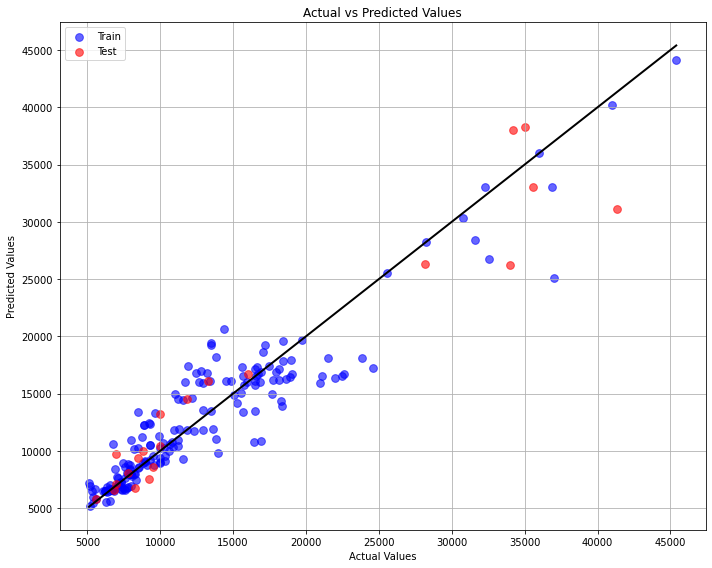

In [28]:
# Predictions on train and test sets
y_train_predicted = pipeline_best.predict(X_train)
y_test_predicted = pipeline_best.predict(X_test)

# Calculating metrics
r2_train_score = r2_score(y_train, y_train_predicted)
r2_test_score = r2_score(y_test, y_test_predicted)

mae_train_score = mean_absolute_error(y_train, y_train_predicted)
mae_test_score = mean_absolute_error(y_test, y_test_predicted)

mse_train_score = mean_squared_error(y_train, y_train_predicted)
mse_test_score = mean_squared_error(y_test, y_test_predicted)

rmse_train_score = np.sqrt(mse_train_score)
rmse_test_score = np.sqrt(mse_test_score)

# Display metrics
print("\n=== Metrics for Training Data ===")
print(f"R2 Score: {r2_train_score}")
print(f"Mean Absolute Error (MAE): {mae_train_score}")
print(f"Mean Squared Error (MSE): {mse_train_score}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_score}")

print("\n=== Metrics for Testing Data ===")
print(f"R2 Score: {r2_test_score}")
print(f"Mean Absolute Error (MAE): {mae_test_score}")
print(f"Mean Squared Error (MSE): {mse_test_score}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_score}\n")


# Set plot size
plt.figure(figsize=(10, 8))

# Scatter plot for training data
plt.scatter(y_train, y_train_predicted, alpha=0.6, color='blue', s=60, label='Train')

# Scatter plot for test data
plt.scatter(y_test, y_test_predicted, alpha=0.6, color='red', s=60, label='Test')

# Identity line
max_value = max(y.max(), y_train_predicted.max(), y_test.max(), y_test_predicted.max())
min_value = min(y.min(), y_train_predicted.min(), y_test.min(), y_test_predicted.min())
plt.plot([min_value, max_value], [min_value, max_value], color='black', linewidth=2)

# Customize plot
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()



## Extracting Selected Features from the Optimized Pipeline

After optimizing our model with hyperparameter tuning and feature selection, it's often insightful to identify which specific features were deemed the most influential.

Here's the process broken down:

1. **Extracting the SelectKBest Selector:** We first retrieve the `SelectKBest` selector from the optimized pipeline.

2. **Obtaining the Selection Mask:** Using this selector, we then derive a boolean mask (`selected_mask`). Within this mask, `True` values correspond to features that were selected.

3. **Determining the Transformed Feature Names:** Our dataset, post-transformation, consists of features derived from MCA (Multiple Correspondence Analysis) and the original numerical features. For the categorical features processed via MCA, their transformed names are patterned as `component_0`, `component_1`, and so on. This list is then concatenated with the original numerical feature names.

4. **Filtering for Selected Features:** Using our boolean mask in tandem with the complete list of transformed feature names, we then distill down to just the features that were selected.

The displayed `Selected Features` list provides a clear view into which components (from MCA) and numerical features our model deemed most important.


In [29]:
# 1. Extract the SelectKBest selector from your pipeline
selector = pipeline_best.named_steps['f_selector']

# 2. Obtain the boolean array that indicates which features were selected
selected_mask = selector.get_support()

# 3. Extract the names of the columns from the transformed dataset.
# After transformation, the order of the columns will be:
# [transformed_categorical_features, numerical_features]
# The transformation of categorical columns involves Multiple Correspondence Analysis (MCA) which is used to reduce their dimensionality. Therefore, the transformed categorical columns are represented as components, named as 'component_0', 'component_1', etc., up to the number of components specified in the MCA.
# Additionally, if one had opted for OneHotEncoding instead of MCA, the number of transformed categorical columns would be larger than the number of original categorical columns. However, with MCA, this number is controlled by the number of components chosen for the transformation.
# The list of transformed features, therefore, will comprise these MCA components followed by the original numerical features.

transformed_features = [f"component_{i}" for i in range(pipeline_best.named_steps['preprocessor'].named_transformers_['cat'].named_steps['mca'].n_components)] + numerical_features

# 4. Use the boolean array to index the original feature names
selected_features = [feature for feature, selected in zip(transformed_features, selected_mask) if selected]

# Printing selected features in a readable manner
print("Selected Features:")
for feature in selected_features:
    print(f"- {feature}")



Selected Features:
- component_46
- engine-size
- curb-weight
- highway-mpg


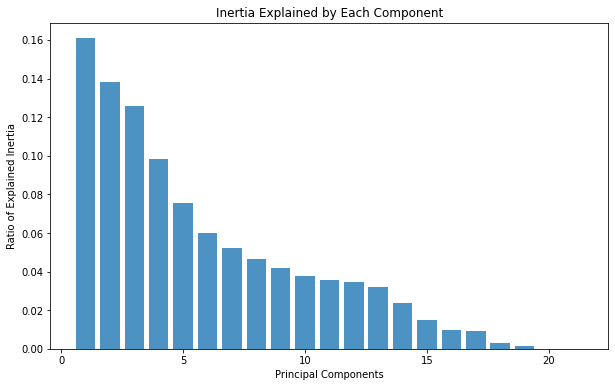

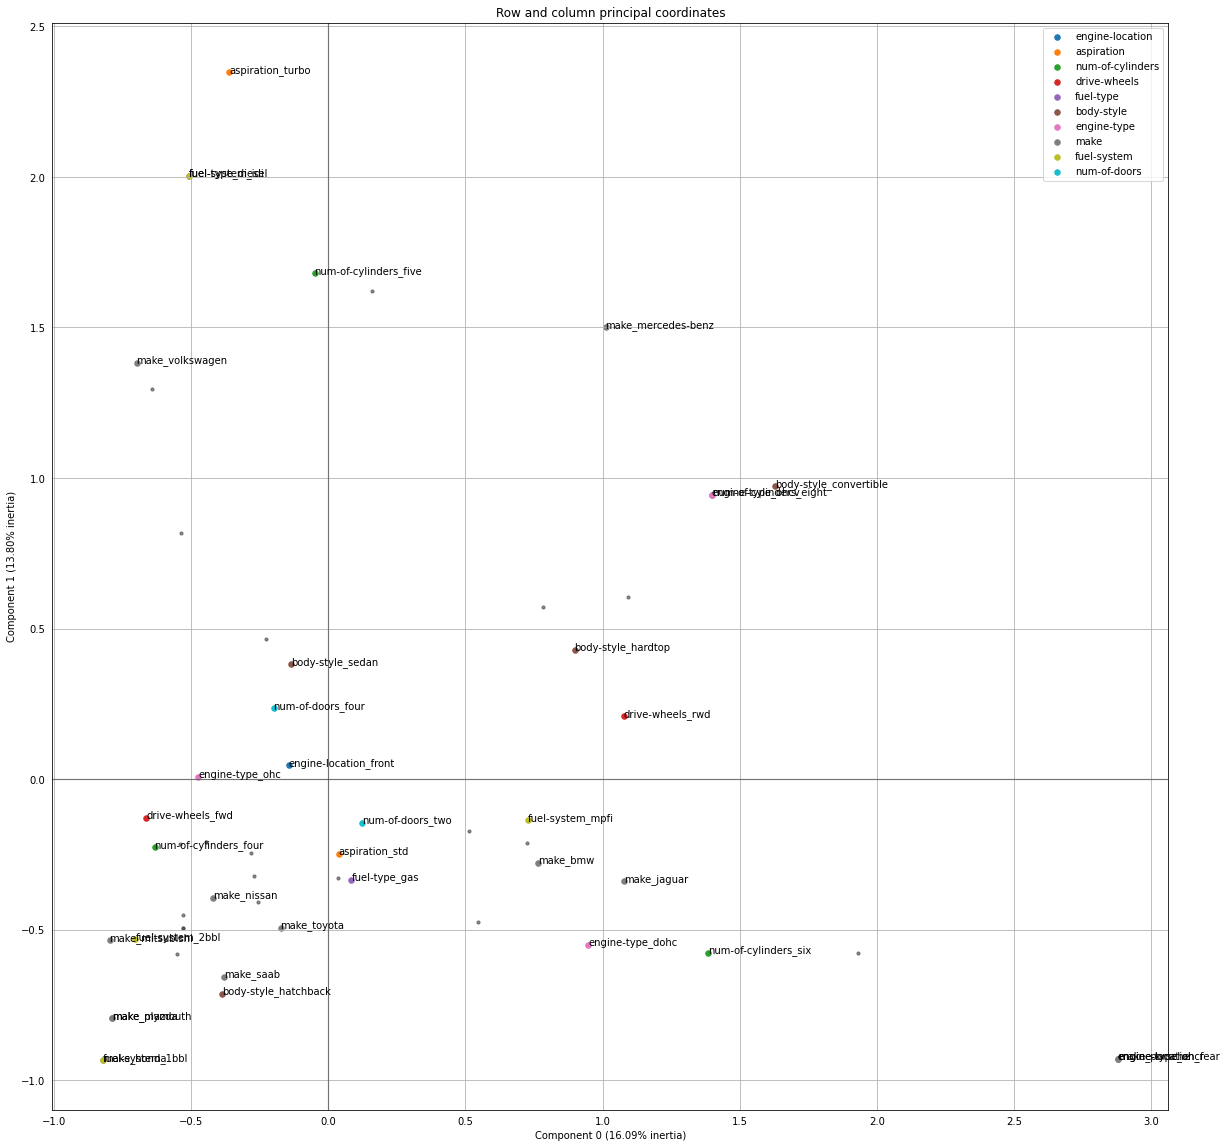

In [30]:
# Filter the dataframe by removing rows with missing 'price'
filtered_df = X_test.copy()
prices = y_test

# Select only categorical variables from the sorted columns
cat_data = filtered_df[sorted_cols]

# Initialize and fit the MCA model
mca = prince.MCA(n_components=80)
mca = mca.fit(cat_data)

# Get the row and column coordinates from the MCA model
row_coordinates = mca.row_coordinates(cat_data)
col_coordinates = mca.column_coordinates(cat_data)
row_coords = row_coordinates
col_coords = col_coordinates

# Obtain the explained inertia
explained_inertia = mca.explained_inertia_

# Number of components
n_components = len(explained_inertia)

# Visualization of explained inertia
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_inertia, alpha=0.8, align='center', label='Individual Explained Inertia')
plt.title('Inertia Explained by Each Component')
plt.xlabel('Principal Components')
plt.ylabel('Ratio of Explained Inertia')
plt.show()

# Plot the MCA coordinates
ax = mca.plot_coordinates(X=cat_data, ax=None, figsize=(20, 20), show_row_labels=False, show_column_labels=True)

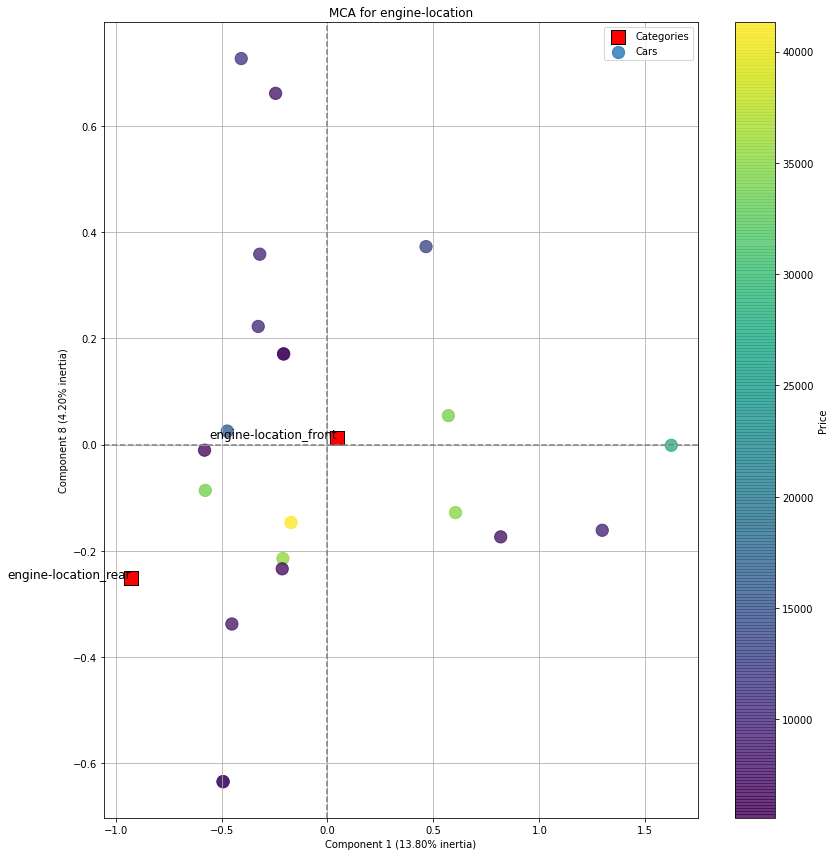

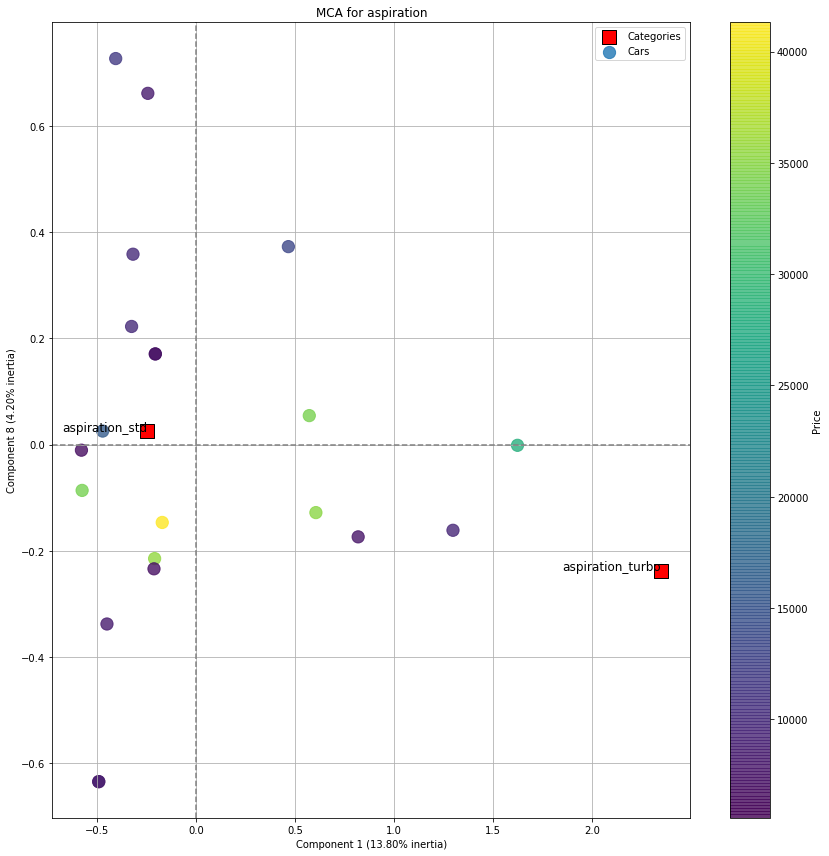

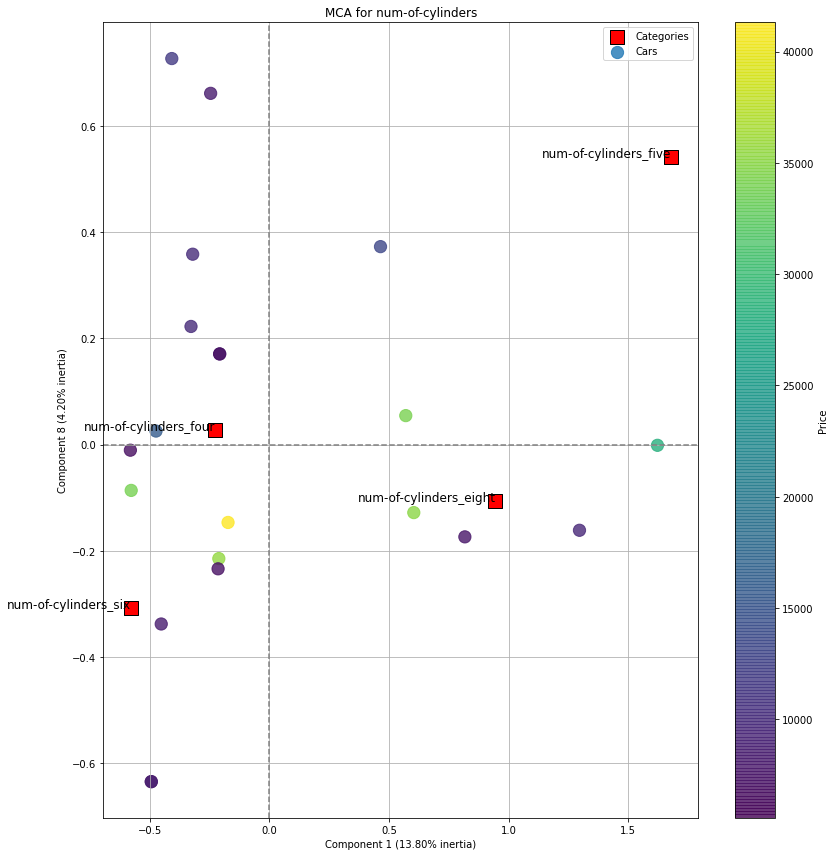

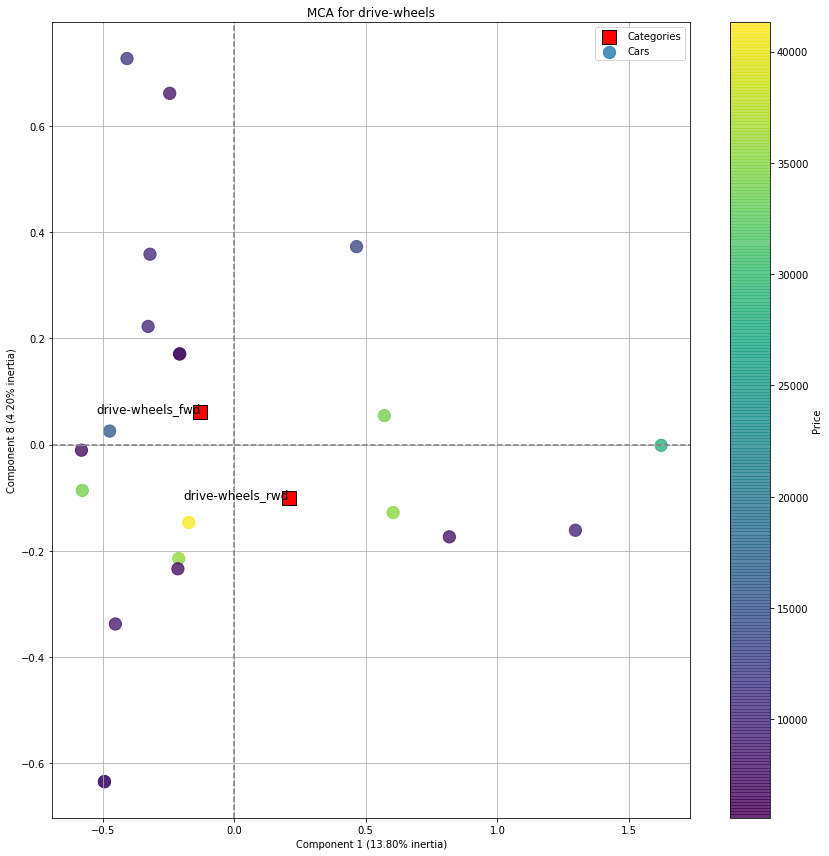

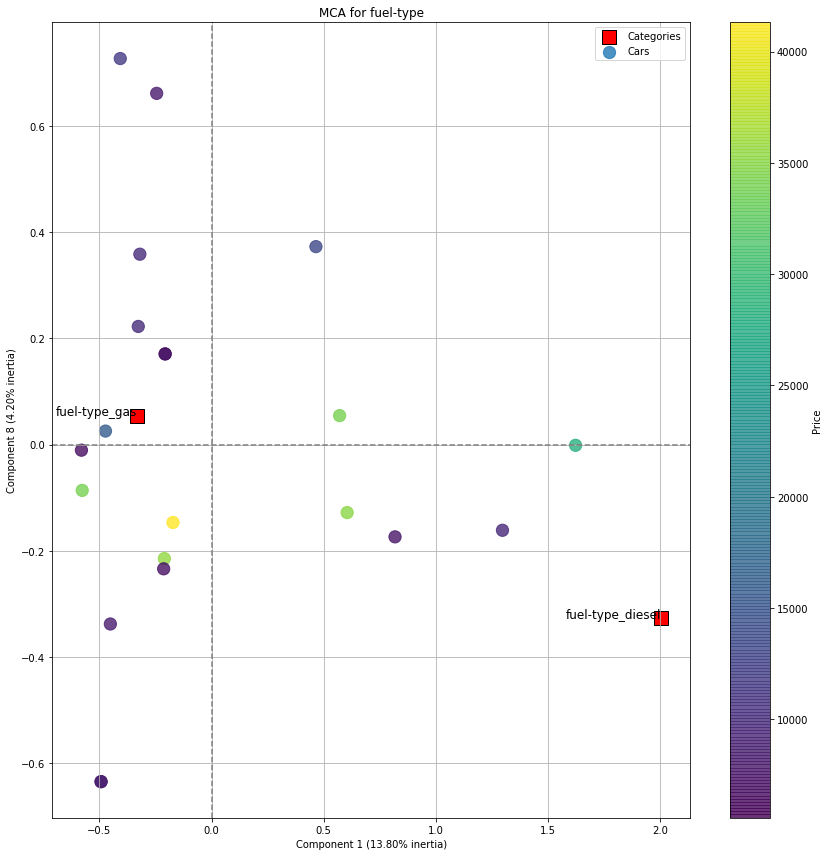

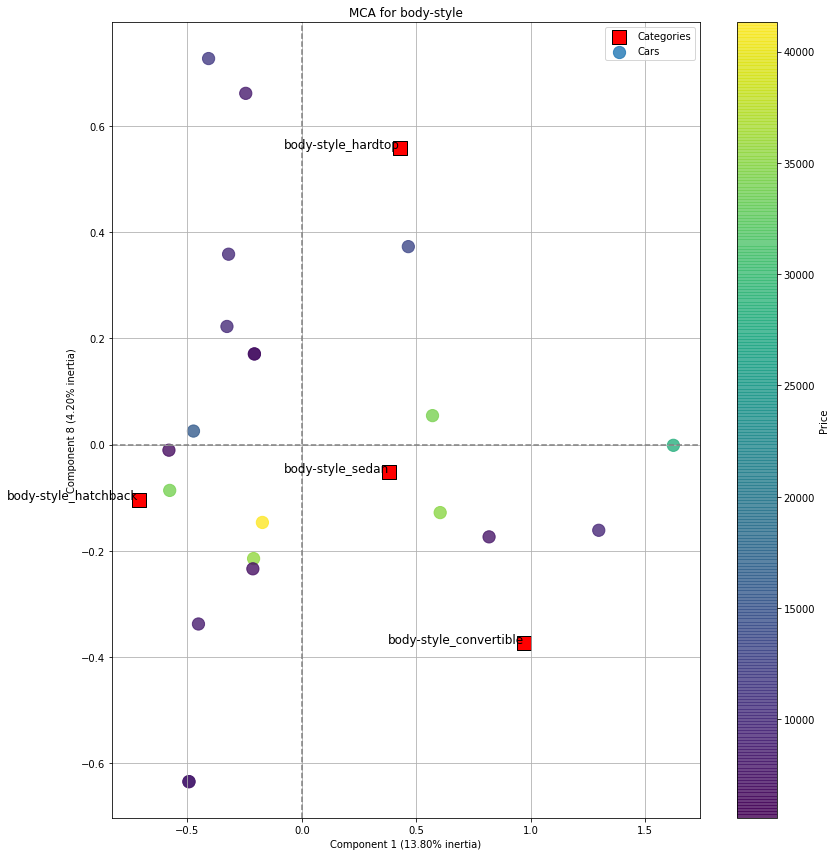

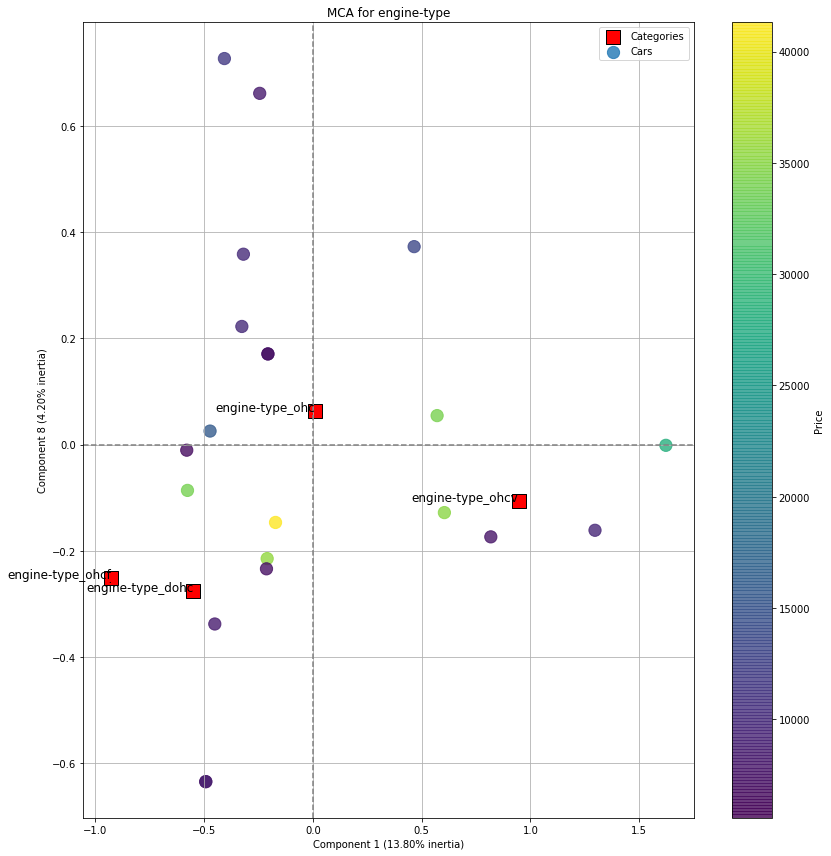

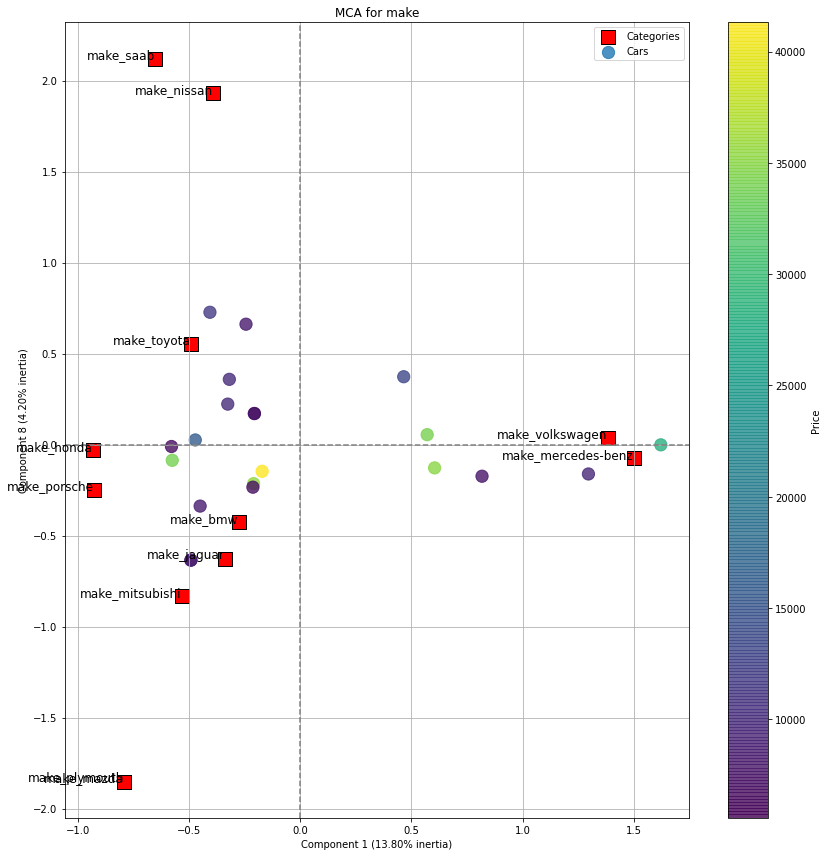

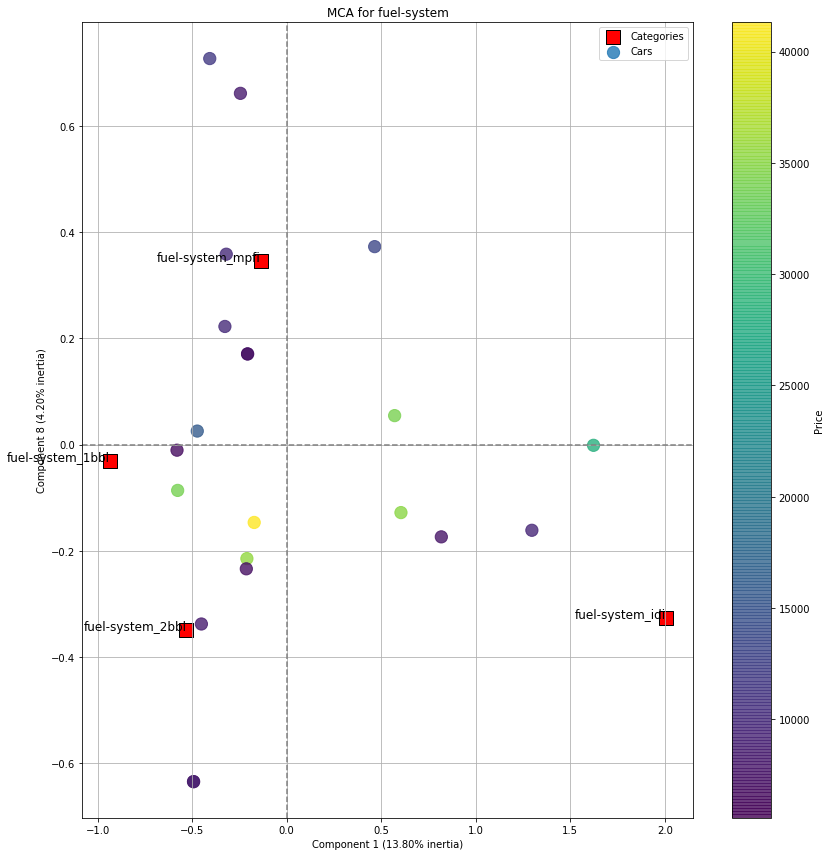

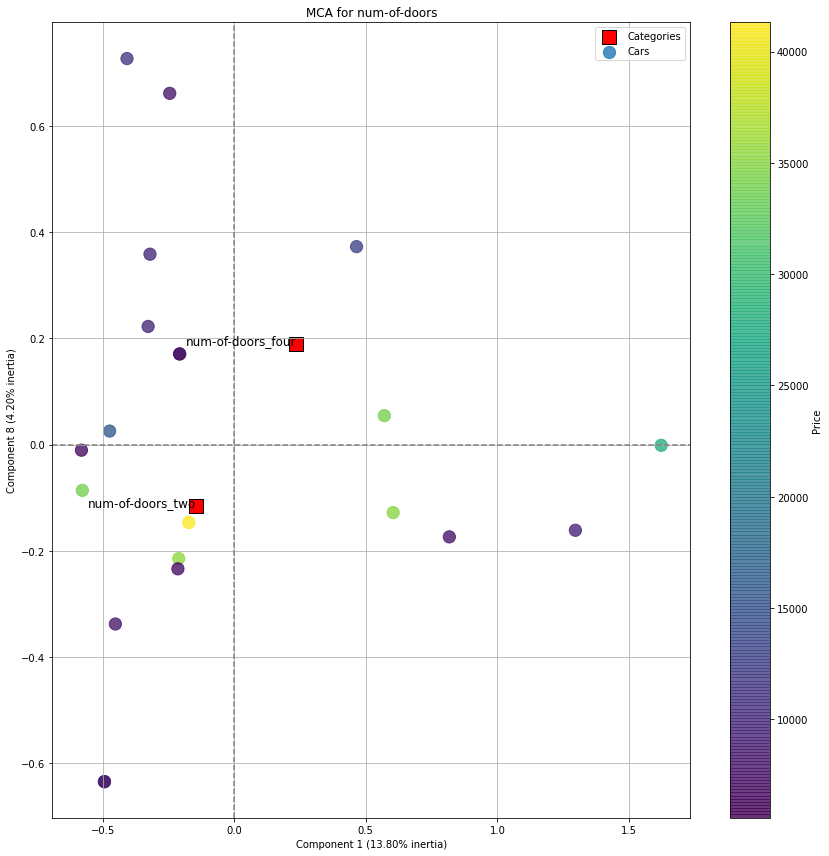

In [31]:
# For each categorical column in the data
total_inertia = sum(mca.eigenvalues_)
c_a = 1
c_b = 8
for col in cat_data.columns:
    # Extract coordinates related only to the categories of the current column
    current_col_coords = col_coords.filter(like=col, axis=0)
    
    # Initiate a new plot figure
    plt.figure(figsize=(12, 12))
    
    # Plot the categories with larger square markers
    plt.scatter(current_col_coords.iloc[:, c_a], current_col_coords.iloc[:, c_b], 
                s=200, c='red', edgecolors='black', marker='s', label='Categories')
    
    # Annotate the categories on the plot
    for index, row in current_col_coords.iterrows():
        plt.annotate(index, (row[c_a], row[c_b]), fontsize=12, ha='right')
    
    # Overlay the car data points, colored by their respective prices
    sc = plt.scatter(row_coords.iloc[:, c_a], row_coords.iloc[:, c_b], 
                     c=prices, cmap='viridis', alpha=0.8, s=150, label='Cars')
    
    # Display the colorbar indicating price ranges
    plt.colorbar(sc, label='Price')
    
    # Set plot titles and labels
    plt.title(f"MCA for {col}")
    plt.xlabel(f"Component 1 ({(mca.eigenvalues_[c_a] / total_inertia):.2%} inertia)")
    plt.ylabel(f"Component 8 ({(mca.eigenvalues_[c_b] / total_inertia):.2%} inertia)")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()